# Business Proposal

Business problem: What are the best 5 zip codes to invest in?

Business - A real estate investment firm looking to acquire new property to invest in.

Focus - Investing in real estate for high growth zip codes.

Narrowing down zip codes - Look to see where everyone is trying to move to. Find the 25 highest historic ROI zipcodes from the past 10 years. Run a model for all 25 and then pick the best 5 zipcodes with the highest ROI.

Chosen State: Idaho
 - Based off of Census and other surveys deciding to go with Idaho.

Ways to narrow down zipcodes
 - looking at the historic 5 year ROI
 - Narrowing down to the best 25 zip codes
 - Doing a time series on all 25

# Loading all necessary packages and loading data file

In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from urllib.request import urlopen
import json
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.utils import tsdisplay




%matplotlib inline

from matplotlib import rcParams
plt.style.use('seaborn')
rcParams['figure.figsize']=(12,8)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [334]:
data = pd.read_csv("Data/zillow_data.csv")

# EDA

In [335]:
data.head()

RegionID  RegionName      City State              Metro CountyName  SizeRank   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04   1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11   1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06   1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01   1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08   1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03   2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10   2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05   2001-06   2001-07   2001-08   2001-09   2001-10   2001-11   2001-12   2002-01   2002-02   2002-03   2002-04   2002-05   2002-06   2002-07   2002-08   2002-09   2002-10   2002-11   2002-12   2003-01   2003-02   2003-03   2003-04   2003-05   2003-06   2003-07    2003-08    2003-09    2003-10  \
0     84654       60657   Chicago    IL            Chicago       Cook         1  334200.0  335400.0  336500.0  337600.0  338500.0  339500.0  340400.0  341300.0  342600.0  344400.0  345700.0  346700.0  347800.0  349000.0  350400.0  352000.0  353900.0  356200.0  358800.0  361800.0  365700.0  370200.0  374700.0  378900.0  383500.0  388300.0  393300.0  398500.0  403800.0  409100.0  414600.0  420100.0  426200.0  432600.0  438600.0  444200.0  450000.0  455900.0  462100.0  468500.0  475300.0  482500.0  490200.0  498200.0  507200.0  516800.0  526300.0  535300.0  544500.0  553500.0  562400.0  571200.0  579800.0  588100.0  596300.0  604200.0  612200.0  620200.0  627700.0  634500.0  641000.0  647000.0  652700.0  658100.0  663300.0  668400.0  673400.0  678300.0  683200.0  688300.0  693300.0  698000.0  702400.0  706400.0  710200.0  714000.0  717800.0  721700.0  725700.0  729900.0  733400.0  735600.0  737200.0  739000.0  740900.0  742700.0  744400.0  746000.0   747200.0   748000.0   749000.0   
1     90668       75070  McKinney    TX  Dallas-Fort Worth     Collin         2  235700.0  236900.0  236700.0  235400.0  233300.0  230600.0  227300.0  223400.0  219600.0  215800.0  211100.0  205700.0  200900.0  196800.0  193600.0  191400.0  190400.0  190800.0  192700.0  196000.0  201300.0  207400.0  212200.0  214600.0  215100.0  213400.0  210200.0  206100.0  202100.0  198800.0  196100.0  194100.0  193400.0  193400.0  193100.0  192700.0  193000.0  193700.0  194800.0  196100.0  197800.0  199700.0  201900.0  204500.0  207800.0  211500.0  214900.0  217800.0  221100.0  224100.0  226700.0  228200.0  228500.0  227200.0  224900.0  221900.0  219100.0  216900.0  215400.0  214500.0  214600.0  215600.0  217000.0  218400.0  219600.0  220000.0  219100.0  216800.0  213100.0  208700.0  204000.0  199600.0  195700.0  192800.0  190800.0  189600.0  189200.0  189200.0  189600.0  190300.0  190800.0  191000.0  190700.0  190300.0  189800.0  189200.0  188600.0  188000.0   187500.0   187200.0   187000.0   
2     91982       77494      Katy    TX            Houston     Harris         3  210400.0  212200.0  212200.0  210700.0  208300.0  205500.0  202500.0  199800.0  198300.0  197300.0  195400.0  193000.0  191800.0  191800.0  193000.0  195200.0  198400.0  202800.0  208000.0  213800.0  220700.0  227500.0  231800.0  233400.0  233900.0  233500.0  233300.0  234300.0  237400.0  242800.0  250200.0  258600.0  268000.0  277000.0  283600.0  288500.0  293900.0  299200.0  304300.0  308600.0  311400.0  312300.0  311900.0  311100.0  311700.0  313500.0  315000.0  316700.0  319800.0  323700.0  327500.0  329900.0  329800.0  326400.0  320100.0  312200.0  304700.0  298700.0  294300.0  291400.0  290800.0  291600.0  293000.0  293600.0  292900.0  290500.0  286700.0  282200.0  276900.0  271000.0  264200.0  257000.0  249700.0  243100.0  237000.0  231700.0  227100.0  223300.0  220300.0  217300.0  214700.0  213800.0  215100.0  217300.0  219600.0  221400.0  222300.0  222700.0   223000.0   223700.0   225100.0   
3     84616       6

In [336]:
data.tail()

RegionID  RegionName                 City State            Metro CountyName  SizeRank   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04   1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11   1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06   1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01   1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08   1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03   2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10   2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05   2001-06   2001-07   2001-08   2001-09   2001-10   2001-11   2001-12   2002-01   2002-02   2002-03   2002-04   2002-05   2002-06   2002-07   2002-08   2002-09   2002-10   2002-11   2002-12   2003-01   2003-02   2003-03   2003-04   2003-05   2003-06   2003-07   2003-08   2003-09  \
14718     58333        1338             Ashfield    MA  Greenfield Town   Franklin     14719   94600.0   94300.0   94000.0   93700.0   93400.0   93200.0   93000.0   92900.0   92700.0   92600.0   92600.0   92600.0   92800.0   93100.0   93500.0   94000.0   94500.0   95100.0   95800.0   96500.0   97100.0   97800.0   98500.0   99200.0  100000.0  100800.0  101700.0  102600.0  103400.0  104200.0  104900.0  105600.0  106300.0  106800.0  107300.0  107800.0  108400.0  109000.0  109600.0  110200.0  110800.0  111400.0  112000.0  112600.0  113000.0  113500.0  113900.0  114300.0  114800.0  115400.0  116000.0  116700.0  117400.0  118100.0  118700.0  119500.0  120100.0  120600.0  121100.0  121700.0  122400.0  123300.0  124200.0  125300.0  126300.0  127400.0  128500.0  129600.0  130600.0  131400.0  132100.0  133000.0  133900.0  134900.0  136000.0  137200.0  138500.0  139700.0  140900.0  141900.0  143600.0  146300.0  149100.0  150900.0  151800.0  152000.0  151700.0  151700.0  152500.0  154200.0   
14719     59107        3293            Woodstock    NH        Claremont    Grafton     14720   92700.0   92500.0   92400.0   92200.0   92100.0   91900.0   91700.0   91300.0   90900.0   90500.0   90100.0   89800.0   89600.0   89400.0   89300.0   89200.0   89100.0   88900.0   88700.0   88400.0   88100.0   87700.0   87400.0   87200.0   87100.0   87100.0   87100.0   87200.0   87300.0   87300.0   87400.0   87300.0   87300.0   87200.0   87300.0   87400.0   87600.0   87900.0   88300.0   88700.0   89200.0   89600.0   90000.0   90300.0   90500.0   90700.0   91000.0   91300.0   91700.0   92300.0   93000.0   93700.0   94400.0   95000.0   95600.0   96100.0   96400.0   96800.0   97200.0   97800.0   98600.0   99600.0  100600.0  101700.0  102800.0  103800.0  104800.0  105600.0  106200.0  106900.0  107700.0  108600.0  109900.0  111400.0  112900.0  114600.0  116200.0  117700.0  118900.0  120300.0  121800.0  123200.0  124700.0  126600.0  128800.0  131000.0  132700.0  133900.0  134800.0  135600.0   
14720     75672       40404                Berea    KY         Richmond    Madison     14721   57100.0   57300.0   57500.0   57700.0   58000.0   58200.0   58400.0   58700.0   59100.0   59500.0   59900.0   60300.0   60800.0   61300.0   62000.0   62600.0   63200.0   63800.0   64500.0   65200.0   65900.0   66700.0   67400.0   68200.0   69000.0   69800.0   70700.0   71500.0   72300.0   73000.0   73700.0   74300.0   74900.0   75500.0   76000.0   76400.0   76900.0   77300.0   77700.0   78000.0   78200.0   78400.0   78400.0   78400.0   78500.0   78600.0   78600.0   78600.0   78700.0   78900.0   79200.0   79400.0   79600.0   79900.0   80100.0   80300.0   80600.0   80900.0   81100.0   81500.0   81800.0   82300.0   82700.0   83200.0   83600.0   84000.0   84100.0   84300.0   84500.0   84600.0   84600.0   84700.0   84800.0   85000.0   85200.0   85400.0   85500.0   85500.0   85600.0   85100.0   84200.0   83700.0   84000.0   84600.0   85500.0   86500.0   87700.0   89100.0   90600.0   92200.0   
14721     93733       8

In [337]:
data.shape

(14723, 272)

## General info about the dataset

In [338]:
print('The data has {} number of entries. The number of unique RegionNames is {}.'.format(data.shape[0],data['RegionName'].nunique()))
print('So there seems to be no duplicate entries.')

The data has 14723 number of entries. The number of unique RegionNames is 14723.
So there seems to be no duplicate entries.


In [339]:
print('This dataset looks at {} different "states" (includes DC).'.format(data['State'].nunique()))

This dataset looks at 51 different "states" (includes DC).


In [340]:
print('This dataset looks at median prices of houses of a given zipcode from 1996-04 to 2018-04.')

This dataset looks at median prices of houses of a given zipcode from 1996-04 to 2018-04.


## Looking at missing values in the dataframe

In [341]:
#Seeing how many na values are in the dataset
print('There are {} Nan values in the dataset.'.format(data.isna().sum().sum()))

There are 157934 Nan values in the dataset.


In [342]:
#Checking to see what columns have na values.
column_names = data.columns
na_columns = []
for name in column_names:
    NumberOfNa = 0
    NumberOfNa = data[name].isna().sum()
    if NumberOfNa > 0:
        na_columns.append(name)
print('There are {} columns that have na values.'.format(len(na_columns)))
print('Only identifier column with na is "Metro", the others are missing values for dates')

There are 220 columns that have na values.
Only identifier column with na is "Metro", the others are missing values for dates


In [343]:
#Looking at the entries with Nan values for Metro
len(data.loc[lambda x: x.Metro.isna()])
data.loc[lambda x: x.Metro.isna()].head()

RegionID  RegionName        City State Metro CountyName  SizeRank   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04   1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11   1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06   1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01   1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08   1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03   2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10   2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05   2001-06   2001-07   2001-08   2001-09   2001-10   2001-11   2001-12   2002-01   2002-02   2002-03   2002-04   2002-05   2002-06   2002-07   2002-08   2002-09   2002-10   2002-11   2002-12   2003-01   2003-02   2003-03   2003-04   2003-05   2003-06   2003-07   2003-08   2003-09   2003-10   2003-11  \
151     69340       27410  Greensboro    NC   NaN   Guilford       152  137100.0  136600.0  136000.0  135600.0  135300.0  135100.0  135200.0  135600.0  136100.0  136700.0  137500.0  138300.0  139000.0  139600.0  140000.0  140200.0  140400.0  140400.0  140400.0  140400.0  140400.0  140400.0  140600.0  141000.0  141600.0  142500.0  143700.0  145000.0  146400.0  147600.0  148800.0  149700.0  150500.0  150900.0  151300.0  151500.0  151600.0  151800.0  152100.0  152400.0  152900.0  153400.0  154000.0  154600.0  155300.0  156000.0  156700.0  157500.0  158400.0  159100.0  159900.0  160400.0  160900.0  161200.0  161400.0  161400.0  161300.0  161000.0  160800.0  160500.0  160300.0  160000.0  159800.0  159800.0  159900.0  160100.0  160400.0  160700.0  161200.0  161700.0  162200.0  162900.0  163700.0  164500.0  165200.0  165900.0  166400.0  166900.0  167400.0  167800.0  168300.0  168700.0  169000.0  169200.0  169500.0  169700.0  170000.0  170400.0  170700.0  171100.0  171400.0  171900.0   
167     69336       27406  Greensboro    NC   NaN   Guilford       168   80900.0   80700.0   80400.0   80200.0   80000.0   79800.0   79800.0   79900.0   80200.0   80500.0   81000.0   81600.0   82300.0   83000.0   83700.0   84300.0   84900.0   85300.0   85600.0   85700.0   85500.0   85200.0   84800.0   84200.0   83800.0   83700.0   83800.0   84100.0   84500.0   85000.0   85400.0   85900.0   86300.0   86700.0   87100.0   87400.0   87800.0   88100.0   88400.0   88800.0   89100.0   89500.0   90000.0   90500.0   91000.0   91500.0   92100.0   92600.0   93100.0   93400.0   93600.0   93700.0   93800.0   93800.0   93900.0   94000.0   94100.0   94300.0   94500.0   94600.0   94700.0   94700.0   94700.0   94700.0   94800.0   94900.0   95000.0   95200.0   95500.0   95700.0   96000.0   96200.0   96400.0   96500.0   96600.0   96600.0   96600.0   96700.0   96900.0   97100.0   97300.0   97600.0   97700.0   97800.0   97800.0   97800.0   97800.0   97800.0   97900.0   98000.0   98000.0   97900.0   
491     69270       27265  High Point    NC   NaN   Guilford       492  108000.0  107700.0  107400.0  107100.0  106900.0  106900.0  106900.0  107100.0  107400.0  107700.0  108100.0  108500.0  109000.0  109600.0  110300.0  111100.0  111800.0  112500.0  113000.0  113300.0  113500.0  113700.0  113900.0  114200.0  114800.0  115600.0  116400.0  117200.0  117900.0  118600.0  119300.0  119900.0  120500.0  121200.0  121800.0  122400.0  122900.0  123500.0  124000.0  124400.0  124900.0  125400.0  125900.0  126500.0  127100.0  127700.0  128200.0  128600.0  129000.0  129300.0  129600.0  129900.0  130200.0  130500.0  130700.0  130900.0  131100.0  131300.0  131500.0  131700.0  131900.0  132100.0  132300.0  132600.0  132700.0  133000.0  133200.0  133500.0  133700.0  133900.0  134100.0  134200.0  134300.0  134300.0  134200.0  134200.0  134200.0  134400.0  134600.0  134900.0  135300.0  135600.0  136000.0  136300.0  136600.0  136900.0  137200.0  137400.0  137600.0  137700.0  137900.0  137900.0   
526     69337       27407  Gr

In [344]:
# We can drop all the identifiers besides State, City and RegionName (Zipcode)
data_ZipcodeID = data.drop(['RegionID', 'Metro', 'CountyName', 'SizeRank'], axis=1)

In [345]:
# Creating a Dataframe with all entries that have any NA values
null_data = data_ZipcodeID[data_ZipcodeID.isnull().any(axis=1)]
print(len(null_data))
null_data.head()

1039


RegionName        City State  1996-04  1996-05  1996-06  1996-07  1996-08  1996-09  1996-10  1996-11  1996-12  1997-01  1997-02  1997-03  1997-04  1997-05  1997-06  1997-07  1997-08  1997-09  1997-10  1997-11  1997-12  1998-01  1998-02  1998-03  1998-04  1998-05  1998-06  1998-07  1998-08  1998-09  1998-10  1998-11  1998-12  1999-01  1999-02  1999-03  1999-04  1999-05  1999-06  1999-07  1999-08  1999-09  1999-10  1999-11  1999-12  2000-01  2000-02  2000-03  2000-04  2000-05  2000-06  2000-07  2000-08  2000-09  2000-10  2000-11  2000-12  2001-01  2001-02  2001-03  2001-04  2001-05  2001-06  2001-07  2001-08  2001-09  2001-10  2001-11  2001-12  2002-01  2002-02  2002-03  2002-04  2002-05  2002-06  2002-07  2002-08  2002-09  2002-10  2002-11  2002-12  2003-01  2003-02  2003-03  2003-04  2003-05  2003-06  2003-07  2003-08  2003-09  2003-10  2003-11  2003-12   2004-01   2004-02   2004-03   2004-04   2004-05   2004-06   2004-07   2004-08   2004-09   2004-10   2004-11   2004-12  \
20        10011    New York    NY      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
36        10456    New York    NY      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
105       60611     Chicago    IL      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
156       11238    New York  

A lot of the Nan values seem to be coming from possible newer properties that have been built.

In [346]:
print('The newest zipcode property, aka the last timestamp that has any nan value is {}.'.format(
    null_data.columns[null_data.isnull().any()][-1]))

The newest zipcode property, aka the last timestamp that has any nan value is 2014-06.


## Lets narrow the dataset to just Idaho before continuing on EDA

In [347]:
# Creating Idaho dataframe
Idaho = data_ZipcodeID[data_ZipcodeID['State'] == 'ID']
Idaho.head()

RegionName        City State   1996-04   1996-05   1996-06   1996-07   1996-08   1996-09   1996-10   1996-11   1996-12   1997-01   1997-02   1997-03   1997-04   1997-05   1997-06   1997-07   1997-08   1997-09   1997-10   1997-11   1997-12   1998-01   1998-02   1998-03   1998-04   1998-05   1998-06   1998-07   1998-08   1998-09   1998-10   1998-11   1998-12   1999-01   1999-02   1999-03   1999-04   1999-05   1999-06   1999-07   1999-08   1999-09   1999-10   1999-11   1999-12   2000-01   2000-02   2000-03   2000-04   2000-05   2000-06   2000-07   2000-08   2000-09   2000-10   2000-11   2000-12   2001-01   2001-02   2001-03   2001-04   2001-05   2001-06   2001-07   2001-08   2001-09   2001-10   2001-11   2001-12   2002-01   2002-02   2002-03   2002-04   2002-05   2002-06   2002-07   2002-08   2002-09   2002-10   2002-11   2002-12   2003-01   2003-02   2003-03   2003-04   2003-05   2003-06   2003-07   2003-08   2003-09   2003-10   2003-11   2003-12   2004-01   2004-02   2004-03  \
448        83301  Twin Falls    ID   94100.0   94100.0   94200.0   94200.0   94300.0   94400.0   94700.0   95200.0   96000.0   97000.0   98400.0   99900.0  101600.0  103200.0  104600.0  105700.0  106500.0  106900.0  106900.0  106500.0  105600.0  104600.0  103500.0  102600.0  101800.0  101400.0  101300.0  101300.0  101600.0  101900.0  102200.0  102500.0  102700.0  103000.0  103200.0  103200.0  103100.0  102900.0  102600.0  102400.0  102300.0  102400.0  102600.0  103000.0  103500.0  104000.0  104700.0  105400.0  106100.0  106900.0  107700.0  108500.0  109300.0  110200.0  111000.0  111700.0  112400.0  112900.0  113300.0  113400.0  113200.0  112600.0  111700.0  110700.0  109700.0  108800.0  108100.0  107800.0  107700.0  107700.0  107900.0  108200.0  108600.0  109000.0  109400.0  109900.0  110300.0  110500.0  110800.0  111000.0  111200.0  111400.0  111600.0  111900.0  112300.0  112700.0  113100.0  113400.0  113700.0  114000.0  114400.0  114700.0  115200.0  115800.0  116600.0  117400.0   
596        83709       Boise    ID  118900.0  118800.0  118700.0  118500.0  118400.0  118300.0  118400.0  118700.0  119200.0  120100.0  121400.0  123100.0  125000.0  127200.0  129300.0  131200.0  132800.0  134200.0  135200.0  135900.0  136400.0  136600.0  136700.0  136600.0  136300.0  136000.0  135600.0  135200.0  135000.0  134800.0  134800.0  135000.0  135300.0  135600.0  135900.0  136100.0  136200.0  136300.0  136200.0  136200.0  136100.0  136000.0  136000.0  136000.0  136100.0  136300.0  136500.0  136600.0  136800.0  136900.0  137000.0  137200.0  137400.0  137500.0  137700.0  138100.0  138500.0  139000.0  139600.0  140100.0  140600.0  141100.0  141600.0  142000.0  142400.0  142800.0  143200.0  143600.0  144100.0  144700.0  145200.0  145700.0  146100.0  146400.0  146600.0  146600.0  146600.0  146500.0  146300.0  146200.0  146100.0  146000.0  146100.0  146200.0  146300.0  146600.0  147000.0  147400.0  147800.0  148100.0  148400.0  148600.0  149000.0  149600.0  150300.0  150900.0   
1178       83686       Nampa    ID   99500.0   99400.0   99400.0   99400.0   99500.0   99600.0   99900.0  100400.0  101100.0  102200.0  103700.0  105600.0  107700.0  110000.0  112200.0  114300.0  116000.0  117400.0  118500.0  119300.0  119800.0  120000.0  120100.0  120000.0  119900.0  119700.0  119700.0  119700.0  119800.0  120000.0  120200.0  120400.0  120600.0  120600.0  120700.0  120700.0  120700.0  120800.0  120800.0  120900.0  121000.0  121200.0  121400.0  121700.0  122000.0  122300.0  122700.0  123200.0  123600.0  124100.0  124700.0  125200.0  125600.0  126000.0  126300.0  126500.0  126600.0  126500.0  126300.0  125800.0  125100.0  124100.0  122900.0  121600.0  120200.0  119100.0  118200.0  117500.0  117200.0  117000.0  117000.0  117200.0  117500.0  117900.0  118300.0  118800.0  119200.0  119600.0  120000.0  120400.0  120900.0  121400.0  121900.0  122400.0  123000.0  123600.0  124100.0  124500.0  124900.0  125100.0  125400.0  125700.0  126200.0  126700.0  127200.0  127600.0   
1343       837

In [348]:
# Creating a Dataframe with all entries that have any NA values for Idaho
Idaho_null = Idaho[Idaho.isnull().any(axis=1)]
print('There are {} zip codes on record for Idaho.'.format(len(Idaho)))
print('There are {} zip codes that have missing entries'.format(len(Idaho_null)))
Idaho_null.head()

There are 110 zip codes on record for Idaho.
There are 15 zip codes that have missing entries


RegionName          City State  1996-04  1996-05  1996-06  1996-07  1996-08  1996-09  1996-10  1996-11  1996-12  1997-01  1997-02  1997-03  1997-04  1997-05  1997-06  1997-07  1997-08  1997-09  1997-10  1997-11  1997-12  1998-01  1998-02  1998-03  1998-04  1998-05  1998-06  1998-07  1998-08  1998-09  1998-10  1998-11  1998-12  1999-01  1999-02  1999-03  1999-04  1999-05  1999-06  1999-07  1999-08  1999-09  1999-10  1999-11  1999-12  2000-01  2000-02  2000-03  2000-04  2000-05  2000-06  2000-07  2000-08  2000-09  2000-10  2000-11  2000-12  2001-01  2001-02  2001-03  2001-04  2001-05  2001-06  2001-07  2001-08  2001-09  2001-10  2001-11  2001-12  2002-01  2002-02  2002-03  2002-04  2002-05  2002-06  2002-07  2002-08  2002-09  2002-10  2002-11  2002-12  2003-01  2003-02  2003-03  2003-04  2003-05  2003-06   2003-07   2003-08   2003-09   2003-10   2003-11   2003-12   2004-01   2004-02   2004-03   2004-04   2004-05   2004-06   2004-07   2004-08   2004-09   2004-10   2004-11  \
7742        83333        Hailey    ID      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
8131        83340       Ketchum    ID      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9232        83263       Preston    ID      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  172100.0  170400.0  168600.0  167300.0  166000.0  164400.0  163100.0  162900.0  163700.0  165200.0  167400.0  169800.0  172300.0  174500.0  176500.0  178800.0  181000.0   
11485       83353    Sun Valley

In [349]:
print('The newest Idaho zipcode property, aka the last timestamp that has any nan value is {}.'.format(
    Idaho_null.columns[Idaho_null.isnull().any()][-1]))

The newest Idaho zipcode property, aka the last timestamp that has any nan value is 2011-12.


In [350]:
#Dropping any zipcodes that do not have 10 years worth of data
Idaho = Idaho.drop(Idaho[Idaho['2008-04'].isnull()].index)

#Dropping columns for any previous data older than 10 years.
Idaho.dropna(axis=1, how='any', inplace=True)

print('2 of the Idaho zipcodes did not meet the 10 years worth of data requirement.')
print('The new number of zipcodes of the dataframe is {}.'.format(len(Idaho)))
print('The Idaho dataset now has no nan values and spans from {} to {}'.format(Idaho.columns[3],Idaho.columns[-1]))

2 of the Idaho zipcodes did not meet the 10 years worth of data requirement.
The new number of zipcodes of the dataframe is 108.
The Idaho dataset now has no nan values and spans from 2006-01 to 2018-04


In [351]:
Idaho.head()

RegionName        City State   2006-01   2006-02   2006-03   2006-04   2006-05   2006-06   2006-07   2006-08   2006-09   2006-10   2006-11   2006-12   2007-01   2007-02   2007-03   2007-04   2007-05   2007-06   2007-07   2007-08   2007-09   2007-10   2007-11   2007-12   2008-01   2008-02   2008-03   2008-04   2008-05   2008-06   2008-07   2008-08   2008-09   2008-10   2008-11   2008-12   2009-01   2009-02   2009-03   2009-04   2009-05   2009-06   2009-07   2009-08   2009-09   2009-10   2009-11   2009-12   2010-01   2010-02   2010-03   2010-04   2010-05   2010-06   2010-07   2010-08   2010-09   2010-10   2010-11   2010-12   2011-01   2011-02   2011-03   2011-04   2011-05   2011-06   2011-07   2011-08   2011-09   2011-10   2011-11   2011-12   2012-01   2012-02   2012-03   2012-04   2012-05   2012-06   2012-07   2012-08   2012-09   2012-10   2012-11   2012-12   2013-01   2013-02   2013-03   2013-04   2013-05   2013-06   2013-07   2013-08   2013-09   2013-10   2013-11   2013-12  \
448        83301  Twin Falls    ID  132400.0  133100.0  134100.0  135300.0  136500.0  137800.0  139200.0  140600.0  142100.0  143700.0  145300.0  146700.0  147900.0  148700.0  149400.0  150000.0  150300.0  150400.0  150500.0  150500.0  150400.0  150300.0  150400.0  150400.0  150200.0  149800.0  149400.0  148900.0  148000.0  146800.0  145700.0  144700.0  143800.0  143000.0  142300.0  141700.0  141200.0  140600.0  140300.0  140000.0  139400.0  138300.0  137200.0  135800.0  134500.0  133500.0  132600.0  132100.0  131900.0  132100.0  131500.0  130000.0  128900.0  128600.0  128000.0  126800.0  125400.0  124100.0  122700.0  121000.0  119400.0  118000.0  116800.0  116100.0  116100.0  116400.0  116600.0  116700.0  116900.0  117000.0  116800.0  116900.0  117200.0  117300.0  117300.0  117600.0  118200.0  118900.0  119100.0  119300.0  119700.0  120200.0  120700.0  121300.0  122200.0  123200.0  124200.0  125100.0  126100.0  126700.0  128600.0  132900.0  137400.0  140400.0  142500.0  143700.0   
596        83709       Boise    ID  199200.0  203300.0  207200.0  211500.0  215900.0  220000.0  223300.0  225300.0  225800.0  225000.0  223700.0  222500.0  221700.0  220600.0  219500.0  218800.0  218400.0  217900.0  217600.0  217500.0  217400.0  217400.0  217300.0  217300.0  217600.0  217600.0  217100.0  216500.0  215600.0  213800.0  211500.0  208800.0  206200.0  203700.0  201300.0  199100.0  197400.0  195500.0  193300.0  191000.0  188700.0  186100.0  183900.0  182200.0  180700.0  179300.0  178100.0  176800.0  173900.0  173200.0  173800.0  172700.0  170600.0  170200.0  169200.0  167700.0  165900.0  164300.0  163200.0  162300.0  161700.0  159800.0  157300.0  155400.0  153500.0  151300.0  150100.0  149300.0  148600.0  148500.0  148200.0  147000.0  146100.0  146400.0  147000.0  147800.0  148900.0  149700.0  150100.0  150600.0  151600.0  152900.0  154300.0  156100.0  158200.0  159400.0  160200.0  161900.0  164700.0  168200.0  171800.0  174700.0  176900.0  178400.0  180400.0  183100.0   
1178       83686       Nampa    ID  147100.0  148000.0  149400.0  151500.0  153800.0  156300.0  158900.0  161400.0  164100.0  166500.0  168800.0  170900.0  172600.0  173800.0  174900.0  176200.0  177600.0  178500.0  178900.0  179200.0  179800.0  180600.0  181400.0  182300.0  183000.0  182900.0  182400.0  181800.0  181000.0  179500.0  177200.0  174500.0  172300.0  170200.0  168200.0  166300.0  164500.0  162300.0  160000.0  157900.0  155600.0  153200.0  151300.0  150100.0  149900.0  149700.0  149200.0  148800.0  148900.0  149200.0  147100.0  142100.0  137200.0  134300.0  132100.0  130000.0  127600.0  125800.0  123300.0  119500.0  116800.0  116100.0  116300.0  116900.0  117300.0  118100.0  119600.0  119600.0  117300.0  114500.0  113400.0  114000.0  113700.0  112100.0  111500.0  112500.0  114000.0  114900.0  115600.0  117300.0  119400.0  121100.0  122300.0  123300.0  124500.0  126400.0  128600.0  130600.0  132600.0  134000.0  134900.0  135500.0  136800.0  138500.0  139900.0  140800.0   
1343       837

## Looking at last 12 months price distribution for Idaho

In [352]:
# Creating new column of the last 12 month averate
Idaho['Last12MonthAvg'] = Idaho.iloc[:,-12:].mean(axis=1)

In [353]:
Idaho['Last12MonthAvg'].describe()

count    1.080000e+02
mean     2.301512e+05
std      1.418955e+05
min      8.119167e+04
25%      1.595229e+05
50%      2.010542e+05
75%      2.482292e+05
max      1.234542e+06
Name: Last12MonthAvg, dtype: float64

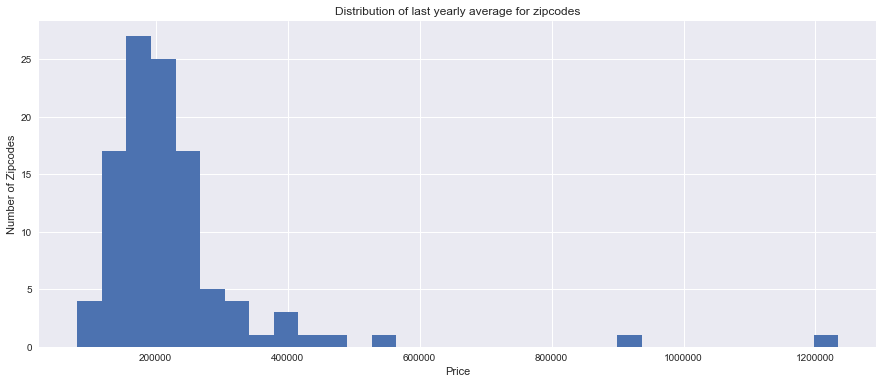

In [354]:
plt.figure(figsize=(15,6))
plt.hist(Idaho['Last12MonthAvg'], bins='auto');
plt.ylabel('Number of Zipcodes');
plt.xlabel('Price');
plt.title('Distribution of last yearly average for zipcodes');

## Calculate ROI (1yr, 5yr, 10yr) and CV

In [355]:
#Calculate ROI for 1 year, 5 year, 10 year
Idaho['1yr_ROI'] = (Idaho['2018-04'] / Idaho['2017-04']) - 1
Idaho['5yr_ROI'] = (Idaho['2018-04'] / Idaho['2013-04']) - 1
Idaho['10yr_ROI'] = (Idaho['2018-04'] / Idaho['2008-04']) - 1

In [356]:
#Calculate CV
Idaho['std'] = Idaho.loc[:,'2006-01':'2018-04'].std(axis=1)
Idaho['mean'] = Idaho.loc[:,'2006-01':'2018-04'].mean(axis=1)
Idaho['CV'] = Idaho['std'] / Idaho['mean']

In [357]:
Idaho

RegionName            City State    2006-01    2006-02    2006-03    2006-04    2006-05    2006-06    2006-07    2006-08    2006-09    2006-10    2006-11    2006-12    2007-01    2007-02    2007-03    2007-04    2007-05    2007-06    2007-07    2007-08    2007-09    2007-10    2007-11    2007-12    2008-01    2008-02    2008-03    2008-04    2008-05    2008-06    2008-07    2008-08    2008-09    2008-10    2008-11    2008-12    2009-01    2009-02    2009-03    2009-04    2009-05    2009-06    2009-07   2009-08   2009-09   2009-10   2009-11   2009-12   2010-01   2010-02   2010-03   2010-04   2010-05   2010-06   2010-07   2010-08   2010-09   2010-10   2010-11   2010-12   2011-01   2011-02   2011-03   2011-04   2011-05   2011-06   2011-07   2011-08   2011-09   2011-10   2011-11   2011-12   2012-01   2012-02   2012-03   2012-04   2012-05   2012-06   2012-07   2012-08   2012-09   2012-10   2012-11   2012-12   2013-01   2013-02   2013-03   2013-04   2013-05   2013-06   2013-07  \
448         83301      Twin Falls    ID   132400.0   133100.0   134100.0   135300.0   136500.0   137800.0   139200.0   140600.0   142100.0   143700.0   145300.0   146700.0   147900.0   148700.0   149400.0   150000.0   150300.0   150400.0   150500.0   150500.0   150400.0   150300.0   150400.0   150400.0   150200.0   149800.0   149400.0   148900.0   148000.0   146800.0   145700.0   144700.0   143800.0   143000.0   142300.0   141700.0   141200.0   140600.0   140300.0   140000.0   139400.0   138300.0   137200.0  135800.0  134500.0  133500.0  132600.0  132100.0  131900.0  132100.0  131500.0  130000.0  128900.0  128600.0  128000.0  126800.0  125400.0  124100.0  122700.0  121000.0  119400.0  118000.0  116800.0  116100.0  116100.0  116400.0  116600.0  116700.0  116900.0  117000.0  116800.0  116900.0  117200.0  117300.0  117300.0  117600.0  118200.0  118900.0  119100.0  119300.0  119700.0  120200.0  120700.0  121300.0  122200.0  123200.0  124200.0  125100.0  126100.0  126700.0  128600.0   
596         83709           Boise    ID   199200.0   203300.0   207200.0   211500.0   215900.0   220000.0   223300.0   225300.0   225800.0   225000.0   223700.0   222500.0   221700.0   220600.0   219500.0   218800.0   218400.0   217900.0   217600.0   217500.0   217400.0   217400.0   217300.0   217300.0   217600.0   217600.0   217100.0   216500.0   215600.0   213800.0   211500.0   208800.0   206200.0   203700.0   201300.0   199100.0   197400.0   195500.0   193300.0   191000.0   188700.0   186100.0   183900.0  182200.0  180700.0  179300.0  178100.0  176800.0  173900.0  173200.0  173800.0  172700.0  170600.0  170200.0  169200.0  167700.0  165900.0  164300.0  163200.0  162300.0  161700.0  159800.0  157300.0  155400.0  153500.0  151300.0  150100.0  149300.0  148600.0  148500.0  148200.0  147000.0  146100.0  146400.0  147000.0  147800.0  148900.0  149700.0  150100.0  150600.0  151600.0  152900.0  154300.0  156100.0  158200.0  159400.0  160200.0  161900.0  164700.0  168200.0  171800.0   
1178        83686           Nampa    ID   147100.0   148000.0   149400.0   151500.0   153800.0   156300.0   158900.0   161400.0   164100.0   166500.0   168800.0   170900.0   172600.0   173800.0   174900.0   176200.0   177600.0   178500.0   178900.0   179200.0   179800.0   180600.0   181400.0   182300.0   183000.0   182900.0   182400.0   181800.0   181000.0   179500.0   177200.0   174500.0   172300.0   170200.0   168200.0   166300.0   164500.0   162300.0   160000.0   157900.0   155600.0   153200.0   151300.0  150100.0  149900.0  149700.0  149200.0  148800.0  148900.0  149200.0  147100.0  142100.0  137200.0  134300.0  132100.0  130000.0  127600.0  125800.0  123300.0  119500.0  116800.0  116100.0  116300.0  116900.0  117300.0  118100.0  119600.0  119600.0  117300.0  114500.0  113400.0  114000.0  113700.0  112100.0  111500.0  112500.0  114000.0  114900.0  115600.0  117300.0  119400.0  121100.0  122300.0  123300.0  124500.0  126400.0  128600.0  130600.0  132600.0  134000.0  134900.0   
1343        83704      

In [358]:
print('Choosing to use 5yr ROI for historic ROI metric.')
print('The least you should hold a Property or REIT is 5 years to see gains on income/appreciation.')
print('Was thinking of using ')

Choosing to use 5yr ROI for historic ROI metric.
The least you should hold a Property or REIT is 5 years to see gains on income/appreciation.
Was thinking of using 


## Narrowing zipcodes down to historic best 25 candidates

Text(0.5, 0, 'ROI')

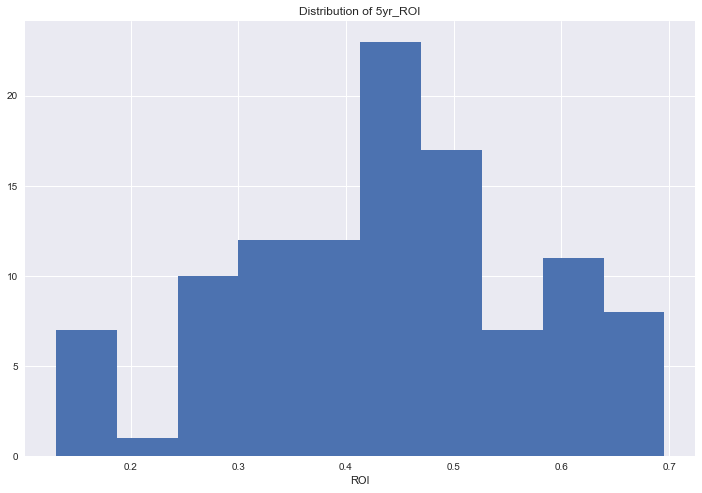

In [359]:
#Looking at distribution of 5yr_ROI
Idaho['5yr_ROI'].hist()
plt.title('Distribution of 5yr_ROI');
plt.xlabel('ROI')

In [360]:
#Taking the top 25 zipcodes that have the best 5yr_ROI
Idaho_25 = Idaho.sort_values(by=['5yr_ROI'], ascending=False)[0:25]

Text(0.5, 0, 'Price')

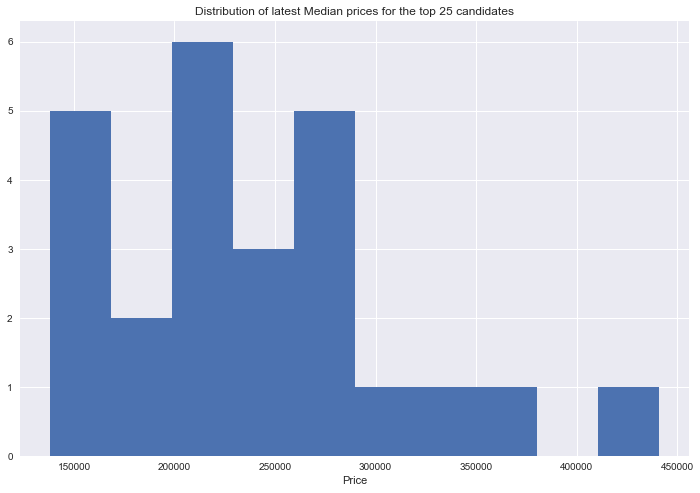

In [361]:
#Looking at the median price distribution of the top 25
Idaho_25['2018-04'].hist()
plt.title('Distribution of latest Median prices for the top 25 candidates');
plt.xlabel('Price')

## Turning the top 25 zip codes into long format

In [362]:
#This will take in the data(series) and turn it into a df(long format)
def LongFormat(data):
    
    #Turns series into df
    df = pd.DataFrame(data)
    
    #Drops the unwanted identity entries and calculations
    df = df.drop(labels=['RegionName','City','State','Last12MonthAvg',
                                 '1yr_ROI', '5yr_ROI', '10yr_ROI', 'std', 'mean', 'CV'],axis=0)
    
    #Turns the index into date time
    df.index = pd.to_datetime(df.index)
    df = df.asfreq('MS')
    
    #Labels the prices as value
    df.columns = ['value']
    
    return df

In [363]:
#This pulls each zipcode entry from the dataframe and appends the data to a list
Idaho_25_list = []
for i in range(len(Idaho_25)):
    Idaho_25_list.append(Idaho_25.iloc[i][:])

#Creating a dictionary with the zipcode as the key and the long format dataframe as the value
Idaho_25_dict = {}
for x in Idaho_25_list:
    Idaho_25_dict[str(x[0])] = LongFormat(x)

In [364]:
Idaho_25_dict.keys()

dict_keys(['83703', '83814', '83676', '83605', '83702', '83705', '83651', '83350', '83801', '83845', '83347', '83607', '83336', '83706', '83655', '83835', '83687', '83714', '83709', '83704', '83815', '83686', '83660', '83276', '83858'])

In [365]:
Idaho_25_dict['83703'].head()

value
2006-01-01  182900
2006-02-01  186600
2006-03-01  190000
2006-04-01  193800
2006-05-01  197900

## Looking at the price plots (try zooming in and out)

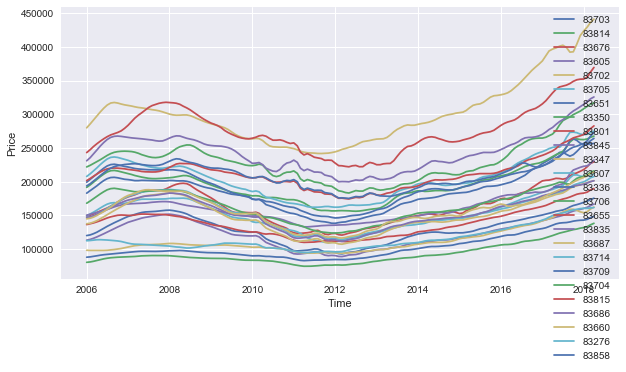

In [366]:
fig, ax = plt.subplots(figsize=(10,5))

for k,v in Idaho_25_dict.items():
        ax.plot(v, label=k)
        ax.set_ylabel('Price')
        ax.set_xlabel('Time')
        ax.legend()
        

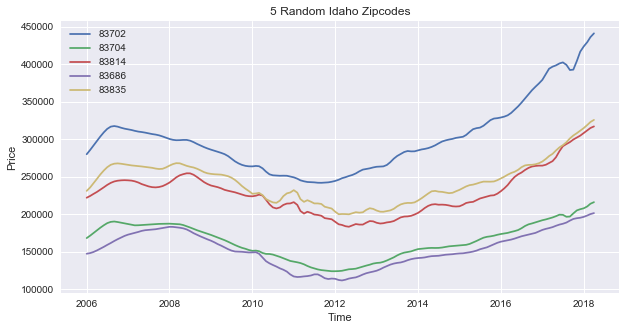

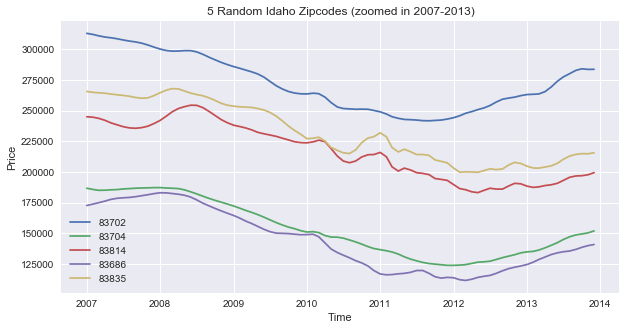

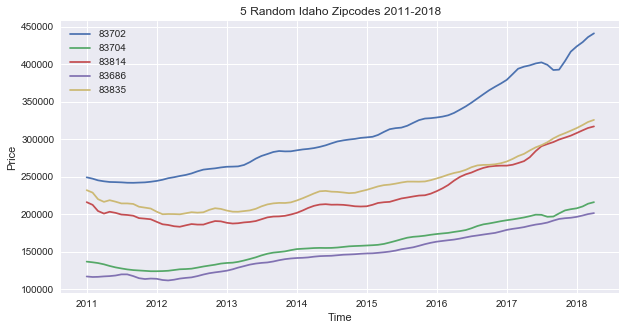

In [367]:
zipcodes = list(Idaho_25_dict.keys())
random_zips = np.random.randint(25,size=5)

fig, ax = plt.subplots(figsize=(10,5))

for r in random_zips:
    ax.plot(Idaho_25_dict[zipcodes[r]],label=zipcodes[r])
    ax.set_ylabel('Price')
    ax.set_xlabel('Time')
    ax.legend(loc='best')
    ax.set_title('5 Random Idaho Zipcodes')


fig2, ax2 = plt.subplots(figsize=(10,5))
for r in random_zips:
    ax2.plot(Idaho_25_dict[zipcodes[r]]['2007':'2013'],label=zipcodes[r])
    ax2.set_ylabel('Price')
    ax2.set_xlabel('Time')
    ax2.legend(loc='best')
    ax2.set_title('5 Random Idaho Zipcodes (zoomed in 2007-2013)')

fig3, ax3 = plt.subplots(figsize=(10,5))
for r in random_zips:
    ax3.plot(Idaho_25_dict[zipcodes[r]]['2011':],label=zipcodes[r])
    ax3.set_ylabel('Price')
    ax3.set_xlabel('Time')
    ax3.legend(loc='best')
    ax3.set_title('5 Random Idaho Zipcodes 2011-2018')

In [368]:
print('Here we can see that in 2008 there was a crash for the whole market.')
print('We can also see that the housing prices seem to have started recovers in 2012.')
print('Looking at the trends I think it would be best to start analyzing the data from 2011.')
print('This way it will take out the anomaly of the crash.')
print('We dont want to overestimate the prices either so I believe that having the one year of recovery will help the model.')

Here we can see that in 2008 there was a crash for the whole market.
We can also see that the housing prices seem to have started recovers in 2012.
Looking at the trends I think it would be best to start analyzing the data from 2011.
This way it will take out the anomaly of the crash.
We dont want to overestimate the prices either so I believe that having the one year of recovery will help the model.


## Shortening the timeseries to 2011-2018

In [369]:
Idaho_25_short_dict={}

for k,v in Idaho_25_dict.items():
    Idaho_25_short_dict[k] = v['2011':]

In [370]:
Idaho_25_short_dict['83703'].head()

value
2011-01-01  152600
2011-02-01  151200
2011-03-01  149300
2011-04-01  148000
2011-05-01  146300

## Seasonal Decompose

In [371]:
## Checking to see if there is any sort of seasonality to the zipcodes

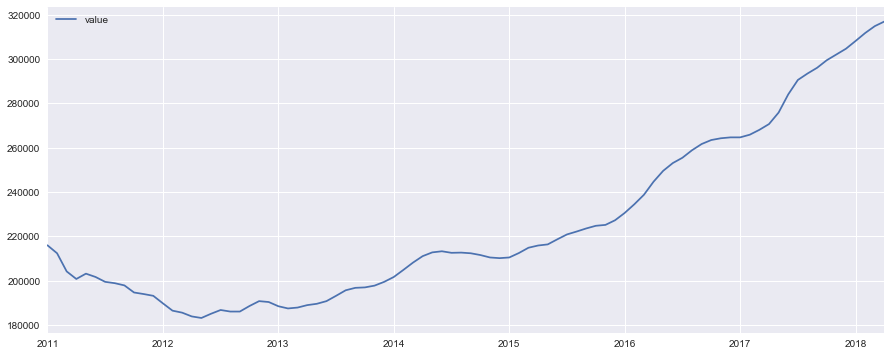

In [409]:
Idaho_25_short_dict['83814'].plot()

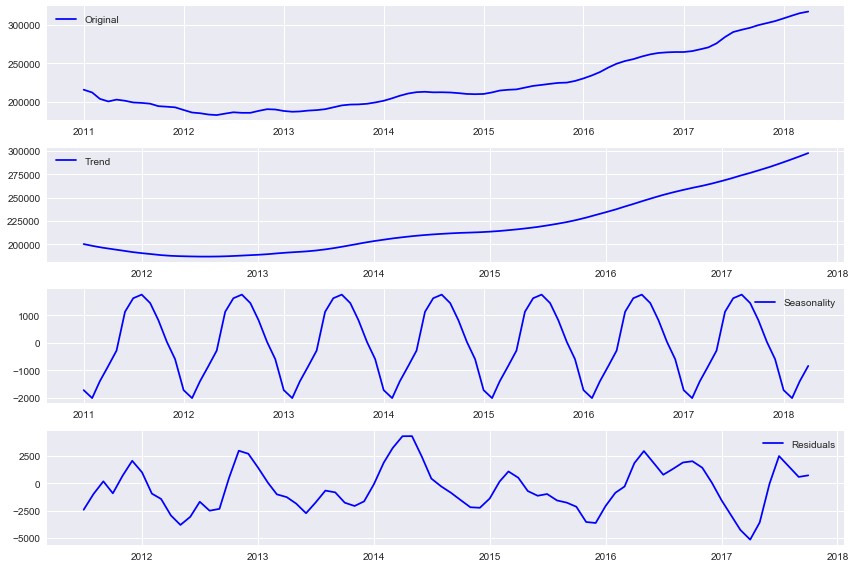

In [410]:
# Taking the decomposition of one zip code
decomposition = seasonal_decompose(Idaho_25_short_dict['83814'])

# Gathering and plotting the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(Idaho_25_short_dict['83814'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

The time difference between the two minimums is 365 days 00:00:00


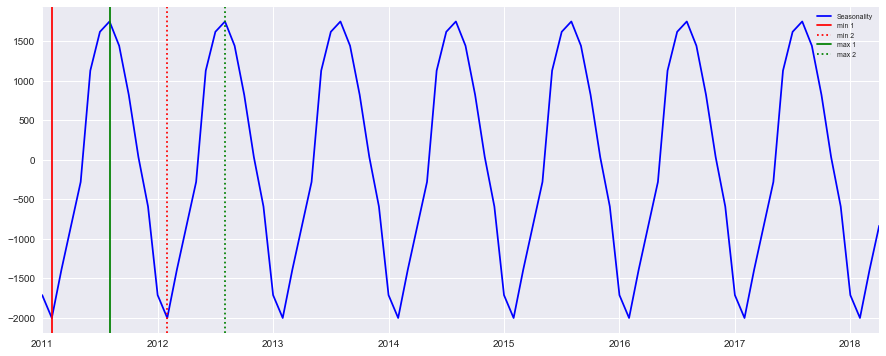

In [411]:
# Looking at the seasonal plot closer
ax = seasonal.plot(label='Seasonality', color='blue')

min_ = seasonal.idxmin()
max_ = seasonal.idxmax()
min_2 = seasonal[max_:].idxmin()
max_2 = seasonal[min_2:].idxmax()

ax.axvline(min_,label='min 1',c='red')
ax.axvline(min_2,label='min 2',c='red', ls=':')
ax.axvline(max_,label='max 1',c='green')
ax.axvline(max_2,label='max 2',c='green', ls=':')
plt.legend(loc='upper right', fontsize='x-small')

print(f'The time difference between the two minimums is {min_2-min_}')

It looks like the seasonal period is one year, our data is recorded monthly so that means the number of steps in a seasonal period is 12.

## Maps (Uncomment to run)

In [375]:
#with urlopen('https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/id_idaho_zip_codes_geo.min.json') as response:
#    Idaho_Map = json.load(response)

#Idaho_Map["features"][0]

In [376]:
#Don't run this will make the map but it will be too large of a size, deal with this later.

#fig = px.choropleth(Idaho, geojson=Idaho_Map, color="5yr_ROI",
#                    locations="RegionName", featureidkey="properties.ZCTA5CE10",
#                    projection="mercator", hover_data=['City']
#                   )
#fig.update_geos(fitbounds="locations", visible=True)
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#fig.show()

# Modeling

## First going to make one model to see if we can get it to work

### Finding out what parameters to use

Using pmd arima to gather the parameters that are best for modeling

In [377]:
len(Idaho_25_short_dict['83814'])

88

In [378]:
# Train size is 6 years and 10 months, test size is 6 months
train, test = train_test_split(Idaho_25_short_dict['83814'], train_size=82)

In [379]:
print(train.index[0])
print(train.index[-1])

2011-01-01 00:00:00
2017-10-01 00:00:00


In [380]:
# Basically Gridsearch
auto_model = pm.auto_arima(y=train, start_p=0, start_q=0, max_p=5, max_q=5,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, m=12,
                           max_order=None,trace=True)

display(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1331.296, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1334.422, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1334.685, Time=0.06 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1332.986, Time=0.12 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1332.985, Time=0.15 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1332.777, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1333.081, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1334.489, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1333.128, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.893 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -664.648
Date:                Fri, 16 Apr 2021   AIC                           1331.296
Time:                        14:05:53   BIC                           1333.678
Sample:                             0   HQIC                          1332.251
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.631e+05   6.25e+04     15.413      0.000    8.41e+05    1.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.99   Jarque-Bera (JB):               326.99
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               6.10   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

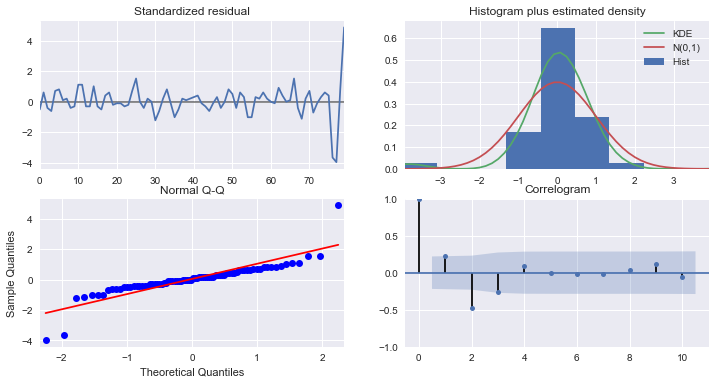

In [381]:
auto_model.plot_diagnostics(figsize=(12,6));

In [382]:
auto_model.get_params()

{'maxiter': 50,
 'method': 'lbfgs',
 'order': (0, 2, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': {},
 'seasonal_order': (0, 0, 0, 12),
 'start_params': None,
 'suppress_warnings': True,
 'trend': None,
 'with_intercept': False}

### Using best params to make an initial model

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -656.709
Date:                Fri, 16 Apr 2021   AIC                           1315.417
Time:                        14:05:54   BIC                           1317.787
Sample:                    01-01-2011   HQIC                          1316.367
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.716e+05   6.36e+04     15.274      0.000    8.47e+05     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.13   Jarque-Bera (JB):               318.81
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               6.25   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

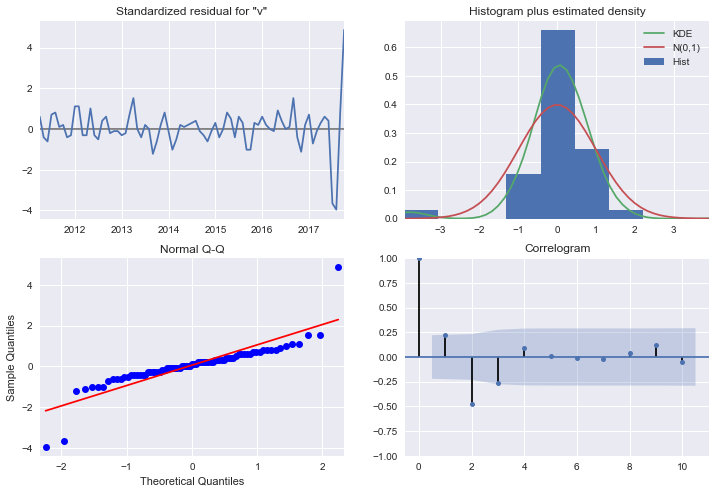

In [383]:
# Using the best params to train the model
Test_model = SARIMAX(train['value'].astype('int'),
                    order=auto_model.order,
                    seasonal_order=auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False)
output = Test_model.fit()
display(output.summary());
output.plot_diagnostics(figsize=(12,8));

In [384]:
# Taking the initial model and checking the predictions it makes with the trained data.
# Non dynamic
predictions = output.get_prediction(start='2016-10-01',end='2017-10-01',dynamic=False)
predictions_conf = predictions.conf_int()

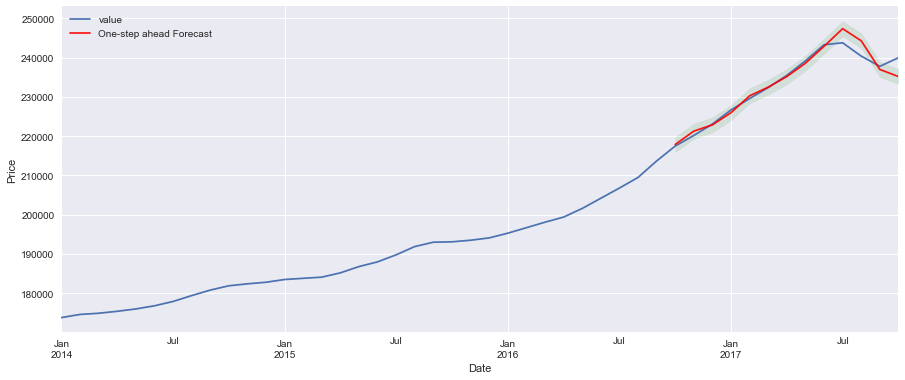

In [385]:
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15,6

# Plot observed values
ax = train['2014':].plot()

# Plot predicted values
predictions.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', color='red', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(predictions_conf.index,
                predictions_conf.iloc[:, 0],
                predictions_conf.iloc[:, 1], color='g', alpha=0.1)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [386]:
y_hat = predictions.predicted_mean
real_values = train['2016-10-01':]['value']

# Compute the mean square error
mse = ((real_values-y_hat)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4220000.0


In [387]:
# Taking the initial model and checking the predictions it makes with the trained data.
# dynamic
predictions_dyn = output.get_prediction(start='2016-10-01',end='2017-10-01',
                                    dynamic=True, full_results=True)
predictions_dyn_conf = predictions_dyn.conf_int()

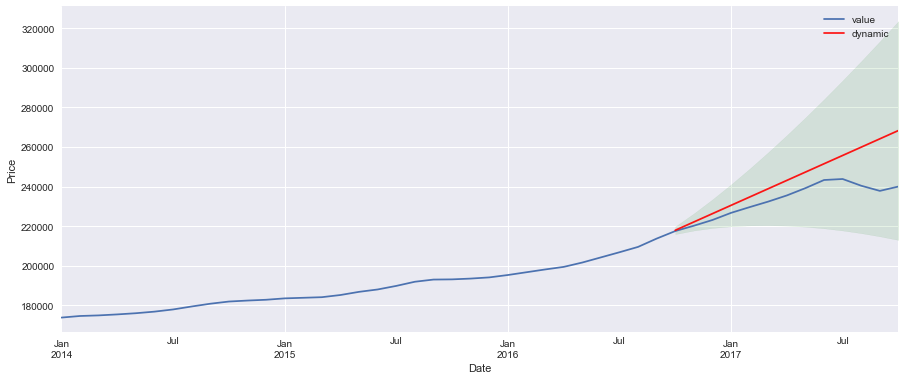

In [388]:
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15,6

# Plot observed values
ax = train['2014':].plot()

# Plot predicted values
predictions_dyn.predicted_mean.plot(ax=ax, label='dynamic', color='red', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(predictions_dyn_conf.index,
                predictions_dyn_conf.iloc[:, 0],
                predictions_dyn_conf.iloc[:, 1], color='g', alpha=0.1)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [389]:
y_hat = predictions_dyn.predicted_mean
real_values = train['2016-10-01':]['value']

# Compute the mean square error
mse = ((real_values-y_hat)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 177058461.54


The dynamic forecasting does much worse than the one-step forecasting. Dynamic is more true to how the actual model will perform.

In [390]:
# Looking at the forecast for the "test" data. To see if it is able to forecast well.
forecast = output.get_forecast(steps = 6)
forecast_conf = forecast.conf_int()

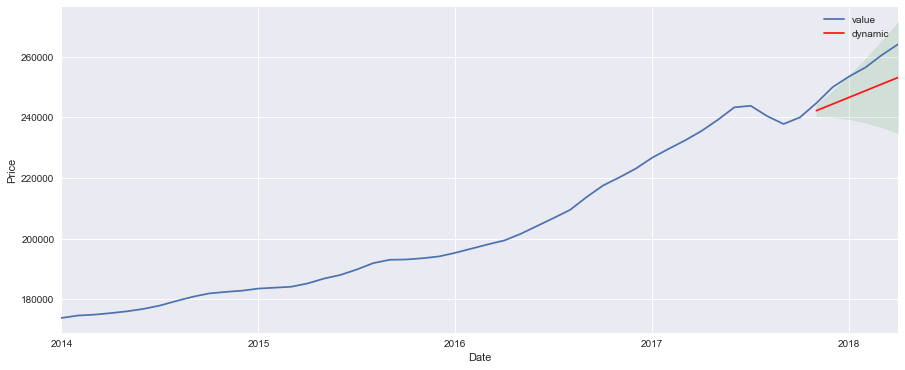

In [391]:
# Plot real vs predicted values along with confidence interval
rcParams['figure.figsize'] = 15,6

# Plot observed values
ax = Idaho_25_short_dict['83814']['2014':].plot()

# Plot forecasted values
forecast.predicted_mean.plot(ax=ax, label='dynamic', color='red', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='g', alpha=0.1)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [392]:
y_hat = forecast.predicted_mean
real_values = Idaho_25_short_dict['83814']['2017-10-01':]['value']

# Compute the mean square error
mse = ((real_values-y_hat)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 59611666.67


### Making the final model to predict future prices

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -709.431
Date:                Fri, 16 Apr 2021   AIC                           1420.862
Time:                        14:05:56   BIC                           1423.305
Sample:                    01-01-2011   HQIC                          1421.845
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.039e+06   7.14e+04     14.556      0.000    8.99e+05    1.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.55   Jarque-Bera (JB):               226.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.08   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

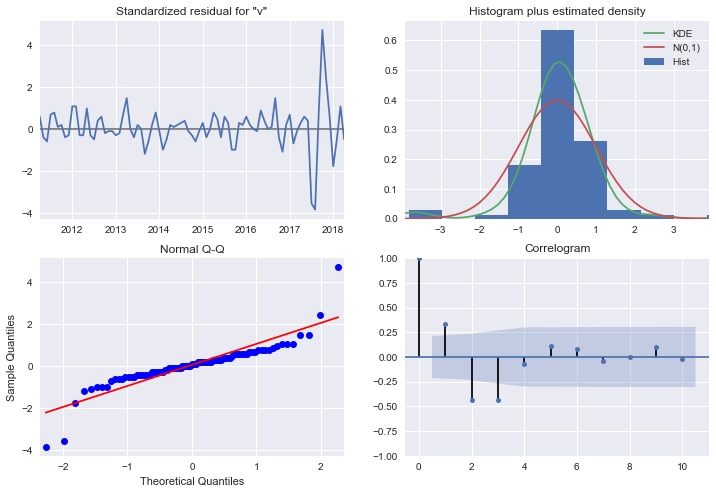

In [393]:
# Making a model for the data we have (train + test) and seeing future predictions
Final_model = SARIMAX(Idaho_25_short_dict['83814']['value'].astype('int'),
                    order=auto_model.order,
                    seasonal_order=auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False)
Final_output = Final_model.fit()
display(Final_output.summary());
Final_output.plot_diagnostics(figsize=(12,8));

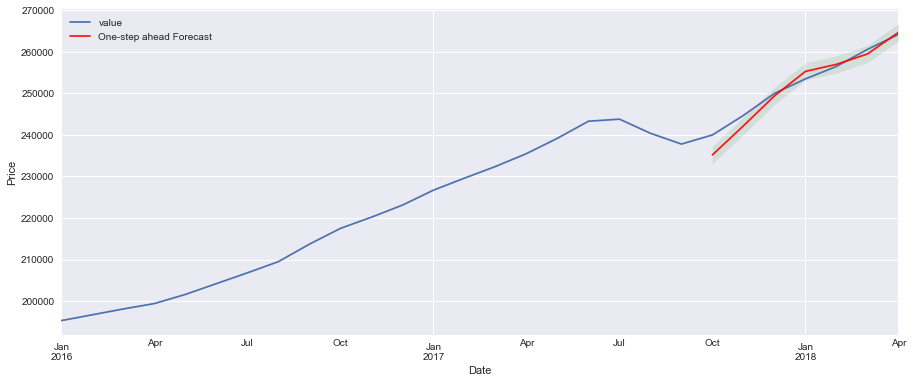

In [394]:
# Checking one step prediction on the last year of data
Final_predictions = Final_output.get_prediction(start='2017-10-01',end='2018-04-01',dynamic=False)
Final_predictions_conf = Final_predictions.conf_int()

# Plot observed values
ax = Idaho_25_short_dict['83814']['value']['2016':].plot()

# Plot predicted values
Final_predictions.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', color='red', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(Final_predictions_conf.index,
                Final_predictions_conf.iloc[:, 0],
                Final_predictions_conf.iloc[:, 1], color='g', alpha=0.1)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [395]:
y_hat = Final_predictions.predicted_mean
real_values = Idaho_25_short_dict['83814']['2017-10-01':]['value']

# Compute the mean square error
mse = ((real_values-y_hat)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 4942857.14


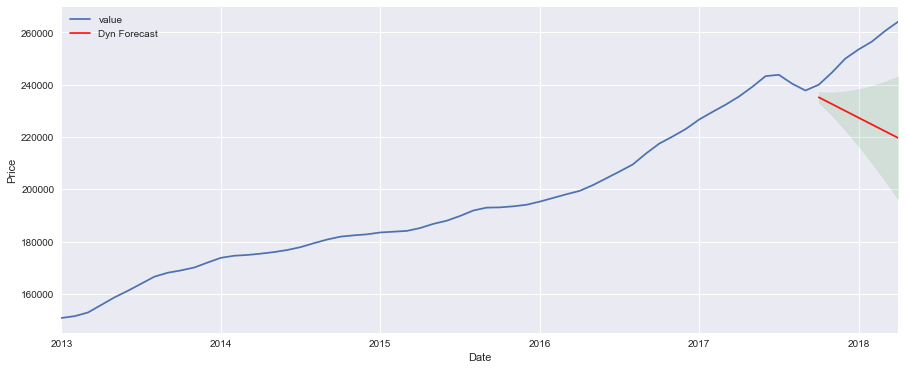

In [396]:
# Checking one step prediction on the last year of data
Final_dyn_predictions = Final_output.get_prediction(start='2017-10-01',end='2018-04-01',dynamic=True)
Final_dyn_predictions_conf = Final_dyn_predictions.conf_int()

# Plot observed values
ax = Idaho_25_short_dict['83814']['value']['2013':].plot()

# Plot predicted values
Final_dyn_predictions.predicted_mean.plot(ax=ax, label='Dyn Forecast', color='red', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(Final_dyn_predictions_conf.index,
                Final_dyn_predictions_conf.iloc[:, 0],
                Final_dyn_predictions_conf.iloc[:, 1], color='g', alpha=0.1)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [397]:
y_hat = Final_dyn_predictions.predicted_mean
real_values = Idaho_25_short_dict['83814']['2017-10-01':]['value']

# Compute the mean square error
mse = ((real_values-y_hat)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 817038571.43


In [398]:
# Getting the next year's price predictions and the confidence interval
future_year = Final_output.get_forecast(steps=12)
future_year_conf = future_year.conf_int()

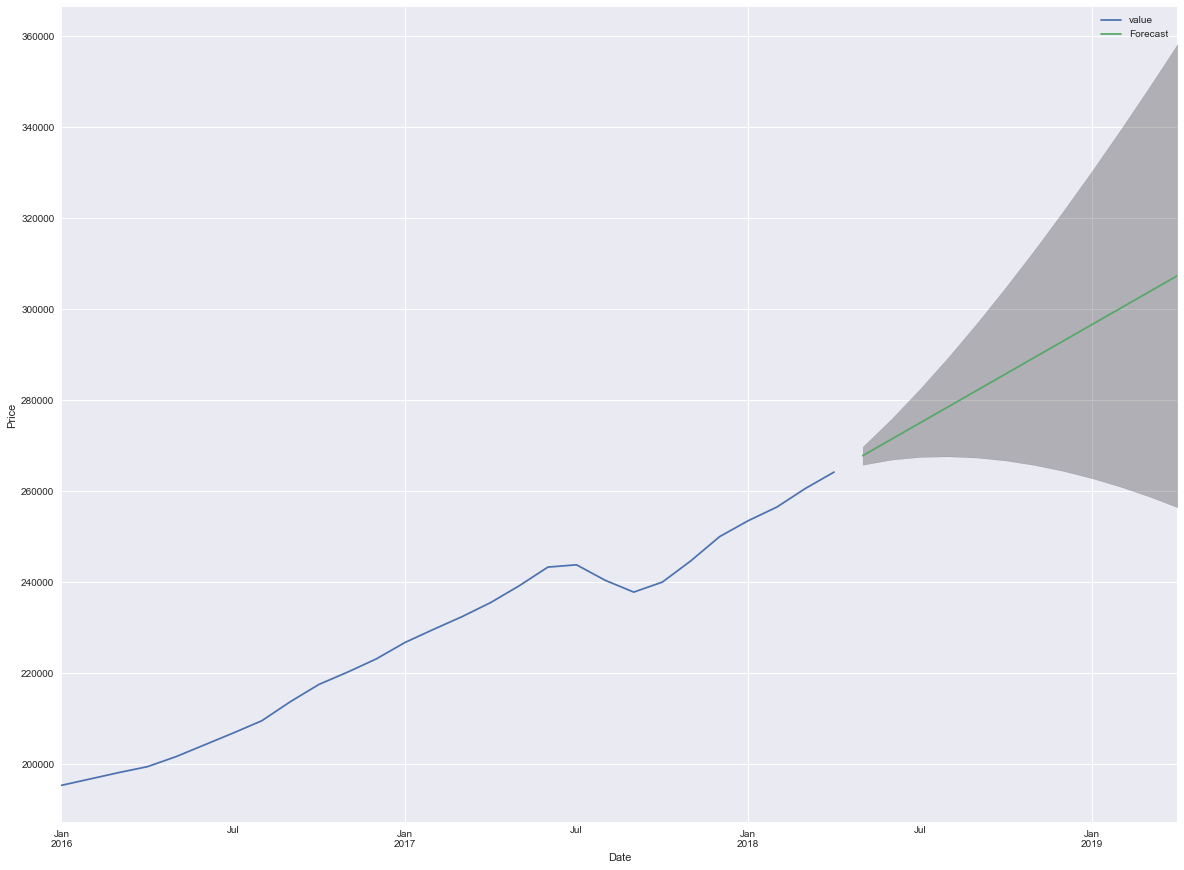

In [399]:
# Plotting the next predicted years prices
ax=Idaho_25_short_dict['83814']['2016':].plot(label='Observed', figsize=(20,15))

future_year.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(future_year_conf.index,
                future_year_conf.iloc[:,0],
                future_year_conf.iloc[:,1],
                color='k',
                alpha=0.25)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [400]:
future_year.predicted_mean[-1]

307400.0

## Making a function to model all 25 zipcodes

Make sure to have a table that will store all aspects of the models.

In [401]:
# This function will automatically train/test split the data
# Then grid search for the best parameters
# Then create a model on the training data and check it against the test data
# Finally it will create a final model and give us a one year prediction

def autobot(data, beg='2013', train_check_start='2016-10-01',
            train_check_end='2017-10-01', final_check_start='2017-10-01',
            final_check_end='2018-04-01', train_size=82, future=12):

    
    # Train size is 82 months, test size is 6 months
    train, test = train_test_split(data, train_size=train_size)
    
    # Using pm auto_arima to find the best parameters
    auto_model = pm.auto_arima(y=train['value'], start_p=0, start_q=0, max_p=5,
                               max_q=5, start_P=0, start_Q=0, max_P=5, max_Q=5,
                               m=12, max_order=None, trace=True)
    print('Auto_model summary')
    display(auto_model.summary())
    
    
    # Getting the order and seasonal_order
    order = auto_model.order
    seasonal_order = auto_model.seasonal_order
    
    # Making the Initial SARIMAX model with the best parameters
    Train_model = SARIMAX(train['value'].astype('int'),
                    order=order,
                    seasonal_order=seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False)
    train_output = Train_model.fit()
    print('Train_model summary')
    display(train_output.summary());
    
    # Getting One Step prediction to check initial model
    train_prediction = train_output.get_prediction(start=train_check_start,
                                           end=train_check_end,
                                           dynamic=False)
    train_prediction_conf = train_prediction.conf_int()
    
    # Getting dynamic prediction to check initial model
    train_prediction_dyn = train_output.get_prediction(start=train_check_start, 
                                                     end=train_check_end, 
                                                     dynamic=True)
    train_prediction_dyn_conf = train_prediction_dyn.conf_int()
    
    #Getting forecast to see how well the initial model does compared to the test
    train_forecast = train_output.get_forecast(steps = 6)
    train_forecast_conf = train_forecast.conf_int()
    
    
    # Calculating MSE for all predictions/forecast for initial model
    train_mse = mse_calc(data=train, prediction=train_prediction, 
                         start=train_check_start)
    train_dyn_mse = mse_calc(data=train, prediction=train_prediction_dyn, 
                             start=train_check_start)
    train_forecast_mse = mse_calc(data=data, prediction=train_forecast, 
                                  start=final_check_start)
    
    
    
    # Final model that's going to predict the future using both train + test
    Final_model = SARIMAX(data['value'].astype('int'),
                    order=auto_model.order,
                    seasonal_order=auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False)
    Final_output = Final_model.fit()
    print('Final_output summary')
    display(Final_output.summary());
 

    # Getting One Step prediction to check Final model
    final_prediction = Final_output.get_prediction(start=final_check_start,
                                           end=final_check_end,
                                           dynamic=False)
    final_prediction_conf = final_prediction.conf_int()
    
    # Getting dynamic prediction to check Final model
    final_prediction_dyn = Final_output.get_prediction(start=final_check_start, 
                                                     end=final_check_end, 
                                                     dynamic=True)
    final_prediction_dyn_conf = final_prediction_dyn.conf_int()
    
    #Getting forecast to see how well the initial model does compared to the test
    final_forecast = Final_output.get_forecast(steps = future)
    final_forecast_conf = final_forecast.conf_int()
    
    
    # Calculating MSE for all predictions for initial model
    final_mse = mse_calc(data=data, prediction=final_prediction, 
                         start=final_check_start)
    final_dyn_mse = mse_calc(data=data, prediction=final_prediction_dyn, 
                             start=final_check_start)
    final_dyn_rmse = np.sqrt(final_dyn_mse)

    display(Final_output.plot_diagnostics());
    PlotPredictions(obs_data=data, 
                    pred_data=final_forecast, 
                    pred_data_conf=final_forecast_conf)
    
    
    return [order, seasonal_order, train_mse, train_dyn_mse, train_forecast_mse, final_mse,
            final_dyn_mse, final_dyn_rmse, data.loc[final_check_end]['value'],
            final_forecast.predicted_mean[-1]]

In [402]:
# This function will plot the timeseries and the predicted values from the model

def PlotPredictions(obs_data, pred_data, pred_data_conf, beg='2013'):
    # Plot observed values
    ax = obs_data[beg:].plot(label='Observed')

    # Plot predicted values
    pred_data.predicted_mean.plot(ax=ax)

    # Plot the range for confidence intervals
    ax.fill_between(pred_data_conf.index,
                pred_data_conf.iloc[:, 0],
                pred_data_conf.iloc[:, 1], color='g', alpha=0.1)

    # Set axes labels
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.legend()
    plt.show()

In [403]:
# This function will calculate the mse

def mse_calc(data, prediction, start):
    y_hat = prediction.predicted_mean
    real_values = data[start:]['value']
    mse = ((real_values-y_hat)**2).mean()
    return mse

Modeling for zipcode 83703
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1331.296, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1334.422, Time=0.08 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1334.685, Time=0.06 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1332.986, Time=0.11 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1332.985, Time=0.11 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1332.777, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1333.081, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1334.489, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1333.128, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.726 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -664.648
Date:                Fri, 16 Apr 2021   AIC                           1331.296
Time:                        14:05:59   BIC                           1333.678
Sample:                             0   HQIC                          1332.251
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.631e+05   6.25e+04     15.413      0.000    8.41e+05    1.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.99   Jarque-Bera (JB):               326.99
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               6.10   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -656.709
Date:                Fri, 16 Apr 2021   AIC                           1315.417
Time:                        14:05:59   BIC                           1317.787
Sample:                    01-01-2011   HQIC                          1316.367
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.716e+05   6.36e+04     15.274      0.000    8.47e+05     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.13   Jarque-Bera (JB):               318.81
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               6.25   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -709.431
Date:                Fri, 16 Apr 2021   AIC                           1420.862
Time:                        14:05:59   BIC                           1423.305
Sample:                    01-01-2011   HQIC                          1421.845
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.039e+06   7.14e+04     14.556      0.000    8.99e+05    1.18e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.55   Jarque-Bera (JB):               226.74
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.08   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

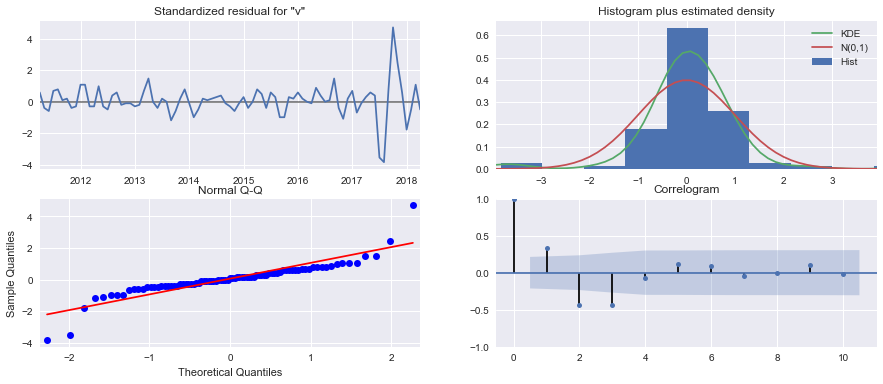

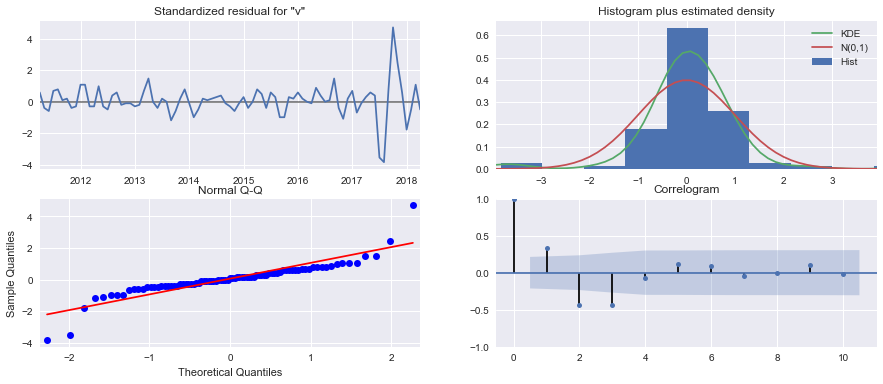

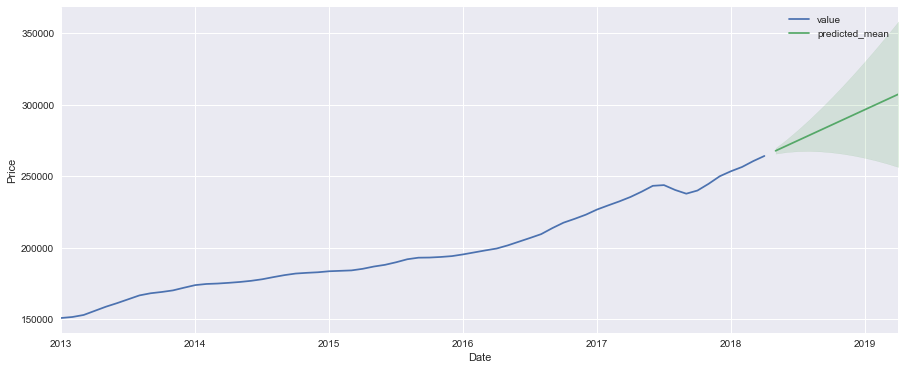

Modeling for zipcode 83814
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1417.804, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1412.730, Time=0.20 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1420.769, Time=0.09 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1411.937, Time=0.03 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=1412.706, Time=0.07 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=1413.131, Time=0.17 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=1404.727, Time=0.03 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=1405.170, Time=0.12 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=1405.131, Time=0.09 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=1404.145, Time=0.52 sec
 ARIMA(2,2,0)(2,0,1)[12]             : AIC=1406.143, Time=1.22 sec
 ARIMA(2,2,0)(1,0,2)[12]             : AIC=inf, Time=1.83 sec
 ARIMA(2,2,0)(0,0,2)[12]             : AIC=1405.579, Time=0.13 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=1405.648, Time=0.16 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   82
Model:             SARIMAX(4, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -682.049
Date:                              Fri, 16 Apr 2021   AIC                           1378.097
Time:                                      14:06:25   BIC                           1394.771
Sample:                                           0   HQIC                          1384.782
                                               - 82                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0098      0.058      0.170      0.865      -0.103       0.123
ar.L2         -0.0689      0.037     -1.840      0.066      -0.142       0.004
ar.L3         -0.0351      0.059     -0.593      0.553      -0.151       0.081
ar.L4          0.0401      0.062      0.647      0.518      -0.081       0.162
ar.S.L12       0.8483      0.320      2.648      0.008       0.220       1.476
ma.S.L12      -0.8620      0.316     -2.724      0.006      -1.482      -0.242
sigma2      1.225e+06   1.35e-07    9.1e+12      0.000    1.22e+06    1.22e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.35   Jarque-Bera (JB):                 0.42
Prob(Q):                              0.13   Prob(JB):                         0.81
Heteroskedasticity (H):               0.97   Skew:                             0.17
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.32e+29. Standard errors may be unstable.
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   82
Model:             SARIMAX(4, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -531.216
Date:                              Fri, 16 Apr 2021   AIC                           1076.431
Time:                                      14:06:25   BIC                           1091.543
Sample:                                  01-01-2011   HQIC                          1082.384
                                       - 10-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5411      0.131      4.140      0.000       0.285       0.797
ar.L2         -0.7451      0.145     -5.156      0.000      -1.028      -0.462
ar.L3          0.3181      0.161      1.979      0.048       0.003       0.633
ar.L4         -0.1545      0.140     -1.107      0.268      -0.428       0.119
ar.S.L12       0.0737      0.295      0.250      0.803      -0.505       0.652
ma.S.L12       0.0695      0.304      0.228      0.819      -0.527       0.666
sigma2      9.496e+05   1.98e+05      4.801      0.000    5.62e+05    1.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.82
Prob(Q):                              0.77   Prob(JB):                         0.40
Heteroskedasticity (H):               3.07   Skew:                             0.40
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   88
Model:             SARIMAX(4, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -578.799
Date:                              Fri, 16 Apr 2021   AIC                           1171.597
Time:                                      14:06:25   BIC                           1187.337
Sample:                                  01-01-2011   HQIC                          1177.849
                                       - 04-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5474      0.122      4.503      0.000       0.309       0.786
ar.L2         -0.7606      0.134     -5.676      0.000      -1.023      -0.498
ar.L3          0.3367      0.143      2.355      0.019       0.057       0.617
ar.L4         -0.1840      0.127     -1.452      0.147      -0.432       0.064
ar.S.L12       0.0807      0.266      0.304      0.761      -0.440       0.602
ma.S.L12       0.0748      0.275      0.272      0.786      -0.464       0.614
sigma2      8.919e+05   1.71e+05      5.223      0.000    5.57e+05    1.23e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 2.06
Prob(Q):                              0.70   Prob(JB):                         0.36
Heteroskedasticity (H):               2.28   Skew:                             0.42
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

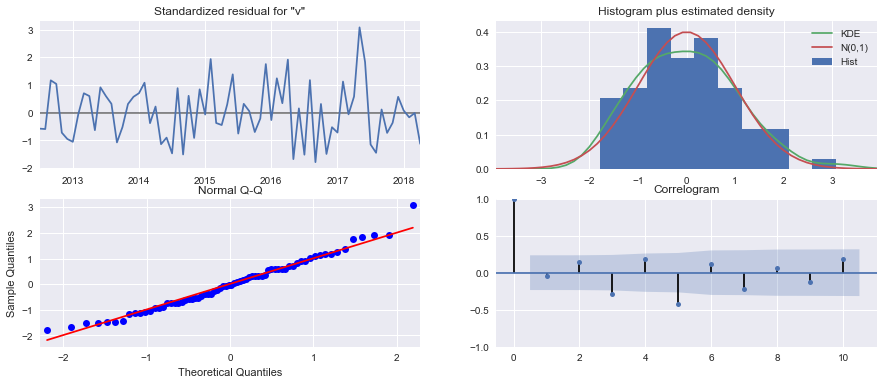

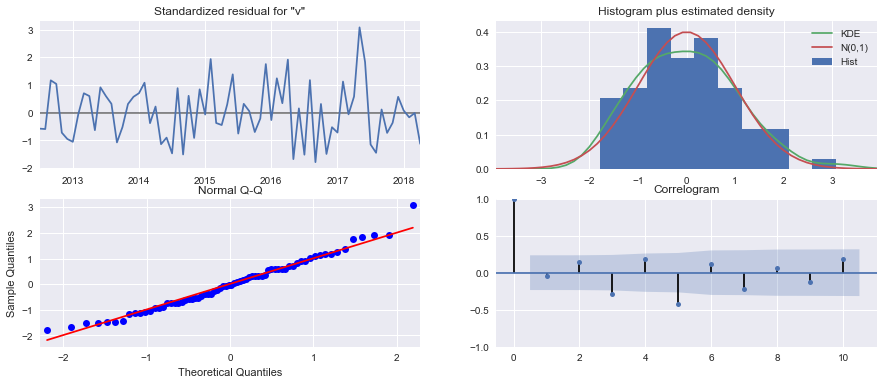

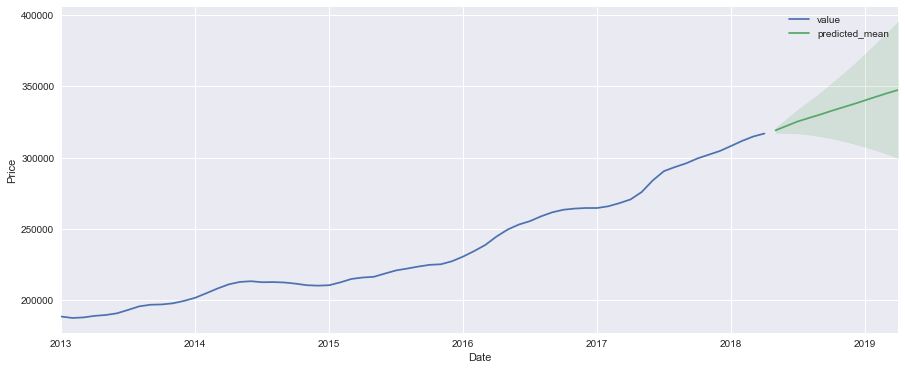

Modeling for zipcode 83676
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1370.153, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1373.442, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1373.598, Time=0.04 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1371.328, Time=0.05 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1373.529, Time=0.02 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1375.161, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1372.342, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1372.541, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1372.049, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.421 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -684.076
Date:                Fri, 16 Apr 2021   AIC                           1370.153
Time:                        14:06:27   BIC                           1372.535
Sample:                             0   HQIC                          1371.108
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.565e+06   2.52e+05      6.221      0.000    1.07e+06    2.06e+06
===================================================================================
Ljung-Box (L1) (Q):                   6.14   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.01   Prob(JB):                         0.99
Heteroskedasticity (H):               1.51   Skew:                            -0.02
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -675.909
Date:                Fri, 16 Apr 2021   AIC                           1353.817
Time:                        14:06:27   BIC                           1356.187
Sample:                    01-01-2011   HQIC                          1354.767
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.58e+06   2.57e+05      6.153      0.000    1.08e+06    2.08e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.98   Jarque-Bera (JB):                 0.03
Prob(Q):                              0.01   Prob(JB):                         0.99
Heteroskedasticity (H):               1.39   Skew:                            -0.01
Prob(H) (two-sided):                  0.41   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -727.547
Date:                Fri, 16 Apr 2021   AIC                           1457.094
Time:                        14:06:27   BIC                           1459.536
Sample:                    01-01-2011   HQIC                          1458.076
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.591e+06   2.52e+05      6.307      0.000     1.1e+06    2.09e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.56   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.02   Prob(JB):                         0.95
Heteroskedasticity (H):               1.51   Skew:                            -0.05
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

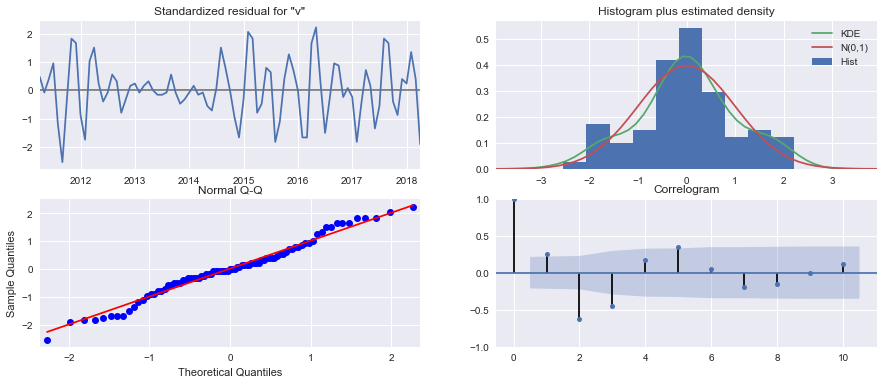

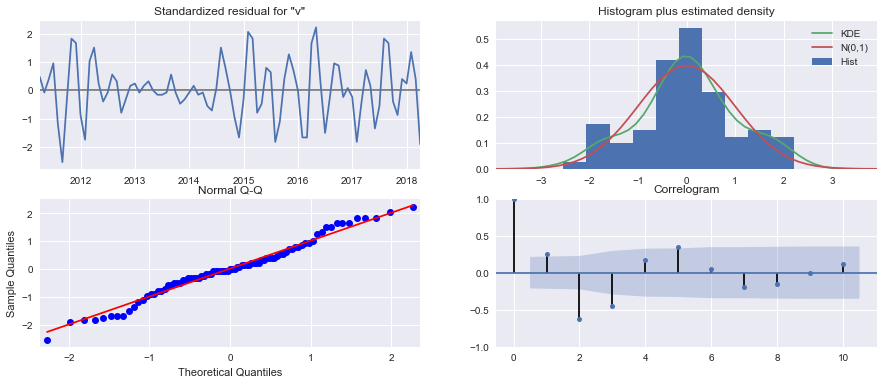

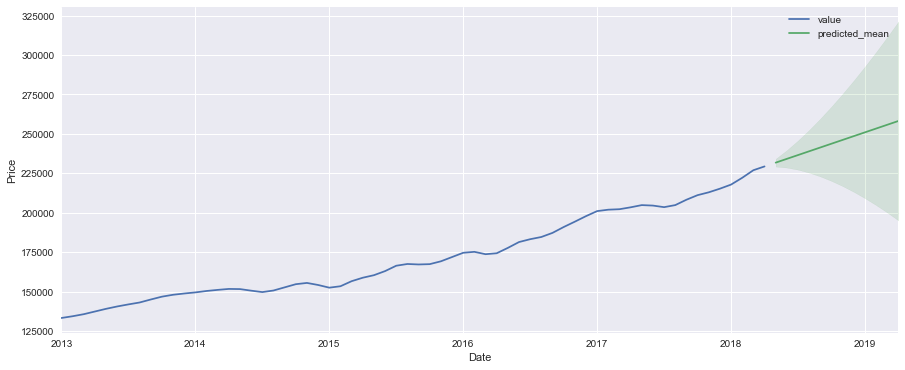

Modeling for zipcode 83605
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1238.286, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1240.534, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1240.508, Time=0.09 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1238.877, Time=0.14 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1238.894, Time=0.17 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1240.863, Time=0.50 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1239.949, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1239.899, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1239.576, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1240.046, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.302 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -618.143
Date:                Fri, 16 Apr 2021   AIC                           1238.286
Time:                        14:06:31   BIC                           1240.668
Sample:                             0   HQIC                          1239.241
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.011e+05   3.38e+04      8.900      0.000    2.35e+05    3.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.24   Jarque-Bera (JB):                15.28
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -610.102
Date:                Fri, 16 Apr 2021   AIC                           1222.203
Time:                        14:06:31   BIC                           1224.573
Sample:                    01-01-2011   HQIC                          1223.152
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.988e+05   3.33e+04      8.963      0.000    2.33e+05    3.64e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.96   Jarque-Bera (JB):                16.07
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -655.725
Date:                Fri, 16 Apr 2021   AIC                           1313.449
Time:                        14:06:31   BIC                           1315.892
Sample:                    01-01-2011   HQIC                          1314.432
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.938e+05   3.19e+04      9.211      0.000    2.31e+05    3.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.62   Jarque-Bera (JB):                16.24
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

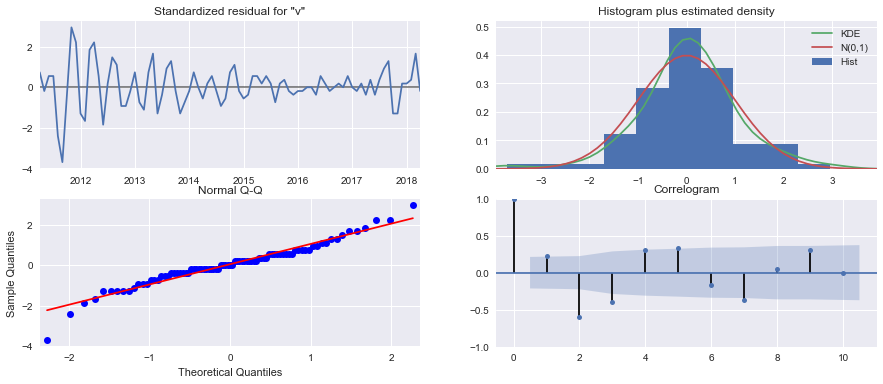

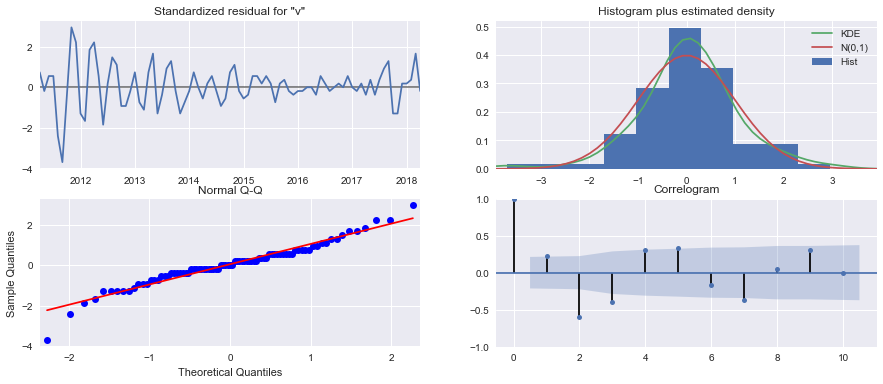

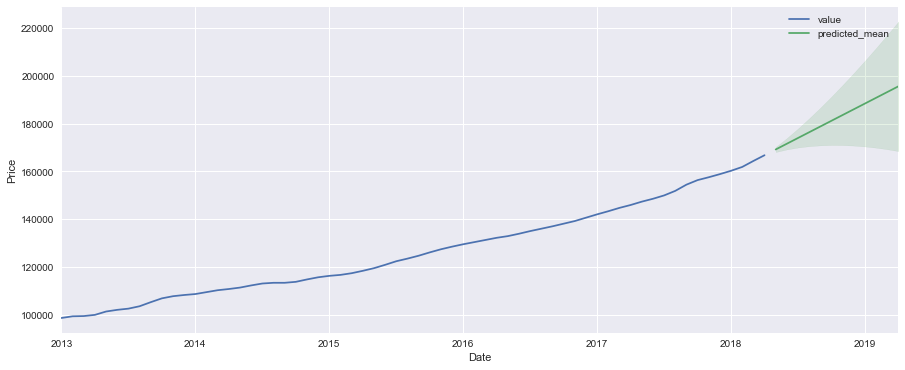

Modeling for zipcode 83702
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1395.782, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1399.600, Time=0.10 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1399.691, Time=0.27 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1398.410, Time=0.04 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1405.341, Time=0.08 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1406.622, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1397.646, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1397.741, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1399.532, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1397.752, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.713 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -696.891
Date:                Fri, 16 Apr 2021   AIC                           1395.782
Time:                        14:06:34   BIC                           1398.164
Sample:                             0   HQIC                          1396.737
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.156e+06   1.51e+05     14.305      0.000    1.86e+06    2.45e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.23   Jarque-Bera (JB):               229.52
Prob(Q):                              0.27   Prob(JB):                         0.00
Heteroskedasticity (H):              10.46   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -688.640
Date:                Fri, 16 Apr 2021   AIC                           1379.281
Time:                        14:06:34   BIC                           1381.650
Sample:                    01-01-2011   HQIC                          1380.230
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       2.18e+06   1.54e+05     14.143      0.000    1.88e+06    2.48e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):               219.64
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              10.34   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -765.451
Date:                Fri, 16 Apr 2021   AIC                           1532.902
Time:                        14:06:34   BIC                           1535.345
Sample:                    01-01-2011   HQIC                          1533.885
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.881e+06   2.22e+05     17.507      0.000    3.45e+06    4.32e+06
===================================================================================
Ljung-Box (L1) (Q):                  10.09   Jarque-Bera (JB):               572.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              18.88   Skew:                             1.96
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

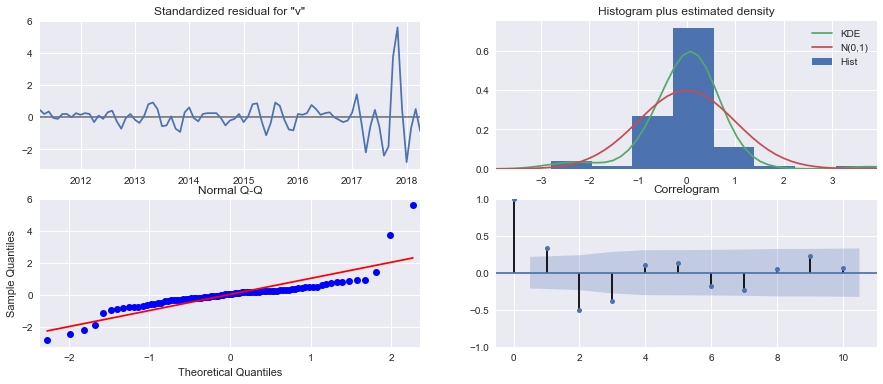

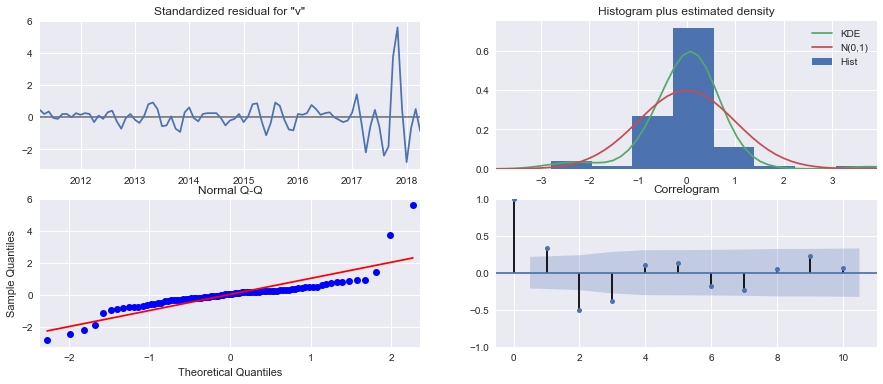

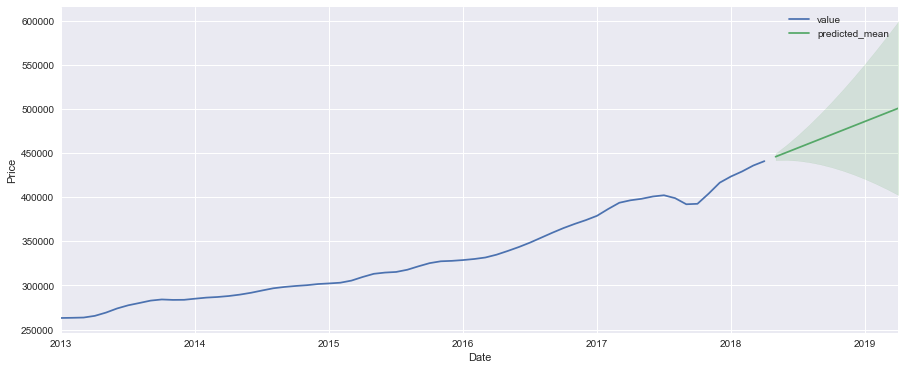

Modeling for zipcode 83705
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1262.282, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1263.923, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1264.232, Time=0.04 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1263.299, Time=0.08 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1263.317, Time=0.15 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1264.738, Time=0.53 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1262.914, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1263.216, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1264.524, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1263.277, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.084 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -630.141
Date:                Fri, 16 Apr 2021   AIC                           1262.282
Time:                        14:06:37   BIC                           1264.664
Sample:                             0   HQIC                          1263.237
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.064e+05   3.95e+04     10.281      0.000    3.29e+05    4.84e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.32   Jarque-Bera (JB):                37.77
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):               1.97   Skew:                            -0.01
Prob(H) (two-sided):                  0.08   Kurtosis:                         6.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -622.321
Date:                Fri, 16 Apr 2021   AIC                           1246.643
Time:                        14:06:38   BIC                           1249.012
Sample:                    01-01-2011   HQIC                          1247.592
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.069e+05   3.96e+04     10.266      0.000    3.29e+05    4.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                39.28
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               2.05   Skew:                            -0.04
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -690.344
Date:                Fri, 16 Apr 2021   AIC                           1382.688
Time:                        14:06:38   BIC                           1385.130
Sample:                    01-01-2011   HQIC                          1383.670
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.633e+05   5.07e+04     13.095      0.000    5.64e+05    7.63e+05
===================================================================================
Ljung-Box (L1) (Q):                  13.39   Jarque-Bera (JB):               170.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.44   Skew:                            -1.35
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

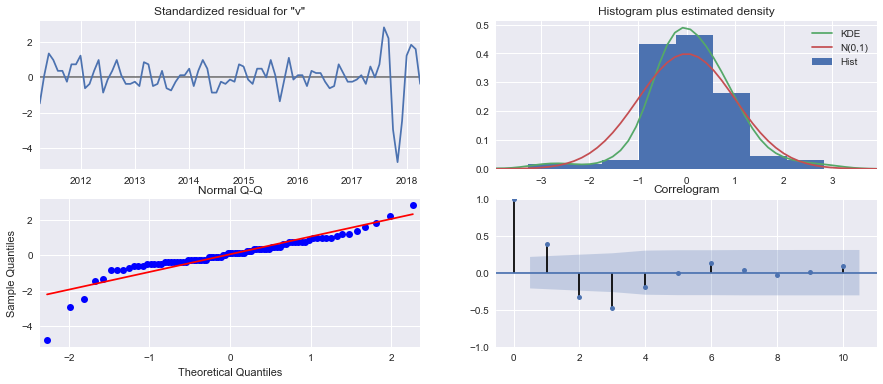

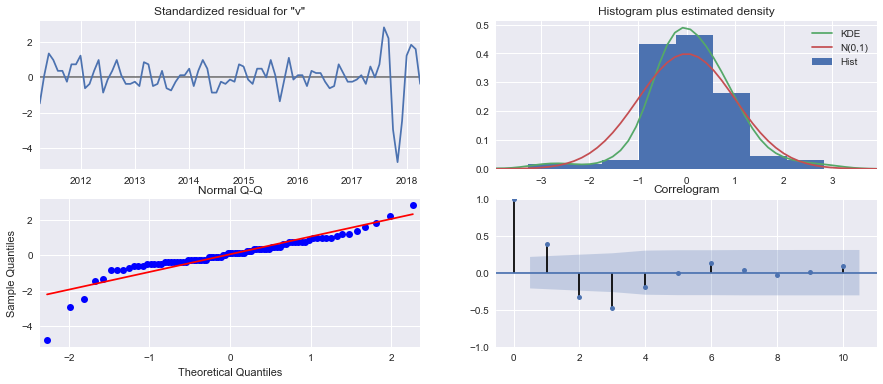

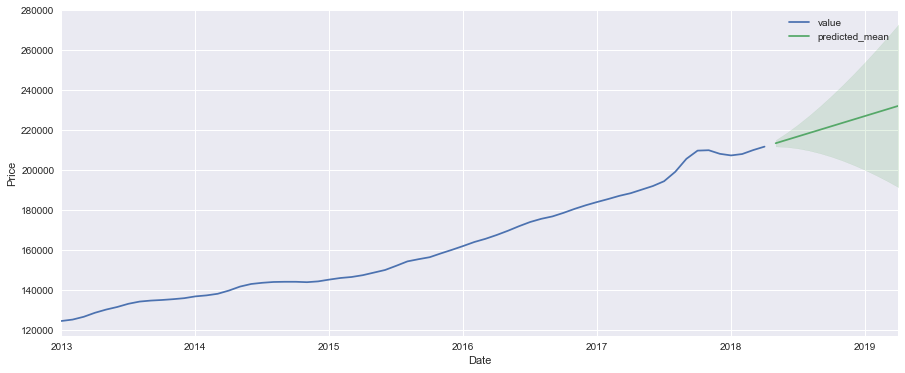

Modeling for zipcode 83651
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1243.646, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1244.214, Time=0.07 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1244.069, Time=0.25 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1242.486, Time=0.13 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=1244.224, Time=0.30 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1242.392, Time=0.17 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=1244.095, Time=0.37 sec
 ARIMA(0,2,0)(1,0,2)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=1244.120, Time=0.08 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=1245.012, Time=0.42 sec
 ARIMA(0,2,0)(0,0,1)[12] intercept   : AIC=1244.115, Time=0.09 sec

Best model:  ARIMA(0,2,0)(0,0,1)[12]          
Total fit time: 2.634 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   82
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -619.196
Date:                              Fri, 16 Apr 2021   AIC                           1242.392
Time:                                      14:06:43   BIC                           1247.156
Sample:                                           0   HQIC                          1244.302
                                               - 82                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.0503      0.039      1.277      0.202      -0.027       0.128
sigma2      3.068e+05    3.6e+04      8.527      0.000    2.36e+05    3.77e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.73   Jarque-Bera (JB):                 9.18
Prob(Q):                              0.02   Prob(JB):                         0.01
Heteroskedasticity (H):               0.22   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   82
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -500.250
Date:                              Fri, 16 Apr 2021   AIC                           1004.500
Time:                                      14:06:43   BIC                           1008.909
Sample:                                  01-01-2011   HQIC                          1006.244
                                       - 10-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.2052      0.167      1.225      0.221      -0.123       0.533
sigma2       1.77e+05   2.82e+04      6.277      0.000    1.22e+05    2.32e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.16   Jarque-Bera (JB):                 5.18
Prob(Q):                              0.14   Prob(JB):                         0.08
Heteroskedasticity (H):               0.52   Skew:                             0.64
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   88
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -545.306
Date:                              Fri, 16 Apr 2021   AIC                           1094.611
Time:                                      14:06:43   BIC                           1099.192
Sample:                                  01-01-2011   HQIC                          1096.437
                                       - 04-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.2265      0.165      1.374      0.169      -0.097       0.550
sigma2      1.782e+05   2.84e+04      6.271      0.000    1.23e+05    2.34e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.04   Jarque-Bera (JB):                 3.88
Prob(Q):                              0.15   Prob(JB):                         0.14
Heteroskedasticity (H):               0.63   Skew:                             0.54
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

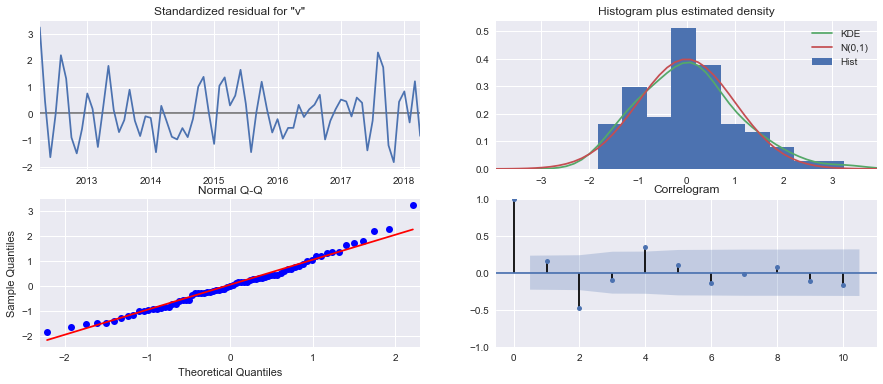

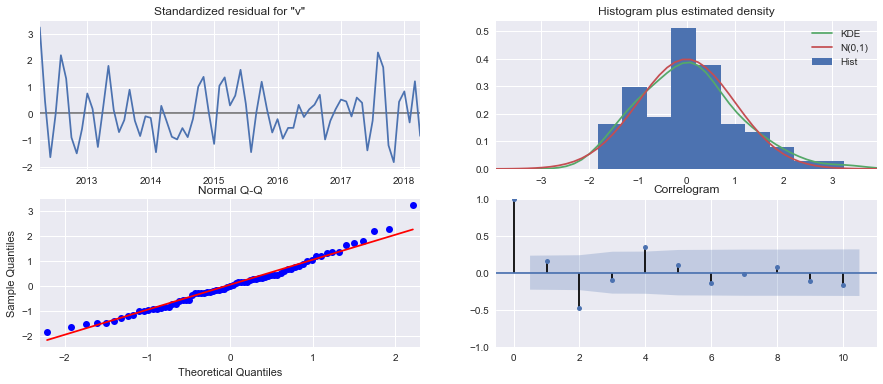

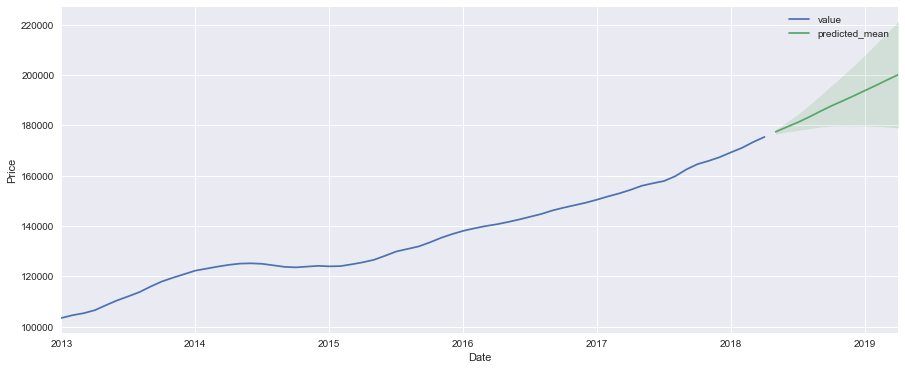

Modeling for zipcode 83350
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1128.109, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1131.839, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1131.787, Time=0.08 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1129.833, Time=0.05 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1129.801, Time=0.08 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1130.110, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1130.097, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1132.079, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1129.309, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.675 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -563.055
Date:                Fri, 16 Apr 2021   AIC                           1128.109
Time:                        14:06:46   BIC                           1130.491
Sample:                             0   HQIC                          1129.064
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.596e+04   1.25e+04      6.083      0.000    5.15e+04       1e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.55   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.21   Prob(JB):                         0.92
Heteroskedasticity (H):               1.43   Skew:                            -0.09
Prob(H) (two-sided):                  0.36   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -556.253
Date:                Fri, 16 Apr 2021   AIC                           1114.505
Time:                        14:06:46   BIC                           1116.875
Sample:                    01-01-2011   HQIC                          1115.454
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.639e+04   1.26e+04      6.044      0.000    5.16e+04    1.01e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.50   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.22   Prob(JB):                         0.94
Heteroskedasticity (H):               1.46   Skew:                            -0.07
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -608.897
Date:                Fri, 16 Apr 2021   AIC                           1219.794
Time:                        14:06:46   BIC                           1222.237
Sample:                    01-01-2011   HQIC                          1220.777
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9.756e+04   1.15e+04      8.460      0.000     7.5e+04     1.2e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.34   Jarque-Bera (JB):                 8.22
Prob(Q):                              0.56   Prob(JB):                         0.02
Heteroskedasticity (H):               2.61   Skew:                             0.48
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

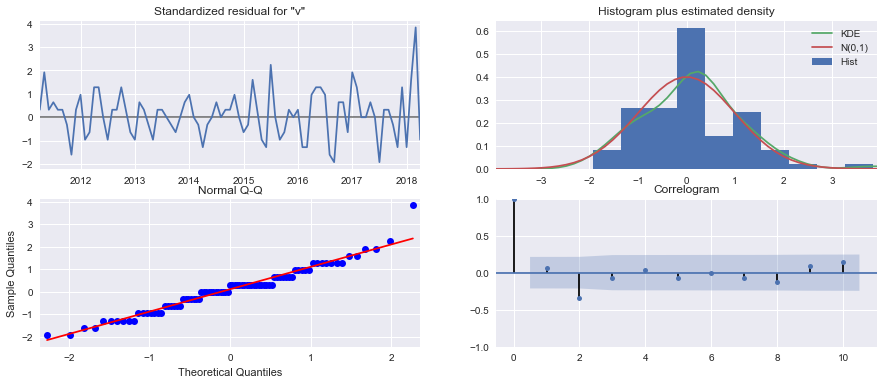

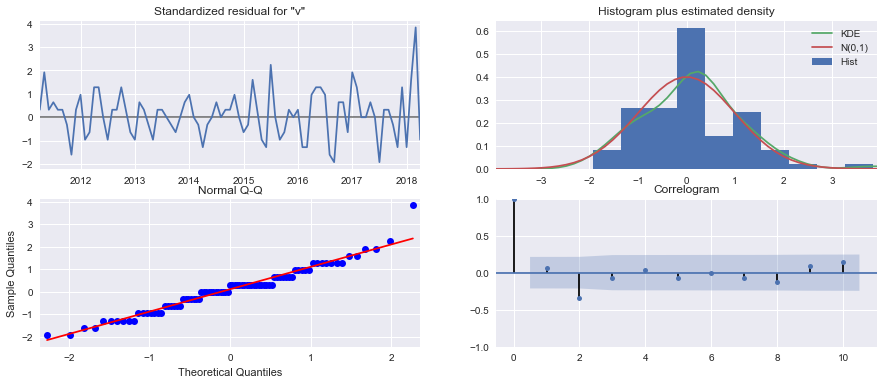

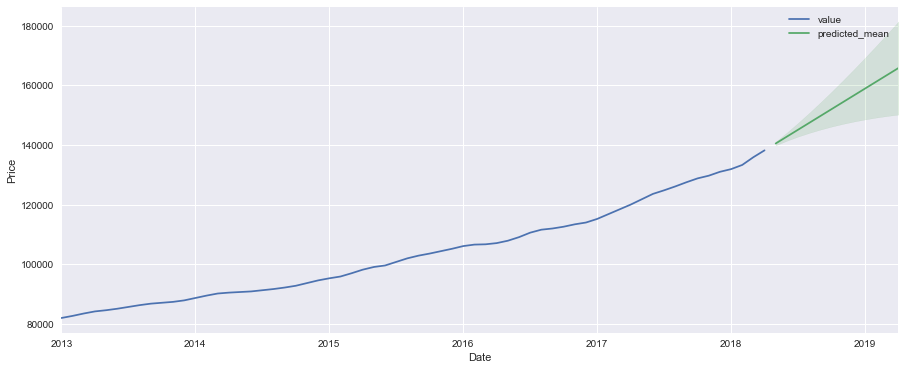

Modeling for zipcode 83801
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1432.943, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1426.855, Time=0.18 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1433.428, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1427.142, Time=0.03 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=1426.656, Time=0.20 sec
 ARIMA(1,2,0)(3,0,0)[12]             : AIC=1428.588, Time=0.33 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=1428.522, Time=0.92 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=1427.462, Time=0.51 sec
 ARIMA(1,2,0)(3,0,1)[12]             : AIC=1430.548, Time=0.53 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=1432.651, Time=0.20 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=1419.090, Time=0.16 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=1421.121, Time=0.10 sec
 ARIMA(2,2,0)(3,0,0)[12]             : AIC=1421.003, Time=0.40 sec
 ARIMA(2,2,0)(2,0,1)[12]             : AIC=1420.846, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   82
Model:             SARIMAX(4, 2, 0)x(2, 0, 0, 12)   Log Likelihood                -690.409
Date:                            Fri, 16 Apr 2021   AIC                           1394.817
Time:                                    14:07:08   BIC                           1411.491
Sample:                                         0   HQIC                          1401.502
                                             - 82                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0056      0.052      0.108      0.914      -0.096       0.107
ar.L2         -0.0592      0.040     -1.481      0.138      -0.138       0.019
ar.L3         -0.0285      0.048     -0.596      0.551      -0.122       0.065
ar.L4          0.0323      0.061      0.531      0.596      -0.087       0.152
ar.S.L12      -0.0162      0.006     -2.866      0.004      -0.027      -0.005
ar.S.L24      -0.0176      0.026     -0.681      0.496      -0.068       0.033
sigma2      1.451e+06   3.06e-09   4.74e+14      0.000    1.45e+06    1.45e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.50   Jarque-Bera (JB):                 2.64
Prob(Q):                              0.11   Prob(JB):                         0.27
Heteroskedasticity (H):               0.34   Skew:                             0.31
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.67e+30. Standard errors may be unstable.
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   82
Model:             SARIMAX(4, 2, 0)x(2, 0, 0, 12)   Log Likelihood                -412.721
Date:                            Fri, 16 Apr 2021   AIC                            839.442
Time:                                    14:07:09   BIC                            853.101
Sample:                                01-01-2011   HQIC                           844.679
                                     - 10-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4995      0.122      4.092      0.000       0.260       0.739
ar.L2         -0.1028      0.155     -0.663      0.508      -0.407       0.201
ar.L3         -0.3899      0.170     -2.294      0.022      -0.723      -0.057
ar.L4          0.0201      0.193      0.104      0.917      -0.359       0.399
ar.S.L12      -0.1057      0.086     -1.231      0.218      -0.274       0.063
ar.S.L24      -0.1431      0.057     -2.514      0.012      -0.255      -0.032
sigma2      4.586e+05   1.19e+05      3.843      0.000    2.25e+05    6.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.66   Prob(JB):                         0.88
Heteroskedasticity (H):               0.71   Skew:                            -0.14
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   88
Model:             SARIMAX(4, 2, 0)x(2, 0, 0, 12)   Log Likelihood                -473.148
Date:                            Fri, 16 Apr 2021   AIC                            960.295
Time:                                    14:07:10   BIC                            974.718
Sample:                                01-01-2011   HQIC                           965.913
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5740      0.107      5.341      0.000       0.363       0.785
ar.L2         -0.3130      0.166     -1.882      0.060      -0.639       0.013
ar.L3         -0.3827      0.194     -1.972      0.049      -0.763      -0.002
ar.L4          0.1158      0.166      0.696      0.486      -0.210       0.442
ar.S.L12      -0.0532      0.107     -0.498      0.619      -0.263       0.156
ar.S.L24      -0.1471      0.068     -2.175      0.030      -0.280      -0.015
sigma2      7.132e+05   1.34e+05      5.329      0.000    4.51e+05    9.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.86   Prob(JB):                         0.44
Heteroskedasticity (H):               1.64   Skew:                             0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

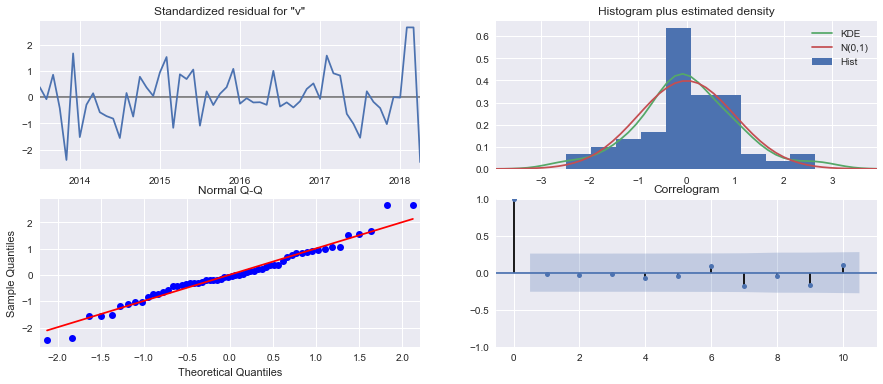

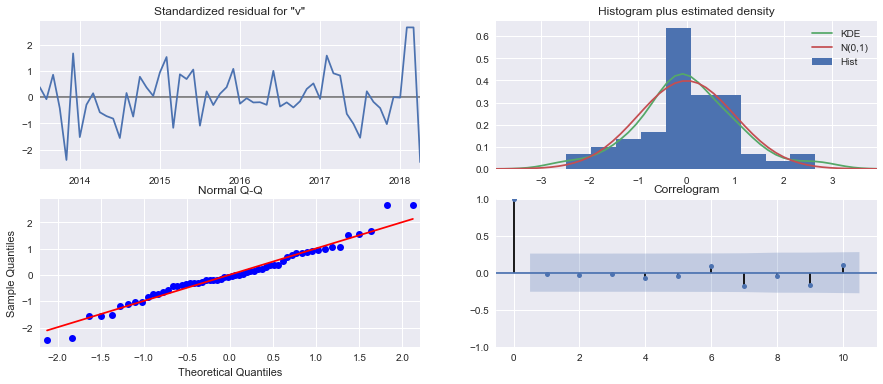

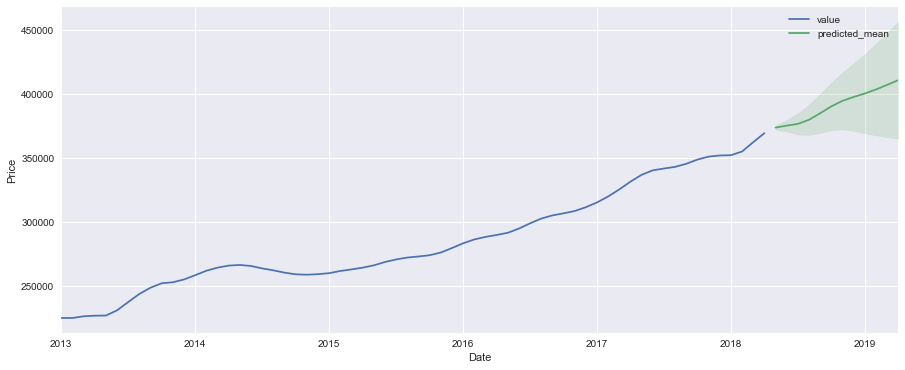

Modeling for zipcode 83845
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1316.031, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1319.784, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1320.374, Time=0.12 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1317.851, Time=0.04 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1317.851, Time=0.18 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.37 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1317.967, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1317.964, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1322.381, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1317.280, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.219 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -657.016
Date:                Fri, 16 Apr 2021   AIC                           1316.031
Time:                        14:07:13   BIC                           1318.413
Sample:                             0   HQIC                          1316.986
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.958e+05    4.7e+04     16.931      0.000    7.04e+05    8.88e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):               507.40
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):              19.95   Skew:                             1.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -649.294
Date:                Fri, 16 Apr 2021   AIC                           1300.587
Time:                        14:07:13   BIC                           1302.957
Sample:                    01-01-2011   HQIC                          1301.536
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.051e+05   4.81e+04     16.727      0.000    7.11e+05    8.99e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.64   Jarque-Bera (JB):               485.88
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):              19.99   Skew:                             1.44
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -708.222
Date:                Fri, 16 Apr 2021   AIC                           1418.443
Time:                        14:07:13   BIC                           1420.886
Sample:                    01-01-2011   HQIC                          1419.426
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.01e+06   6.92e+04     14.590      0.000    8.74e+05    1.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   4.64   Jarque-Bera (JB):               226.75
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):              25.56   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

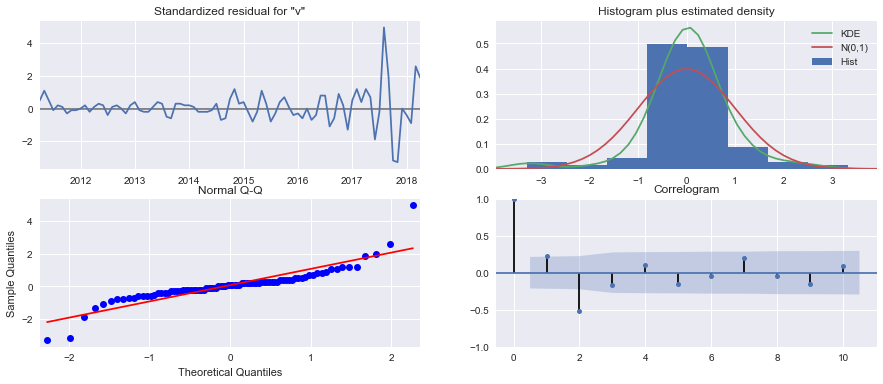

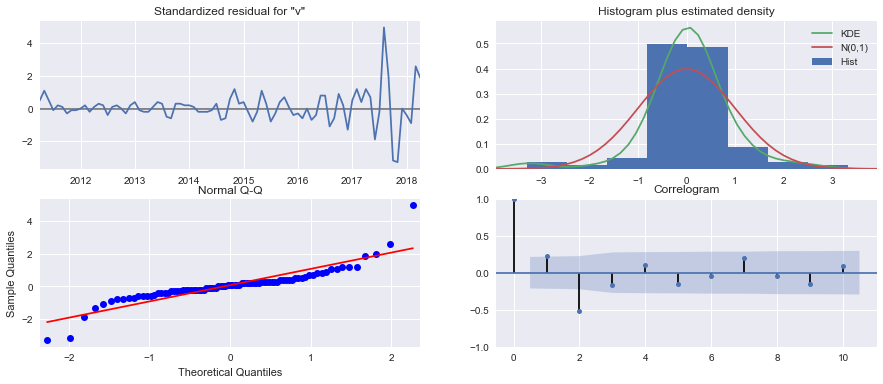

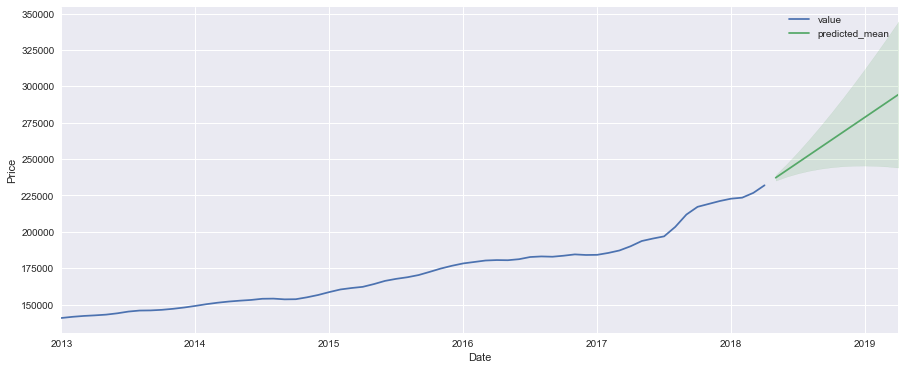

Modeling for zipcode 83347
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1190.368, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1194.170, Time=0.10 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1194.154, Time=0.05 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1192.136, Time=0.07 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1192.156, Time=0.06 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1192.408, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1192.367, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1192.367, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1192.293, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.246 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -594.184
Date:                Fri, 16 Apr 2021   AIC                           1190.368
Time:                        14:07:17   BIC                           1192.750
Sample:                             0   HQIC                          1191.323
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.654e+05   1.45e+04     11.417      0.000    1.37e+05    1.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.37   Jarque-Bera (JB):                93.02
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               3.43   Skew:                            -1.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -587.134
Date:                Fri, 16 Apr 2021   AIC                           1176.268
Time:                        14:07:17   BIC                           1178.638
Sample:                    01-01-2011   HQIC                          1177.218
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.669e+05   1.48e+04     11.309      0.000    1.38e+05    1.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):                88.69
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               3.38   Skew:                            -1.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -667.648
Date:                Fri, 16 Apr 2021   AIC                           1337.296
Time:                        14:07:17   BIC                           1339.739
Sample:                    01-01-2011   HQIC                          1338.278
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.886e+05   2.76e+04     14.074      0.000    3.34e+05    4.43e+05
===================================================================================
Ljung-Box (L1) (Q):                  12.16   Jarque-Bera (JB):               191.75
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              11.87   Skew:                             0.94
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

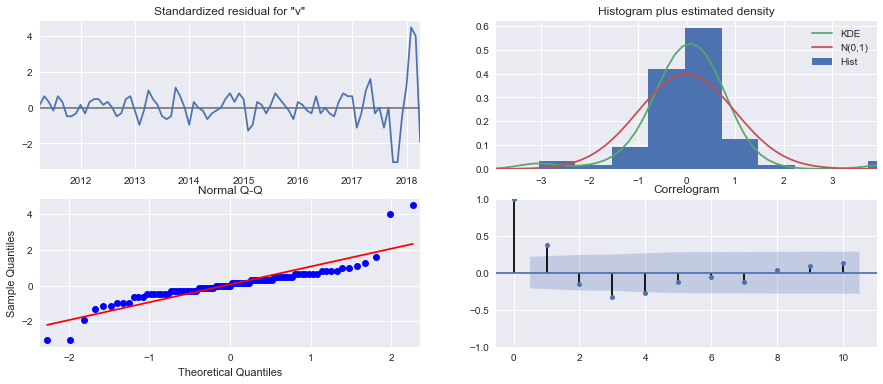

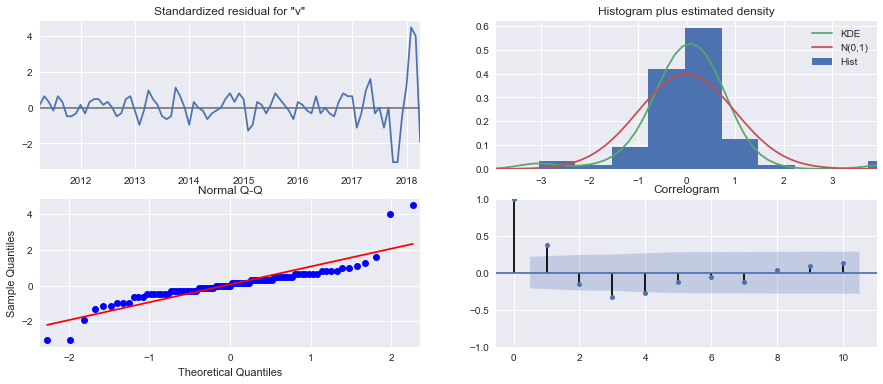

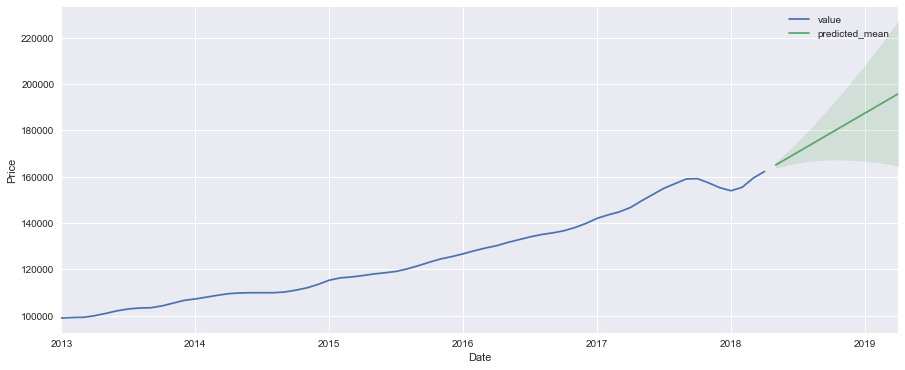

Modeling for zipcode 83607
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1275.261, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1276.521, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1276.975, Time=0.04 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1275.182, Time=0.06 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=1277.155, Time=0.19 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1277.163, Time=0.40 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1275.170, Time=0.06 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=1277.160, Time=0.20 sec
 ARIMA(0,2,0)(1,0,2)[12]             : AIC=inf, Time=0.70 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=1276.509, Time=0.07 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=1277.372, Time=0.23 sec
 ARIMA(0,2,0)(0,0,1)[12] intercept   : AIC=1276.760, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,1)[12]          
Total fit time: 2.071 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   82
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -635.585
Date:                              Fri, 16 Apr 2021   AIC                           1275.170
Time:                                      14:07:22   BIC                           1279.934
Sample:                                           0   HQIC                          1277.080
                                               - 82                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.0301      0.032      0.941      0.347      -0.033       0.093
sigma2      4.624e+05   5.11e+04      9.044      0.000    3.62e+05    5.63e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.74   Jarque-Bera (JB):                15.92
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -0.22
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   82
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -516.728
Date:                              Fri, 16 Apr 2021   AIC                           1037.457
Time:                                      14:07:22   BIC                           1041.866
Sample:                                  01-01-2011   HQIC                          1039.202
                                       - 10-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.0451      0.160     -0.281      0.778      -0.359       0.269
sigma2      2.933e+05   4.43e+04      6.618      0.000    2.06e+05     3.8e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                 4.82
Prob(Q):                              0.28   Prob(JB):                         0.09
Heteroskedasticity (H):               1.07   Skew:                             0.61
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   88
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -567.087
Date:                              Fri, 16 Apr 2021   AIC                           1138.174
Time:                                      14:07:22   BIC                           1142.755
Sample:                                  01-01-2011   HQIC                          1139.999
                                       - 04-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.1335      0.108     -1.232      0.218      -0.346       0.079
sigma2      3.434e+05   5.81e+04      5.911      0.000     2.3e+05    4.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.91   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.17   Prob(JB):                         0.44
Heteroskedasticity (H):               1.47   Skew:                             0.35
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

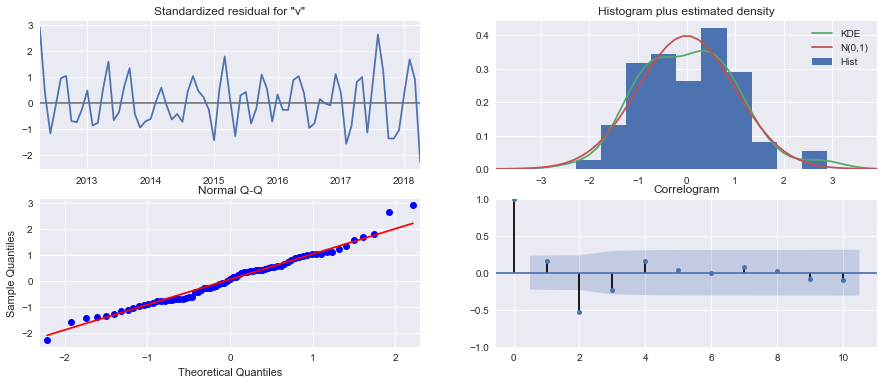

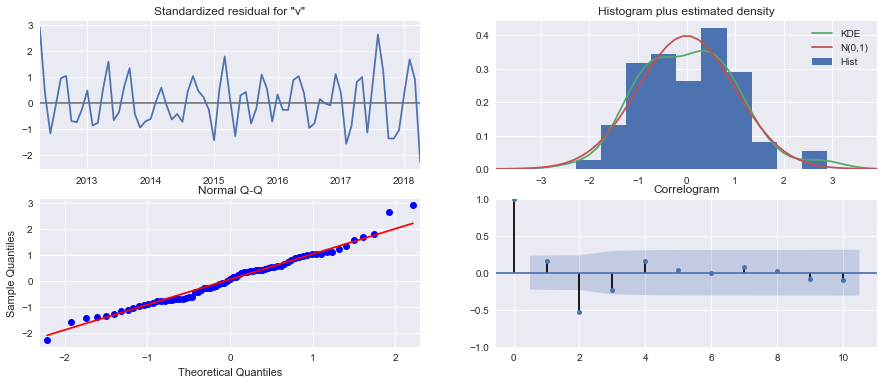

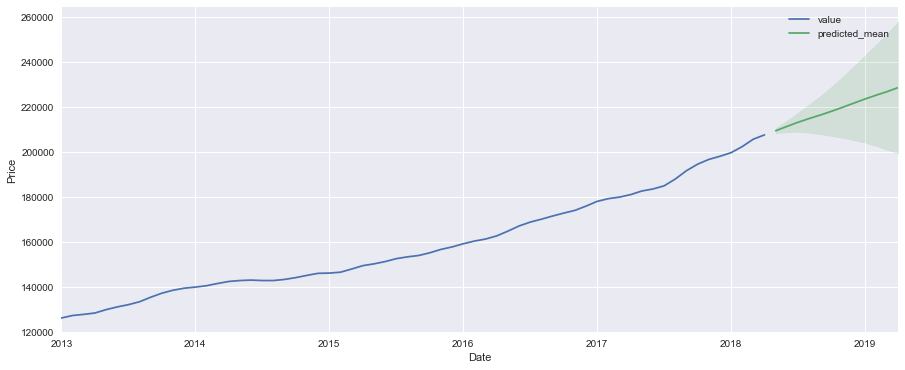

Modeling for zipcode 83336
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1161.245, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1164.506, Time=0.31 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1164.311, Time=0.08 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1163.242, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1163.242, Time=0.05 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1165.198, Time=0.22 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1162.509, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1162.315, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1163.323, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1162.717, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.853 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -579.623
Date:                Fri, 16 Apr 2021   AIC                           1161.245
Time:                        14:07:25   BIC                           1163.627
Sample:                             0   HQIC                          1162.200
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.149e+05   1.88e+04      6.099      0.000     7.8e+04    1.52e+05
===================================================================================
Ljung-Box (L1) (Q):                  10.50   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               2.35   Skew:                            -0.11
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -572.831
Date:                Fri, 16 Apr 2021   AIC                           1147.662
Time:                        14:07:25   BIC                           1150.032
Sample:                    01-01-2011   HQIC                          1148.612
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.162e+05   1.93e+04      6.017      0.000    7.83e+04    1.54e+05
===================================================================================
Ljung-Box (L1) (Q):                  10.16   Jarque-Bera (JB):                 0.20
Prob(Q):                              0.00   Prob(JB):                         0.90
Heteroskedasticity (H):               2.28   Skew:                            -0.10
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -626.571
Date:                Fri, 16 Apr 2021   AIC                           1255.142
Time:                        14:07:25   BIC                           1257.585
Sample:                    01-01-2011   HQIC                          1256.124
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.478e+05   1.92e+04      7.705      0.000     1.1e+05    1.85e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.77   Jarque-Bera (JB):                 4.07
Prob(Q):                              0.01   Prob(JB):                         0.13
Heteroskedasticity (H):               3.61   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

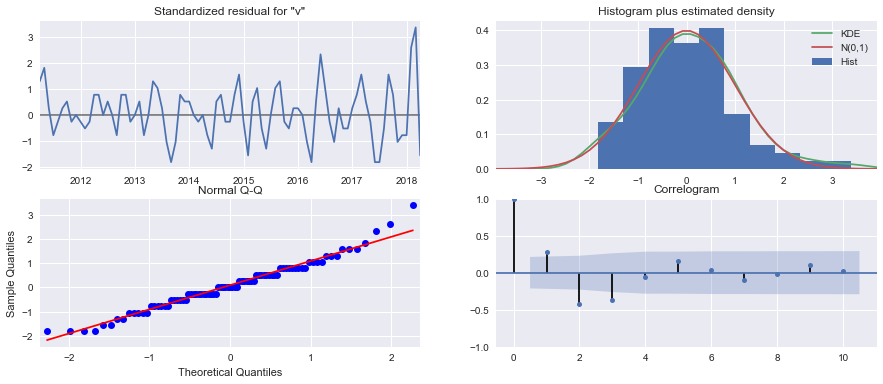

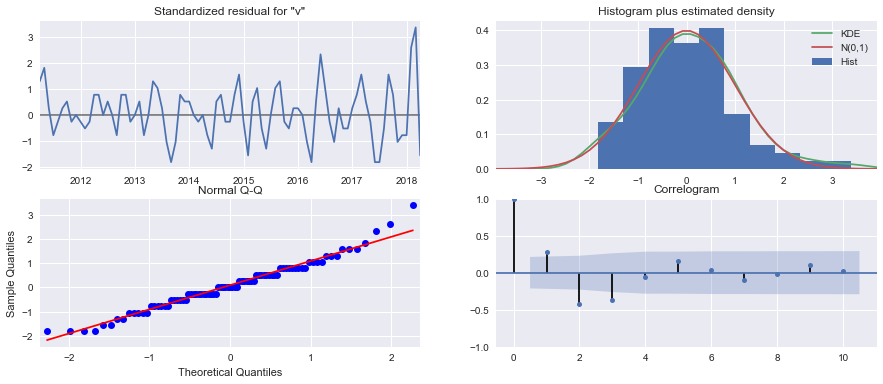

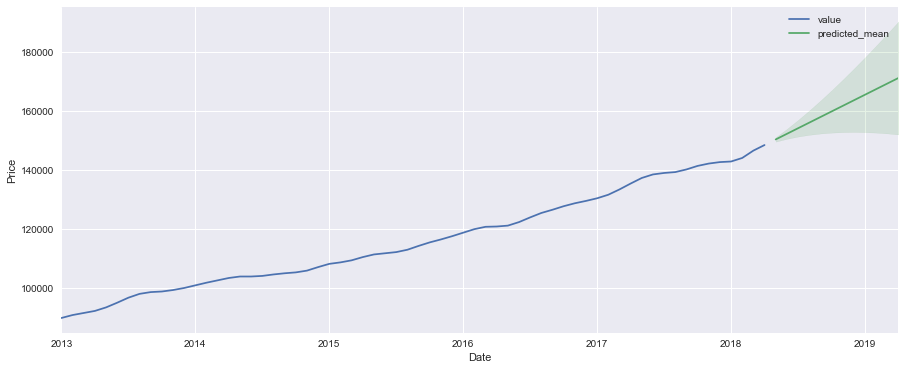

Modeling for zipcode 83706
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1295.899, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1298.909, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1299.507, Time=0.06 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1298.020, Time=0.03 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1297.877, Time=0.10 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1296.936, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1296.843, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1299.169, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1297.351, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.655 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -646.950
Date:                Fri, 16 Apr 2021   AIC                           1295.899
Time:                        14:07:27   BIC                           1298.281
Sample:                             0   HQIC                          1296.854
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.186e+05   5.24e+04     11.802      0.000    5.16e+05    7.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.14   Jarque-Bera (JB):                90.95
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               3.65   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -639.071
Date:                Fri, 16 Apr 2021   AIC                           1280.143
Time:                        14:07:27   BIC                           1282.512
Sample:                    01-01-2011   HQIC                          1281.092
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.219e+05    5.3e+04     11.737      0.000    5.18e+05    7.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.80   Jarque-Bera (JB):                92.12
Prob(Q):                              0.05   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -698.943
Date:                Fri, 16 Apr 2021   AIC                           1399.886
Time:                        14:07:27   BIC                           1402.328
Sample:                    01-01-2011   HQIC                          1400.868
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.119e+05   6.72e+04     12.085      0.000     6.8e+05    9.44e+05
===================================================================================
Ljung-Box (L1) (Q):                  16.12   Jarque-Bera (JB):               105.43
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.20   Skew:                            -1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

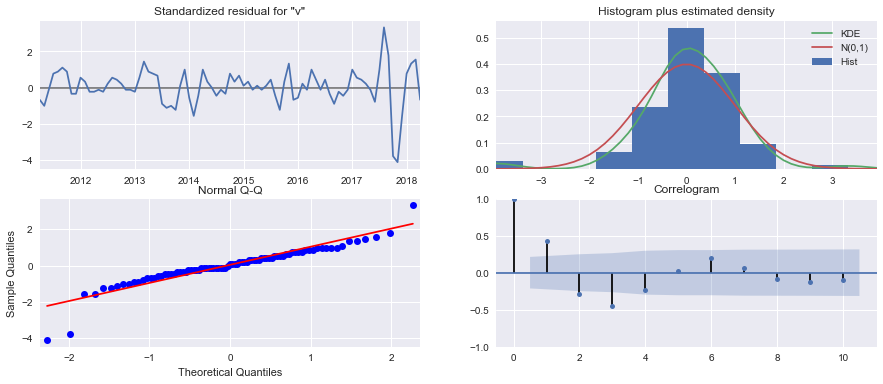

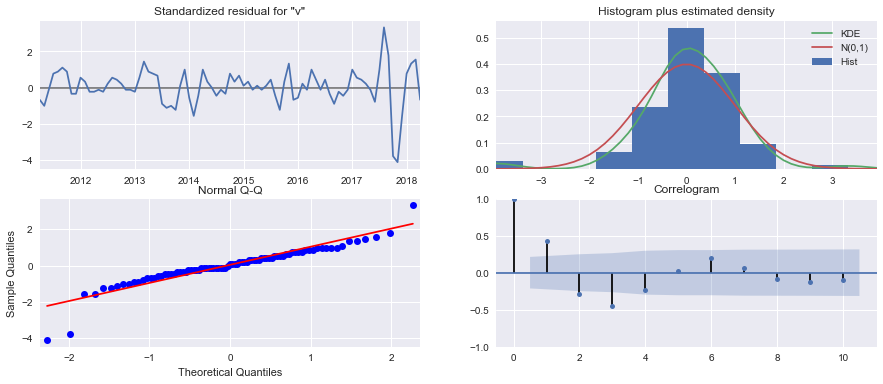

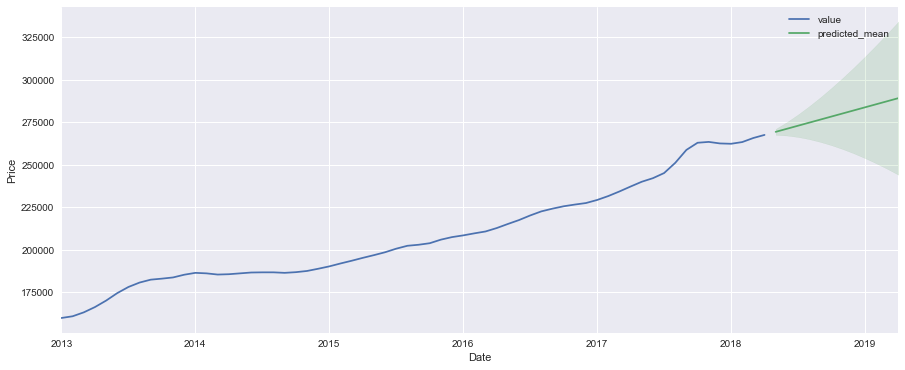

Modeling for zipcode 83655
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1170.668, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1174.129, Time=0.04 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1174.095, Time=0.09 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1172.208, Time=0.02 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1172.128, Time=0.10 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1172.663, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1173.221, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1167.735, Time=0.17 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=1175.788, Time=0.15 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=1175.755, Time=0.14 sec
 ARIMA(1,2,1)(1,0,1)[12]             : AIC=1177.692, Time=0.16 sec
 ARIMA(2,2,1)(0,0,0)[12]             : AIC=1160.302, Time=0.05 sec
 ARIMA(2,2,1)(1,0,0)[12]             : AIC=1161.356, Time=0.10 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -576.151
Date:                Fri, 16 Apr 2021   AIC                           1160.302
Time:                        14:07:31   BIC                           1169.831
Sample:                             0   HQIC                          1164.122
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6003      0.152      3.949      0.000       0.302       0.898
ar.L2         -0.1253      0.060     -2.085      0.037      -0.243      -0.008
ma.L1         -0.6292      0.139     -4.512      0.000      -0.903      -0.356
sigma2      8.868e+04   1.56e+04      5.679      0.000    5.81e+04    1.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 0.06
Prob(Q):                              0.34   Prob(JB):                         0.97
Heteroskedasticity (H):               0.71   Skew:                            -0.06
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -554.731
Date:                Fri, 16 Apr 2021   AIC                           1117.461
Time:                        14:07:31   BIC                           1126.888
Sample:                    01-01-2011   HQIC                          1121.235
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2573      0.165      1.563      0.118      -0.065       0.580
ar.L2         -0.4836      0.089     -5.439      0.000      -0.658      -0.309
ma.L1         -0.0753      0.183     -0.411      0.681      -0.434       0.284
sigma2      8.868e+04   1.76e+04      5.034      0.000    5.42e+04    1.23e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.90
Prob(Q):                              0.75   Prob(JB):                         0.64
Heteroskedasticity (H):               0.82   Skew:                             0.13
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(2, 2, 1)   Log Likelihood                -608.632
Date:                Fri, 16 Apr 2021   AIC                           1225.265
Time:                        14:07:31   BIC                           1234.988
Sample:                    01-01-2011   HQIC                          1229.174
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2696      0.114      2.375      0.018       0.047       0.492
ar.L2         -0.6553      0.088     -7.452      0.000      -0.828      -0.483
ma.L1         -0.0675      0.157     -0.430      0.667      -0.376       0.240
sigma2      1.172e+05   1.96e+04      5.972      0.000    7.87e+04    1.56e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.87   Prob(JB):                         0.70
Heteroskedasticity (H):               1.67   Skew:                             0.22
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

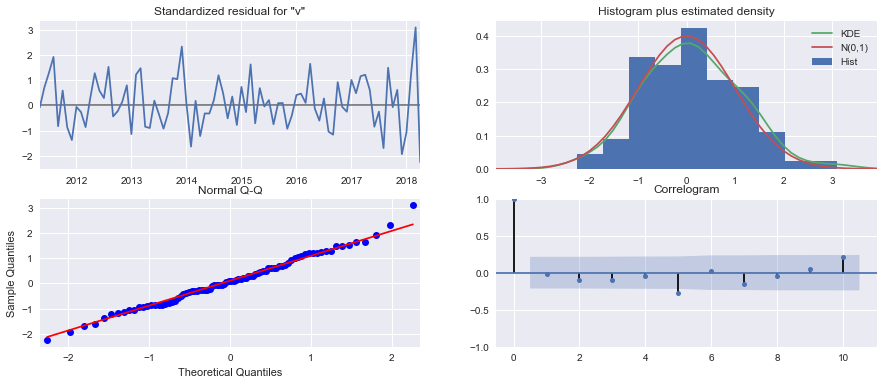

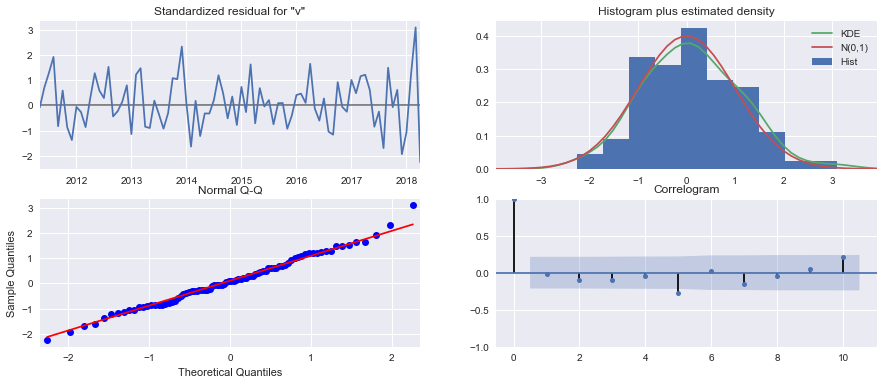

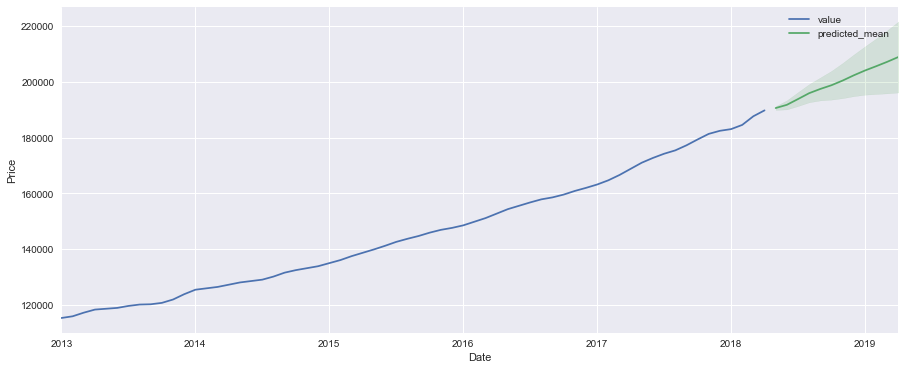

Modeling for zipcode 83835
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1418.727, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1409.729, Time=0.09 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1408.613, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1409.315, Time=0.06 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=1420.381, Time=0.19 sec
 ARIMA(0,2,1)(0,0,2)[12]             : AIC=1419.975, Time=0.08 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=1419.390, Time=0.03 sec
 ARIMA(0,2,1)(1,0,2)[12]             : AIC=1421.450, Time=0.29 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1418.242, Time=0.09 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=1417.336, Time=0.08 sec
 ARIMA(0,2,2)(0,0,1)[12]             : AIC=1407.324, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC=1409.568, Time=0.03 sec
 ARIMA(0,2,2)(1,0,1)[12]             : AIC=1408.210, Time=0.34 sec
 ARIMA(0,2,2)(0,0,2)[12]             : AIC=1407.773, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(3, 2, 2)   Log Likelihood                -668.056
Date:                Fri, 16 Apr 2021   AIC                           1348.112
Time:                        14:07:48   BIC                           1362.404
Sample:                             0   HQIC                          1353.842
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4806      0.051     -9.462      0.000      -0.580      -0.381
ar.L2         -0.7816      0.035    -22.275      0.000      -0.850      -0.713
ar.L3         -0.0207      0.026     -0.800      0.424      -0.072       0.030
ma.L1          0.5195      0.043     11.985      0.000       0.435       0.604
ma.L2          0.7517      0.039     19.091      0.000       0.675       0.829
sigma2      9.237e+05   1.06e-08   8.73e+13      0.000    9.24e+05    9.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.14   Jarque-Bera (JB):                 2.37
Prob(Q):                              0.01   Prob(JB):                         0.31
Heteroskedasticity (H):               0.58   Skew:                            -0.39
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.71e+29. Standard errors may be unstable.
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(3, 2, 2)   Log Likelihood                -637.961
Date:                Fri, 16 Apr 2021   AIC                           1287.923
Time:                        14:07:48   BIC                           1301.986
Sample:                    01-01-2011   HQIC                          1293.548
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5742      0.103     -5.597      0.000      -0.775      -0.373
ar.L2         -0.6711      0.104     -6.461      0.000      -0.875      -0.468
ar.L3         -0.2579      0.042     -6.151      0.000      -0.340      -0.176
ma.L1          0.9341      0.155      6.036      0.000       0.631       1.237
ma.L2          0.2536      0.061      4.163      0.000       0.134       0.373
sigma2      9.237e+05   1.98e+05      4.675      0.000    5.36e+05    1.31e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.35   Prob(JB):                         0.54
Heteroskedasticity (H):               0.47   Skew:                            -0.17
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(3, 2, 2)   Log Likelihood                -685.455
Date:                Fri, 16 Apr 2021   AIC                           1382.910
Time:                        14:07:48   BIC                           1397.423
Sample:                    01-01-2011   HQIC                          1388.741
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5753      0.098     -5.849      0.000      -0.768      -0.382
ar.L2         -0.6640      0.101     -6.578      0.000      -0.862      -0.466
ar.L3         -0.2553      0.040     -6.411      0.000      -0.333      -0.177
ma.L1          0.9401      0.147      6.374      0.000       0.651       1.229
ma.L2          0.2557      0.060      4.280      0.000       0.139       0.373
sigma2      8.977e+05   1.83e+05      4.896      0.000    5.38e+05    1.26e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.81   Jarque-Bera (JB):                 0.91
Prob(Q):                              0.37   Prob(JB):                         0.63
Heteroskedasticity (H):               0.39   Skew:                            -0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

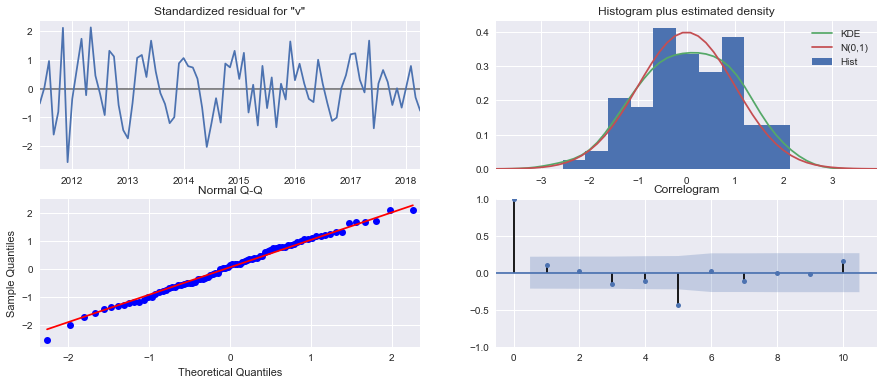

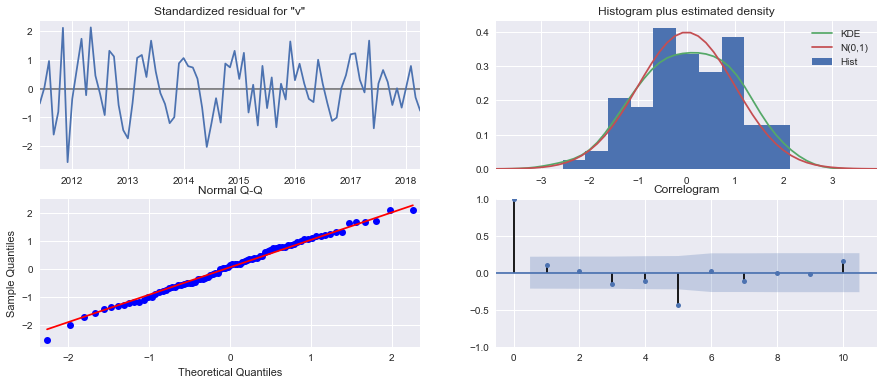

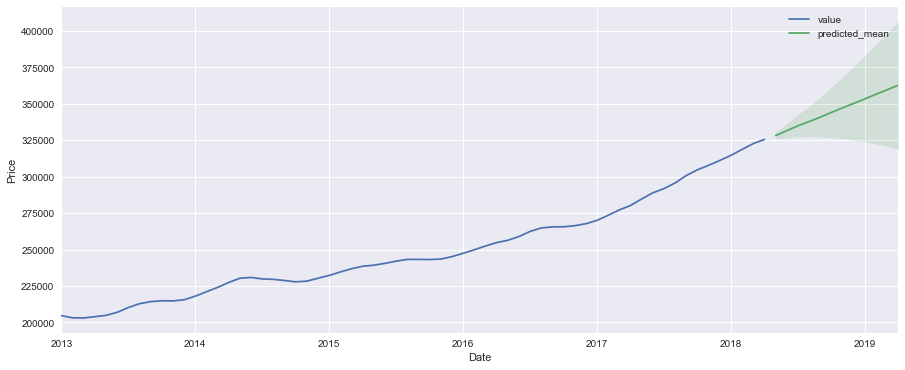

Modeling for zipcode 83687
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1277.121, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1278.888, Time=0.12 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1278.625, Time=0.25 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1277.546, Time=0.10 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1277.463, Time=0.21 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1278.243, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1278.195, Time=0.11 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1279.434, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1278.859, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.463 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -637.561
Date:                Fri, 16 Apr 2021   AIC                           1277.121
Time:                        14:07:52   BIC                           1279.503
Sample:                             0   HQIC                          1278.076
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.892e+05   5.48e+04      8.920      0.000    3.82e+05    5.97e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.51   Jarque-Bera (JB):                14.52
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                            -0.23
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -629.066
Date:                Fri, 16 Apr 2021   AIC                           1260.132
Time:                        14:07:52   BIC                           1262.502
Sample:                    01-01-2011   HQIC                          1261.082
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       4.83e+05   5.36e+04      9.019      0.000    3.78e+05    5.88e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.54   Jarque-Bera (JB):                15.94
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                            -0.21
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -675.308
Date:                Fri, 16 Apr 2021   AIC                           1352.615
Time:                        14:07:52   BIC                           1355.058
Sample:                    01-01-2011   HQIC                          1353.598
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      4.627e+05   4.87e+04      9.505      0.000    3.67e+05    5.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.90   Jarque-Bera (JB):                17.81
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -0.19
Prob(H) (two-sided):                  0.02   Kurtosis:                         5.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

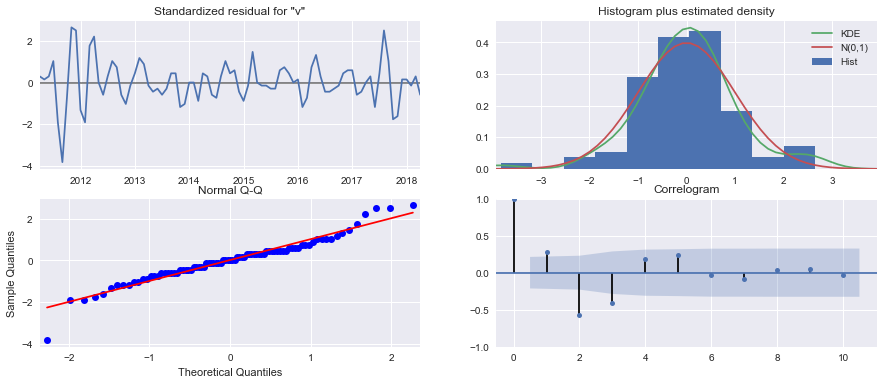

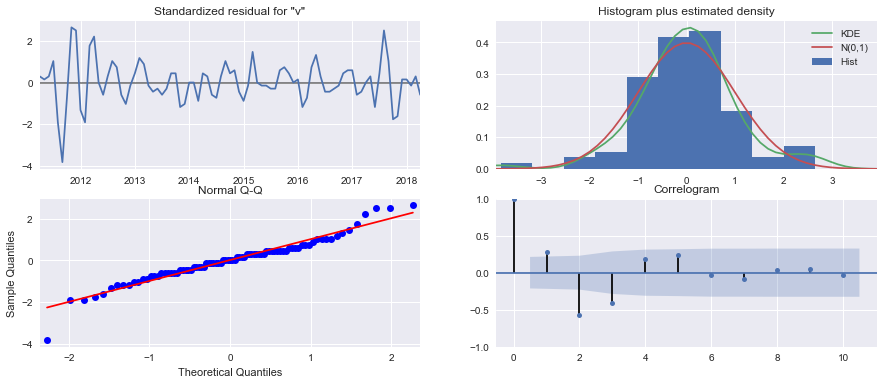

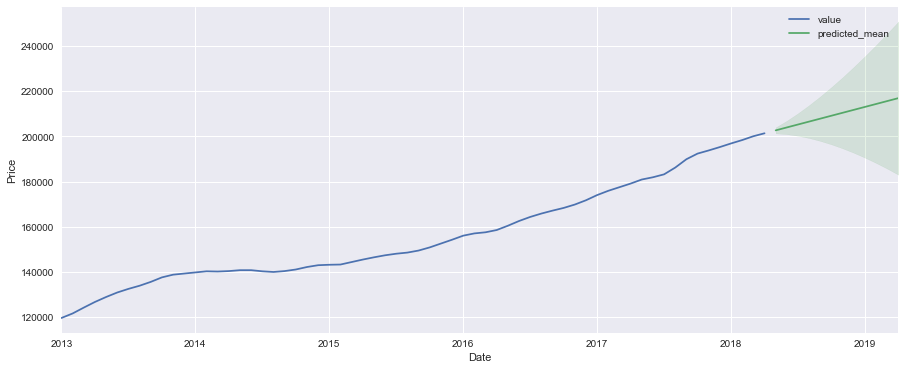

Modeling for zipcode 83714
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1386.086, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1389.976, Time=0.11 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1389.750, Time=0.21 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1388.263, Time=0.10 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1396.214, Time=0.07 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.30 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1388.196, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1387.954, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1390.048, Time=0.09 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1388.078, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.049 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -692.043
Date:                Fri, 16 Apr 2021   AIC                           1386.086
Time:                        14:07:57   BIC                           1388.468
Sample:                             0   HQIC                          1387.041
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       1.91e+06    1.1e+05     17.304      0.000    1.69e+06    2.13e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.31   Jarque-Bera (JB):               563.33
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               9.91   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -683.879
Date:                Fri, 16 Apr 2021   AIC                           1369.758
Time:                        14:07:57   BIC                           1372.128
Sample:                    01-01-2011   HQIC                          1370.708
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.932e+06   1.13e+05     17.099      0.000    1.71e+06    2.15e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.23   Jarque-Bera (JB):               540.47
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               9.88   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -735.628
Date:                Fri, 16 Apr 2021   AIC                           1473.256
Time:                        14:07:57   BIC                           1475.699
Sample:                    01-01-2011   HQIC                          1474.239
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.924e+06   1.12e+05     17.185      0.000     1.7e+06    2.14e+06
===================================================================================
Ljung-Box (L1) (Q):                   8.32   Jarque-Bera (JB):               505.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.81   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

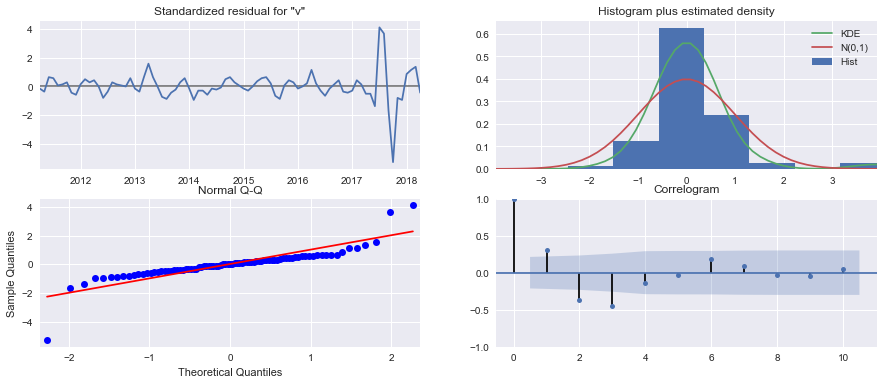

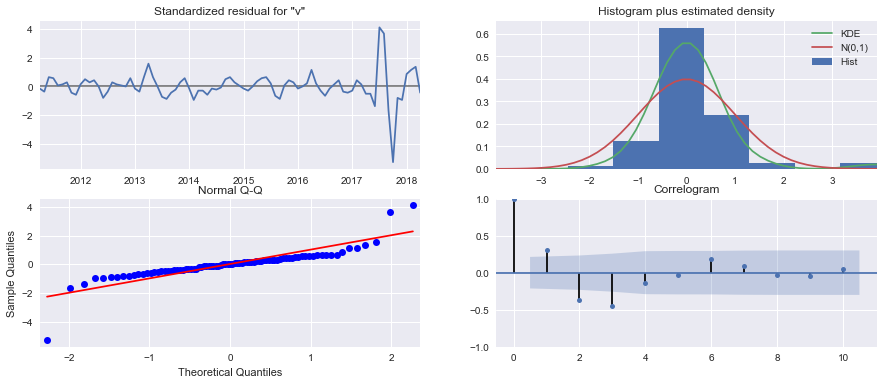

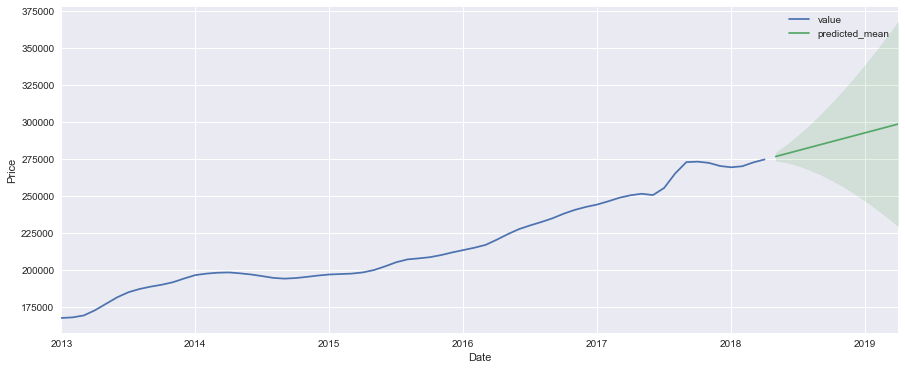

Modeling for zipcode 83709
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1355.980, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1358.694, Time=0.17 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1358.683, Time=0.11 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1357.533, Time=0.07 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1365.656, Time=0.08 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1365.975, Time=0.27 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1357.509, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1357.473, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1359.171, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1357.812, Time=0.02 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.014 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -676.990
Date:                Fri, 16 Apr 2021   AIC                           1355.980
Time:                        14:08:01   BIC                           1358.362
Sample:                             0   HQIC                          1356.935
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.311e+06   6.35e+04     20.642      0.000    1.19e+06    1.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.99   Jarque-Bera (JB):              1357.54
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               9.96   Skew:                            -2.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -668.889
Date:                Fri, 16 Apr 2021   AIC                           1339.778
Time:                        14:08:01   BIC                           1342.147
Sample:                    01-01-2011   HQIC                          1340.727
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.322e+06   6.46e+04     20.462      0.000     1.2e+06    1.45e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.06   Jarque-Bera (JB):              1336.48
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):              10.33   Skew:                            -2.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -728.876
Date:                Fri, 16 Apr 2021   AIC                           1459.752
Time:                        14:08:01   BIC                           1462.194
Sample:                    01-01-2011   HQIC                          1460.734
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.642e+06   9.28e+04     17.689      0.000    1.46e+06    1.82e+06
===================================================================================
Ljung-Box (L1) (Q):                  16.09   Jarque-Bera (JB):               641.05
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.58   Skew:                            -1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

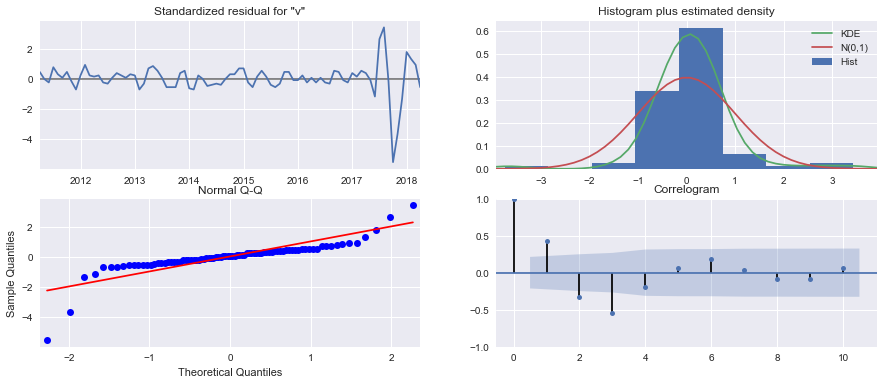

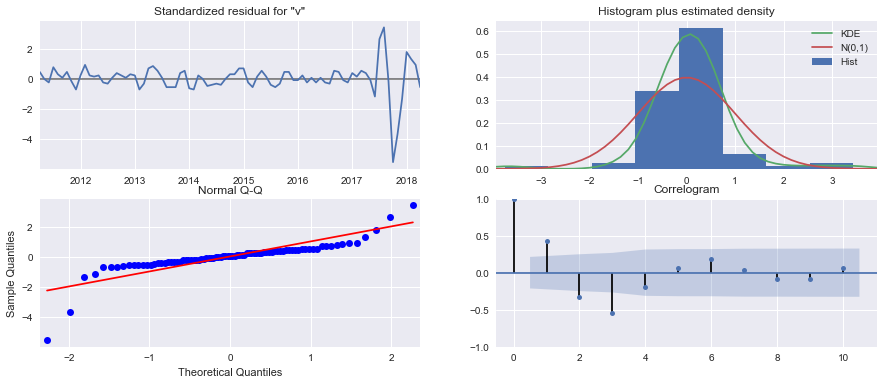

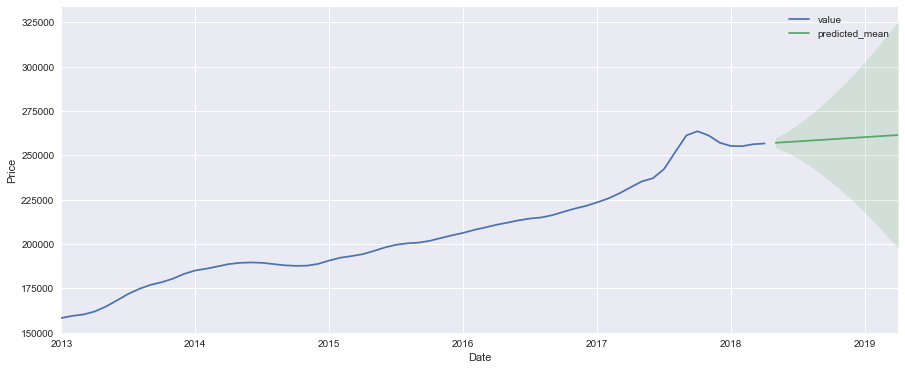

Modeling for zipcode 83704
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1295.494, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1299.508, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1300.254, Time=0.04 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1297.423, Time=0.15 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1304.127, Time=0.07 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1300.859, Time=0.31 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1297.605, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1297.214, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1300.299, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1296.964, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 1.087 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -646.747
Date:                Fri, 16 Apr 2021   AIC                           1295.494
Time:                        14:08:05   BIC                           1297.876
Sample:                             0   HQIC                          1296.449
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.155e+05   4.13e+04     14.894      0.000    5.34e+05    6.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.35   Jarque-Bera (JB):               279.00
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               7.45   Skew:                             1.29
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -639.152
Date:                Fri, 16 Apr 2021   AIC                           1280.303
Time:                        14:08:05   BIC                           1282.673
Sample:                    01-01-2011   HQIC                          1281.252
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.229e+05   4.23e+04     14.709      0.000     5.4e+05    7.06e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.17   Jarque-Bera (JB):               266.55
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               7.46   Skew:                             1.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -693.227
Date:                Fri, 16 Apr 2021   AIC                           1388.454
Time:                        14:08:05   BIC                           1390.897
Sample:                    01-01-2011   HQIC                          1389.437
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.096e+05   5.26e+04     13.484      0.000    6.06e+05    8.13e+05
===================================================================================
Ljung-Box (L1) (Q):                   4.27   Jarque-Bera (JB):               154.72
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               8.97   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

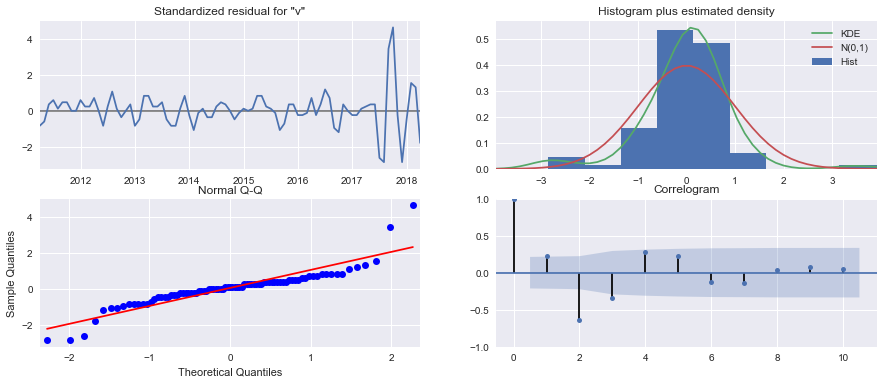

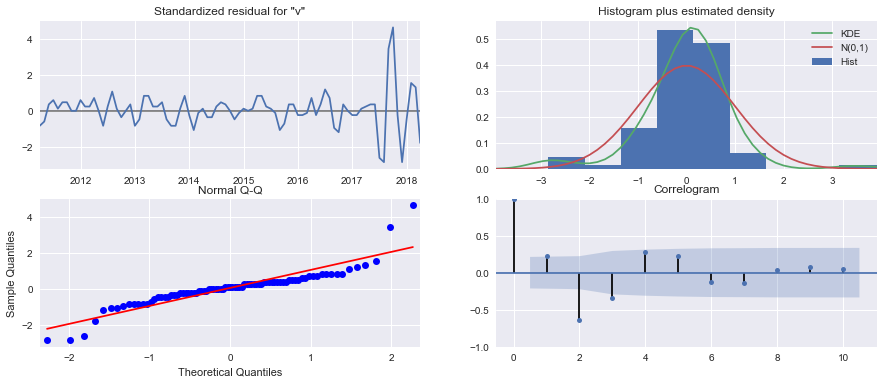

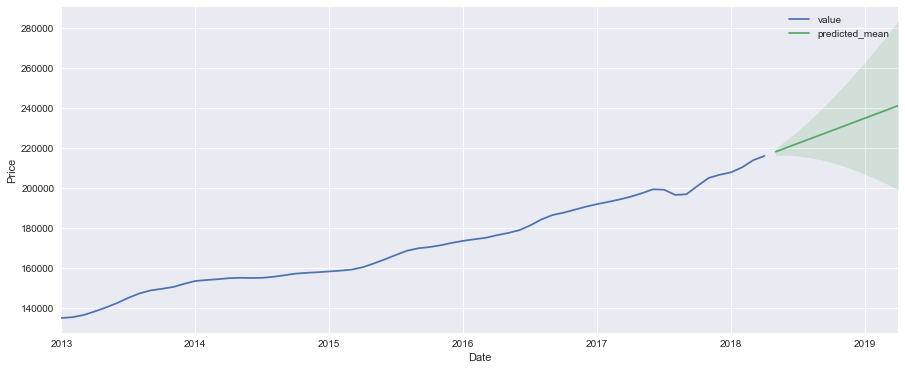

Modeling for zipcode 83815
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1390.825, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1383.629, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1393.061, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1383.656, Time=0.03 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=1383.333, Time=0.66 sec
 ARIMA(1,2,0)(3,0,0)[12]             : AIC=1385.195, Time=0.79 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=1385.184, Time=0.64 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=1383.654, Time=0.40 sec
 ARIMA(1,2,0)(3,0,1)[12]             : AIC=1387.197, Time=0.52 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=1390.687, Time=0.40 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=1366.824, Time=0.60 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=1375.600, Time=0.11 sec
 ARIMA(2,2,0)(3,0,0)[12]             : AIC=1374.827, Time=0.44 sec
 ARIMA(2,2,0)(2,0,1)[12]             : AIC=1368.584, Time=1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   82
Model:             SARIMAX(4, 2, 0)x(2, 0, 0, 12)   Log Likelihood                -661.705
Date:                            Fri, 16 Apr 2021   AIC                           1337.409
Time:                                    14:08:26   BIC                           1354.083
Sample:                                         0   HQIC                          1344.094
                                             - 82                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0256      0.087      0.294      0.768      -0.145       0.196
ar.L2         -0.0836      0.027     -3.122      0.002      -0.136      -0.031
ar.L3         -0.0463      0.052     -0.894      0.371      -0.148       0.055
ar.L4          0.0550      0.055      0.996      0.319      -0.053       0.163
ar.S.L12      -0.0199      0.011     -1.769      0.077      -0.042       0.002
ar.S.L24      -0.0246      0.013     -1.851      0.064      -0.051       0.001
sigma2      7.139e+05   1.07e+05      6.655      0.000    5.04e+05    9.24e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.66   Prob(JB):                         0.63
Heteroskedasticity (H):               0.28   Skew:                             0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   82
Model:             SARIMAX(4, 2, 0)x(2, 0, 0, 12)   Log Likelihood                -401.873
Date:                            Fri, 16 Apr 2021   AIC                            817.747
Time:                                    14:08:27   BIC                            831.406
Sample:                                01-01-2011   HQIC                           822.983
                                     - 10-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4129      0.199      2.078      0.038       0.023       0.802
ar.L2         -0.4641      0.288     -1.613      0.107      -1.028       0.100
ar.L3         -0.0728      0.203     -0.358      0.720      -0.471       0.326
ar.L4         -0.0735      0.234     -0.315      0.753      -0.531       0.384
ar.S.L12      -0.0340      0.130     -0.263      0.793      -0.288       0.220
ar.S.L24      -0.0291      0.093     -0.314      0.754      -0.211       0.153
sigma2      3.022e+05   6.02e+04      5.023      0.000    1.84e+05     4.2e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                 3.21
Prob(Q):                              0.70   Prob(JB):                         0.20
Heteroskedasticity (H):               1.69   Skew:                            -0.51
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              value   No. Observations:                   88
Model:             SARIMAX(4, 2, 0)x(2, 0, 0, 12)   Log Likelihood                -453.374
Date:                            Fri, 16 Apr 2021   AIC                            920.747
Time:                                    14:08:28   BIC                            935.170
Sample:                                01-01-2011   HQIC                           926.365
                                     - 04-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4374      0.167      2.612      0.009       0.109       0.766
ar.L2         -0.5211      0.255     -2.044      0.041      -1.021      -0.021
ar.L3         -0.0568      0.144     -0.395      0.693      -0.338       0.225
ar.L4         -0.0597      0.158     -0.379      0.705      -0.369       0.249
ar.S.L12       0.0151      0.141      0.107      0.915      -0.262       0.292
ar.S.L24      -0.0357      0.105     -0.341      0.733      -0.241       0.170
sigma2      3.607e+05   6.82e+04      5.287      0.000    2.27e+05    4.94e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.96
Prob(Q):                              0.77   Prob(JB):                         0.38
Heteroskedasticity (H):               1.89   Skew:                            -0.39
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

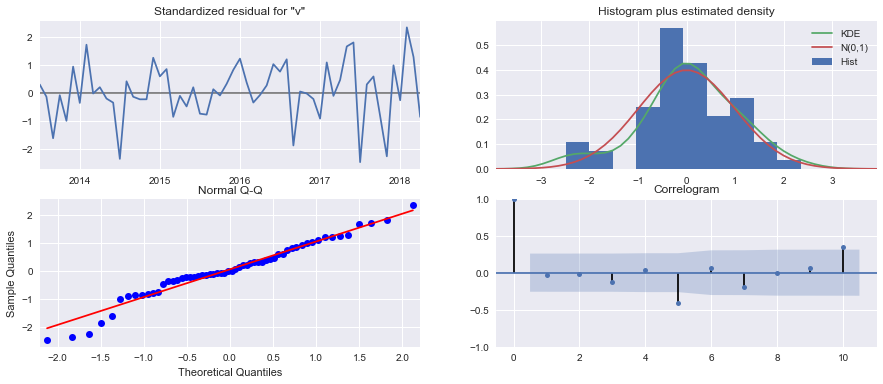

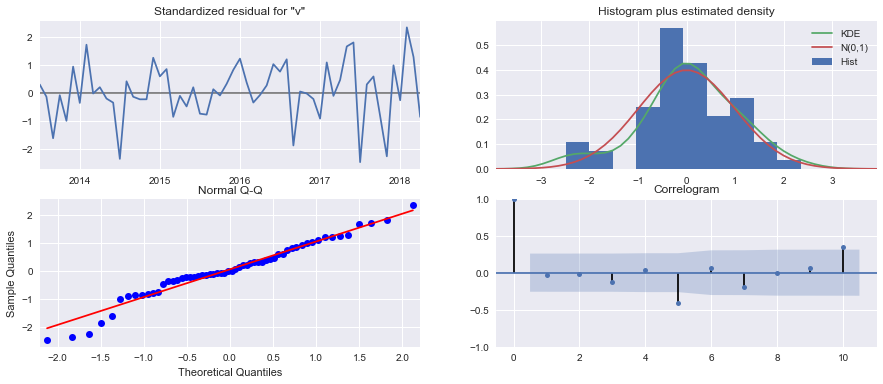

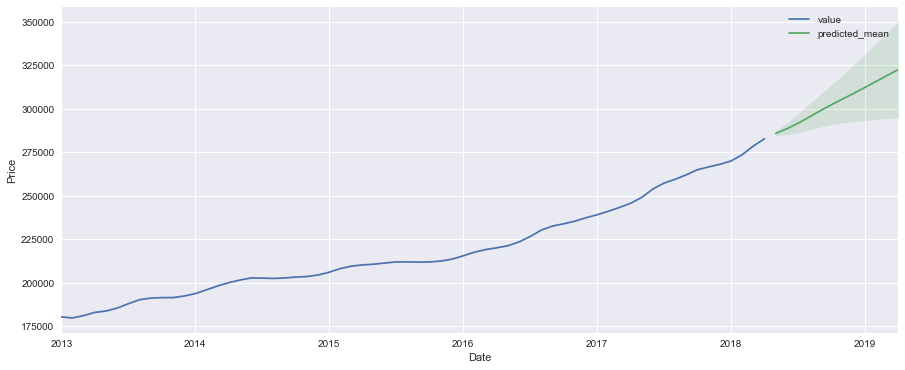

Modeling for zipcode 83686
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1263.162, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1264.478, Time=0.22 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1264.928, Time=0.12 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1263.240, Time=0.09 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1263.143, Time=0.13 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1264.050, Time=0.52 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=1263.964, Time=0.31 sec
 ARIMA(0,2,0)(1,0,2)[12]             : AIC=inf, Time=0.55 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=1264.490, Time=0.07 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=1265.024, Time=0.24 sec
 ARIMA(0,2,0)(0,0,1)[12] intercept   : AIC=1264.828, Time=0.10 sec

Best model:  ARIMA(0,2,0)(0,0,1)[12]          
Total fit time: 2.415 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   82
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -629.571
Date:                              Fri, 16 Apr 2021   AIC                           1263.143
Time:                                      14:08:34   BIC                           1267.907
Sample:                                           0   HQIC                          1265.053
                                               - 82                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.0318      0.027      1.182      0.237      -0.021       0.084
sigma2      3.973e+05   4.42e+04      8.985      0.000    3.11e+05    4.84e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.61   Jarque-Bera (JB):                14.80
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.22   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   82
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -505.115
Date:                              Fri, 16 Apr 2021   AIC                           1014.230
Time:                                      14:08:34   BIC                           1018.639
Sample:                                  01-01-2011   HQIC                          1015.974
                                       - 10-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.1466      0.122     -1.205      0.228      -0.385       0.092
sigma2      2.098e+05   3.09e+04      6.793      0.000    1.49e+05     2.7e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.50   Jarque-Bera (JB):                 6.17
Prob(Q):                              0.11   Prob(JB):                         0.05
Heteroskedasticity (H):               0.63   Skew:                             0.67
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   88
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -553.061
Date:                              Fri, 16 Apr 2021   AIC                           1110.122
Time:                                      14:08:34   BIC                           1114.703
Sample:                                  01-01-2011   HQIC                          1111.947
                                       - 04-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.1765      0.140     -1.260      0.208      -0.451       0.098
sigma2      2.253e+05   3.28e+04      6.876      0.000    1.61e+05     2.9e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.61   Jarque-Bera (JB):                 3.07
Prob(Q):                              0.06   Prob(JB):                         0.22
Heteroskedasticity (H):               0.92   Skew:                             0.39
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

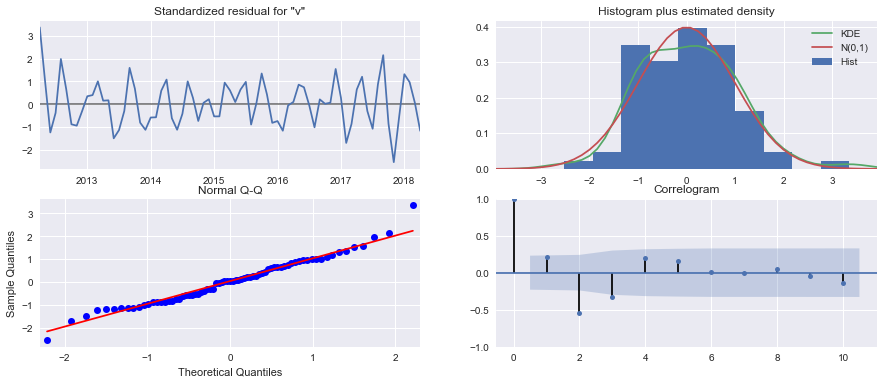

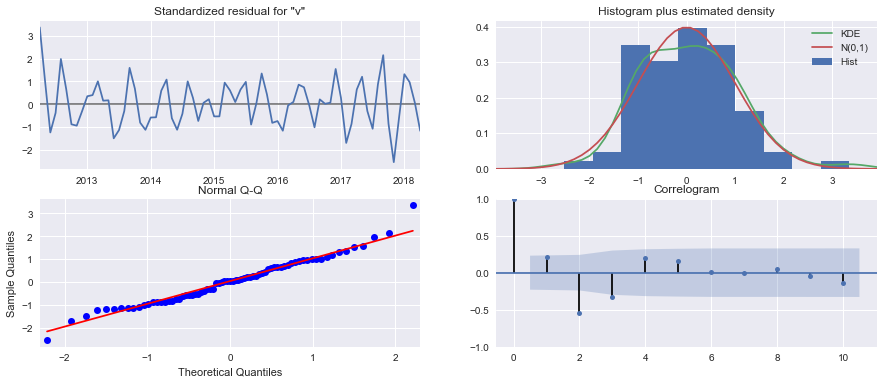

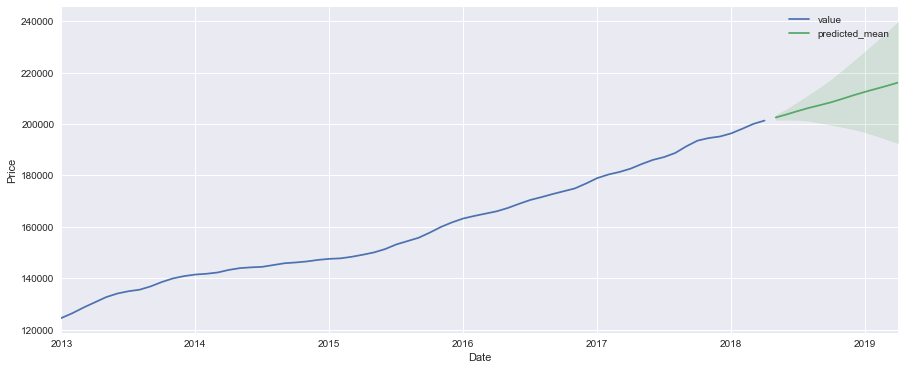

Modeling for zipcode 83660
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1322.112, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1326.539, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1326.823, Time=0.04 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1323.994, Time=0.05 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1325.235, Time=0.03 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.18 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1324.095, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1324.094, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1326.931, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1323.902, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.531 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -660.056
Date:                Fri, 16 Apr 2021   AIC                           1322.112
Time:                        14:08:36   BIC                           1324.494
Sample:                             0   HQIC                          1323.067
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.586e+05   1.38e+05      6.233      0.000    5.89e+05    1.13e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.95   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.00   Prob(JB):                         0.87
Heteroskedasticity (H):               0.80   Skew:                            -0.15
Prob(H) (two-sided):                  0.56   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -652.210
Date:                Fri, 16 Apr 2021   AIC                           1306.420
Time:                        14:08:36   BIC                           1308.790
Sample:                    01-01-2011   HQIC                          1307.370
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       8.67e+05   1.41e+05      6.160      0.000    5.91e+05    1.14e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.70   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.00   Prob(JB):                         0.89
Heteroskedasticity (H):               0.77   Skew:                            -0.13
Prob(H) (two-sided):                  0.50   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -699.826
Date:                Fri, 16 Apr 2021   AIC                           1401.652
Time:                        14:08:37   BIC                           1404.094
Sample:                    01-01-2011   HQIC                          1402.634
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      8.288e+05   1.27e+05      6.507      0.000    5.79e+05    1.08e+06
===================================================================================
Ljung-Box (L1) (Q):                   9.51   Jarque-Bera (JB):                 0.17
Prob(Q):                              0.00   Prob(JB):                         0.92
Heteroskedasticity (H):               0.62   Skew:                            -0.11
Prob(H) (two-sided):                  0.21   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

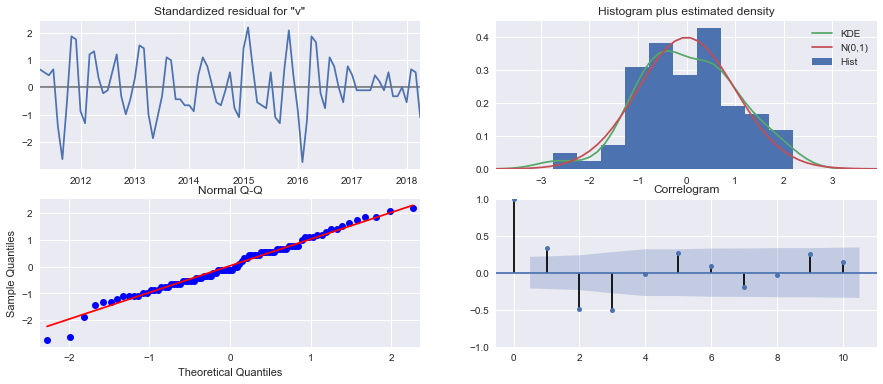

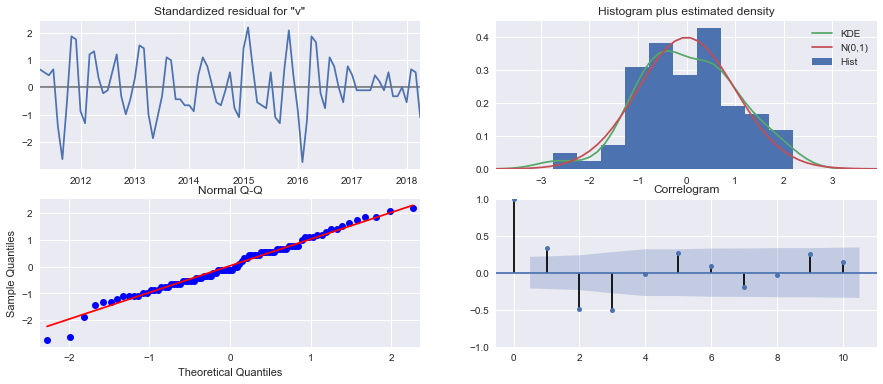

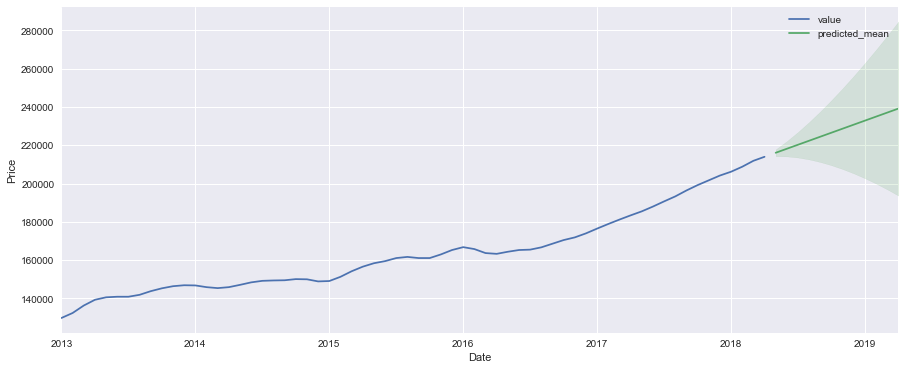

Modeling for zipcode 83276
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1155.477, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1158.409, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1158.488, Time=0.05 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1156.553, Time=0.04 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1156.624, Time=0.06 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1156.097, Time=0.20 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1157.363, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1157.166, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=1158.215, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[12] intercept   : AIC=1157.008, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[12]          
Total fit time: 0.565 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -576.738
Date:                Fri, 16 Apr 2021   AIC                           1155.477
Time:                        14:08:39   BIC                           1157.859
Sample:                             0   HQIC                          1156.432
                                 - 82                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.069e+05   1.77e+04      6.043      0.000    7.23e+04    1.42e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.33   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.01   Prob(JB):                         0.95
Heteroskedasticity (H):               1.25   Skew:                            -0.01
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   82
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -569.980
Date:                Fri, 16 Apr 2021   AIC                           1141.960
Time:                        14:08:39   BIC                           1144.329
Sample:                    01-01-2011   HQIC                          1142.909
                         - 10-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.081e+05   1.81e+04      5.962      0.000    7.26e+04    1.44e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.11   Jarque-Bera (JB):                 0.14
Prob(Q):                              0.01   Prob(JB):                         0.93
Heteroskedasticity (H):               1.24   Skew:                             0.00
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -614.186
Date:                Fri, 16 Apr 2021   AIC                           1230.373
Time:                        14:08:39   BIC                           1232.816
Sample:                    01-01-2011   HQIC                          1231.355
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.105e+05   1.84e+04      6.018      0.000    7.45e+04    1.46e+05
===================================================================================
Ljung-Box (L1) (Q):                   6.75   Jarque-Bera (JB):                 0.32
Prob(Q):                              0.01   Prob(JB):                         0.85
Heteroskedasticity (H):               1.28   Skew:                             0.00
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

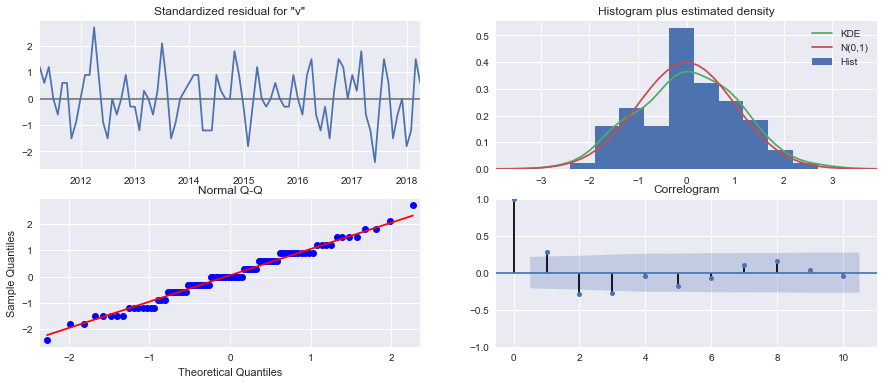

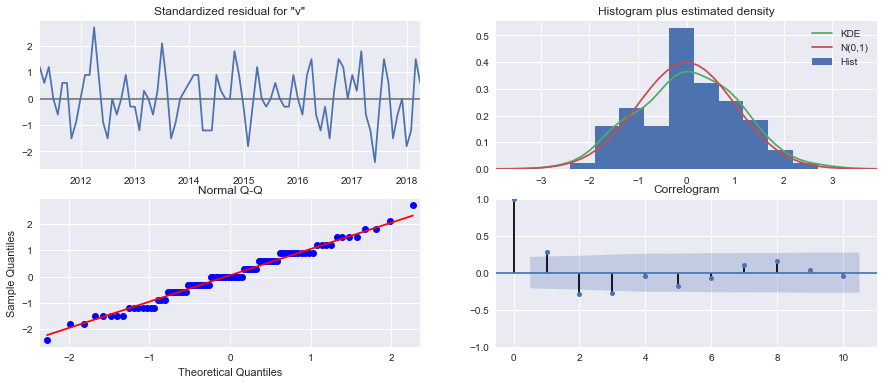

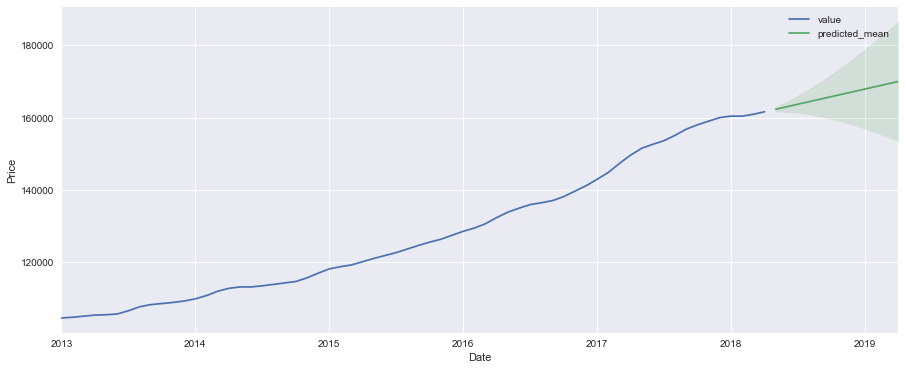

Modeling for zipcode 83858
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1402.073, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1393.605, Time=0.07 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1403.299, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=1393.367, Time=0.01 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=1393.567, Time=0.05 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=1394.086, Time=0.13 sec
 ARIMA(2,2,0)(0,0,0)[12]             : AIC=1383.046, Time=0.03 sec
 ARIMA(2,2,0)(1,0,0)[12]             : AIC=1382.772, Time=0.04 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=1383.089, Time=0.09 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=1382.196, Time=0.19 sec
 ARIMA(2,2,0)(0,0,1)[12]             : AIC=1382.707, Time=0.04 sec
 ARIMA(2,2,0)(2,0,1)[12]             : AIC=1384.087, Time=0.47 sec
 ARIMA(2,2,0)(1,0,2)[12]             : AIC=1384.087, Time=0.32 sec
 ARIMA(2,2,0)(0,0,2)[12]             : AIC=1382.996, Time=0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   82
Model:             SARIMAX(4, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -670.214
Date:                              Fri, 16 Apr 2021   AIC                           1354.427
Time:                                      14:08:51   BIC                           1371.101
Sample:                                           0   HQIC                          1361.112
                                               - 82                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0248      0.072      0.347      0.729      -0.116       0.165
ar.L2         -0.0764      0.039     -1.966      0.049      -0.153      -0.000
ar.L3         -0.0405      0.052     -0.779      0.436      -0.142       0.061
ar.L4          0.0462      0.049      0.937      0.349      -0.051       0.143
ar.S.L12       0.6631      0.400      1.658      0.097      -0.121       1.447
ma.S.L12      -0.6827      0.396     -1.723      0.085      -1.460       0.094
sigma2      9.201e+05   1.25e+05      7.363      0.000    6.75e+05    1.17e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.66   Jarque-Bera (JB):                 1.88
Prob(Q):                              0.20   Prob(JB):                         0.39
Heteroskedasticity (H):               0.53   Skew:                            -0.18
Prob(H) (two-sided):                  0.10   Kurtosis:                         3.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   82
Model:             SARIMAX(4, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -513.261
Date:                              Fri, 16 Apr 2021   AIC                           1040.522
Time:                                      14:08:52   BIC                           1055.635
Sample:                                  01-01-2011   HQIC                          1046.476
                                       - 10-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6663      0.133      5.020      0.000       0.406       0.926
ar.L2         -0.6834      0.148     -4.617      0.000      -0.974      -0.393
ar.L3          0.1922      0.152      1.260      0.208      -0.107       0.491
ar.L4         -0.0142      0.120     -0.119      0.905      -0.249       0.220
ar.S.L12      -0.1919      0.101     -1.895      0.058      -0.391       0.007
ma.S.L12       0.4214      0.227      1.854      0.064      -0.024       0.867
sigma2      5.217e+05   1.04e+05      5.030      0.000    3.18e+05    7.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.47
Prob(Q):                              0.99   Prob(JB):                         0.79
Heteroskedasticity (H):               1.48   Skew:                            -0.19
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                   88
Model:             SARIMAX(4, 2, 0)x(1, 0, [1], 12)   Log Likelihood                -566.499
Date:                              Fri, 16 Apr 2021   AIC                           1146.998
Time:                                      14:08:52   BIC                           1162.737
Sample:                                  01-01-2011   HQIC                          1153.250
                                       - 04-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6554      0.107      6.131      0.000       0.446       0.865
ar.L2         -0.8841      0.134     -6.603      0.000      -1.146      -0.622
ar.L3          0.4632      0.125      3.707      0.000       0.218       0.708
ar.L4         -0.3828      0.117     -3.274      0.001      -0.612      -0.154
ar.S.L12       0.2353      0.136      1.737      0.082      -0.030       0.501
ma.S.L12       0.0970      0.157      0.617      0.537      -0.211       0.405
sigma2      6.149e+05   1.12e+05      5.471      0.000    3.95e+05    8.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.72   Prob(JB):                         0.98
Heteroskedasticity (H):               1.78   Skew:                            -0.02
Prob(H) (two-sided):                  0.18   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

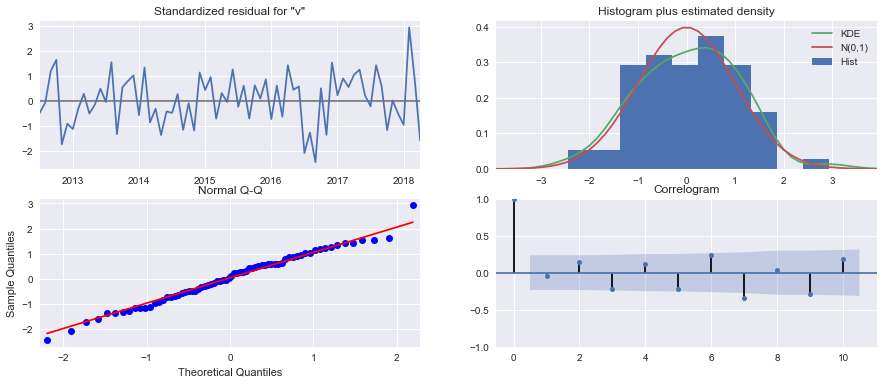

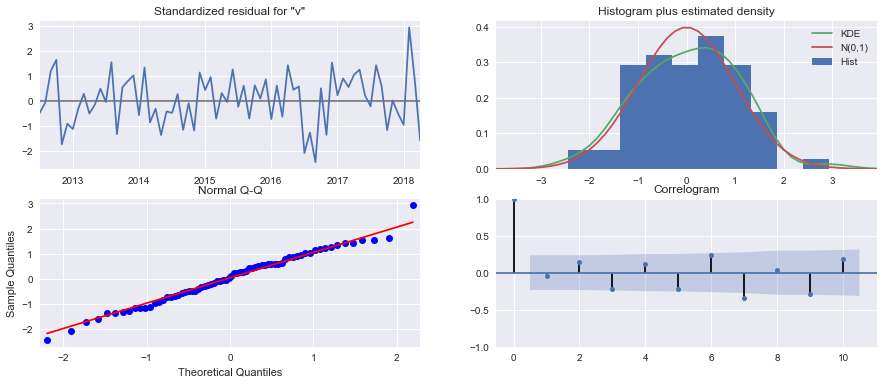

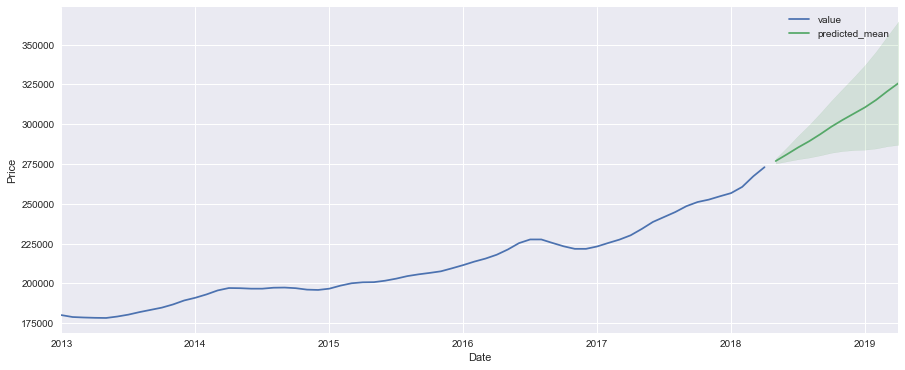

In [404]:
# Looping through the zipcodes in the dictionary and finding the best model and finding
# the one year prediction

i = 0
for k,v in Idaho_25_short_dict.items():
    
    print('Modeling for zipcode {}'.format(k))
    if i==0:
        results = autobot(v)
        results.append(k)
        results_df=pd.DataFrame(pd.Series(results))
        results_df=results_df.T
        results_df.columns=['order','seasonal_order','train_mse','train_dyn_mse',
                        'train_forecast_mse','final_mse','final_dyn_mse', 'final_dyn_rmse',
                        'last_known_price','1_year_forecast','zip']
        i+=1
        
    elif i>0:
        results = autobot(v)
        results.append(k)
        results_df = results_df.append(pd.Series(results, index=results_df.columns), ignore_index=True)
        i+=1
        
results_df.set_index('zip', inplace=True)

In [405]:
# Creating a new column in df for the 1_year_future_ROI
results_df['1_year_future_ROI'] = (
    results_df['1_year_forecast'] - results_df['last_known_price']) / results_df['last_known_price']

In [406]:
# Getting the 5 best future ROI's
results_df.sort_values(by='1_year_future_ROI', ascending=False, inplace=True)
top_5_zipcodes = results_df.index[0:5]
top_5_zipcodes

Index(['83845', '83347', '83350', '83858', '83605'], dtype='object', name='zip')

In [407]:
# Looks like 4 models have weird data (83660, 83651, 83801, 83815)
# The models that had some weird outputs 83709
# Need to take a closer look at these models
results_df

order seasonal_order    train_mse train_dyn_mse train_forecast_mse    final_mse final_dyn_mse final_dyn_rmse last_known_price 1_year_forecast 1_year_future_ROI
zip                                                                                                                                                                       
83845  (0, 2, 0)  (0, 0, 0, 12)  3.78538e+06   2.77442e+08        1.59527e+08  4.63857e+06   6.72966e+08        25941.6           232000          294400          0.268966
83347  (0, 2, 0)  (0, 0, 0, 12)       510769     7.958e+07         1.2295e+07  3.35429e+06   1.05701e+08        10281.1           162200          195800          0.207152
83350  (0, 2, 0)  (0, 0, 0, 12)      82307.7   4.48169e+07             728333       324286        650000        806.226           138200          165800          0.199711
83858  (4, 2, 0)  (1, 0, 1, 12)       645798   5.80807e+08        1.29773e+07    1.258e+06   1.62194e+07        4027.33           273000          325746           0.19321
83605  (0, 2, 0)  (0, 0, 0, 12)       116154      8.68e+06           2.18e+06       265714   1.94686e+07        4412.32           166800          195600          0.172662
83703  (0, 2, 0)  (0, 0, 0, 12)     4.22e+06   1.77058e+08        5.96117e+07  4.94286e+06   8.17039e+08        28583.9           264200          307400          0.163512
83336  (0, 2, 0)  (0, 0, 0, 12)       159231   1.06154e+06        1.80667e+06       497143        905714         951.69           148500          171300          0.153535
83651  (0, 2, 0)  (0, 0, 1, 12)       190797   1.99172e+06        2.73416e+06       202949   1.44197e+07        3797.32           175400          200165           0.14119
83815  (4, 2, 0)  (2, 0, 0, 12)       432861   1.45456e+07        5.88316e+06       766088   1.41961e+07        3767.77           282700          322470           0.14068
83702  (0, 2, 0)  (0, 0, 0, 12)  9.30231e+06   2.81027e+08        1.07638e+09    3.037e+07    4.0173e+09        63382.1           441000          501000          0.136054
83676  (0, 2, 0)  (0, 0, 0, 12)  1.63308e+06   3.81585e+07        1.79833e+06  1.52857e+06   7.24143e+06        2690.99           229400          258200          0.125545
83660  (0, 2, 0)  (0, 0, 0, 12)       114615   7.44615e+06        1.77667e+06       291429   6.56286e+06        2561.81           214000          239200          0.117757
83704  (0, 2, 0)  (0, 0, 0, 12)     2.74e+06      7.21e+07          4.457e+07     3.76e+06   1.31246e+08        11456.3           215900          241100          0.116721
83835  (3, 2, 2)  (0, 0, 0, 12)       676508   9.36803e+07        1.14625e+06       264649   1.03189e+07         3212.3           325600          362813          0.114292
83801  (4, 2, 0)  (2, 0, 0, 12)       430732   1.94932e+08        1.52463e+07  2.18263e+06   1.27041e+07        3564.29           369400          410834          0.112166
83607  (0, 2, 0)  (0, 0, 1, 12)       493109   3.58257e+06        1.04941e+07       678634   4.22316e+07        6498.58           207600          228611          0.101207
83655  (2, 2, 1)  (0, 0, 0, 12)      94350.3   3.06042e+07        1.20837e+06       358248        688290        829.632           189700          208791          0.100638
83814  (4, 2, 0)  (1, 0, 1, 12)  1.48971e+06   2.58593e+07             223454       291583    1.1164e+07        3341.26           316900          347509         0.0965895
83705  (0, 2, 0)  (0, 0, 0, 12)  1.19154e+06   5.33723e+07        2.62292e+08  4.28571e+06   6.59496e+08        25680.6           211800          232200         0.0963173
83714  (0, 2, 0)  (0, 0, 0, 12)  9.47692e+06   1.47154e+07        9.68833e+06  9.16571e+06   1.21406e+09        34843.3           274900          298900         0.0873045
83706  (0, 2, 0)  (0, 0, 0, 12)  1.99231e+06     5.344e+07        2.14988e+08  4.49429e+06   8.25419e+08        28730.1           267500          289100         0.0807477
83687  (0, 2, 0)  (0, 0, 0, 12)       481538   1.53908e+07        1.49433e+07 

## Looking at the dataframe, it looks like 4 models failed and looking at the output of the auto_bot function it looks like another model had complications.

### Zipcode 83651

Taking a closer look at this model, running it through the autobot function again to check.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1234.170, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1250.710, Time=0.29 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1236.659, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1273.487, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1234.404, Time=0.18 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1234.287, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1236.252, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1236.163, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1236.522, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1238.117, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 1.165 seconds
Auto_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   76
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -615.085
Date:                Fri, 16 Apr 2021   AIC                           1234.170
Time:                        12:59:54   BIC                           1238.805
Sample:                             0   HQIC                          1236.021
                                 - 76                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    756.0000    132.068      5.724      0.000     497.151    1014.849
sigma2      7.779e+05   1.14e+05      6.830      0.000    5.55e+05       1e+06
===================================================================================
Ljung-Box (L1) (Q):                  48.07   Jarque-Bera (JB):                36.10
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                            -1.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Train_model summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   76
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -627.703
Date:                Fri, 16 Apr 2021   AIC                           1257.405
Time:                        12:59:54   BIC                           1259.709
Sample:                    01-01-2011   HQIC                          1258.325
                         - 04-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.365e+06   3.41e+05      4.000      0.000    6.96e+05    2.03e+06
===================================================================================
Ljung-Box (L1) (Q):                  48.56   Jarque-Bera (JB):                40.88
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.20   Skew:                            -1.36
Prob(H) (two-sided):                  0.65   Kurtosis:                         5.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Final_output summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   88
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -737.297
Date:                Fri, 16 Apr 2021   AIC                           1476.595
Time:                        12:59:54   BIC                           1479.049
Sample:                    01-01-2011   HQIC                          1477.583
                         - 04-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.637e+06   3.83e+05      4.276      0.000    8.86e+05    2.39e+06
===================================================================================
Ljung-Box (L1) (Q):                  56.90   Jarque-Bera (JB):                40.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -1.22
Prob(H) (two-sided):                  0.32   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

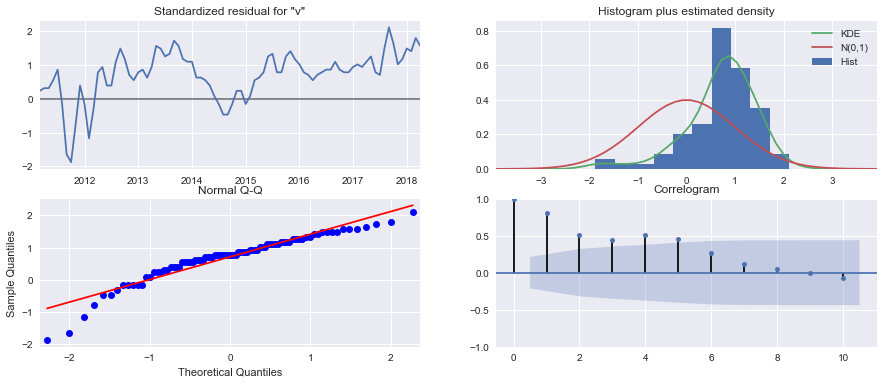

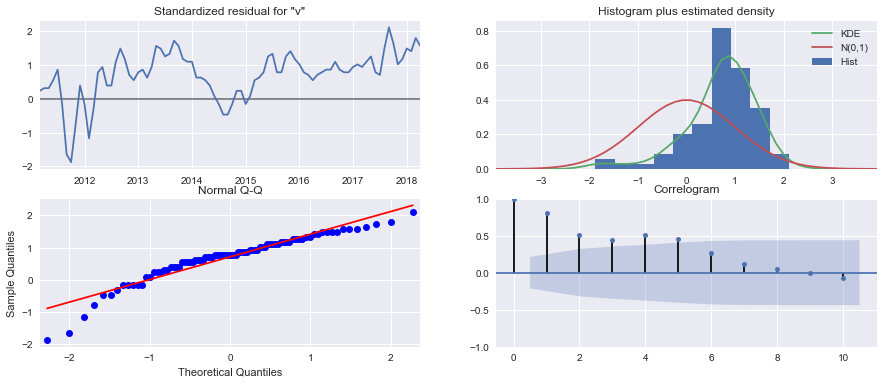

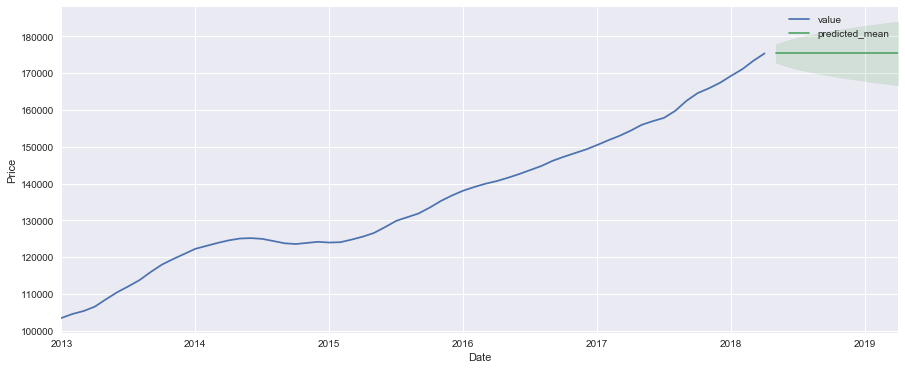

[(0, 1, 0),
 (0, 0, 0, 12),
 1263076.923076923,
 70730769.23076923,
 152044166.66666666,
 3209230.769230769,
 169770000.0,
 13029.581727745523,
 175400,
 175400.0]

In [316]:
autobot(Idaho_25_short_dict['83651'])

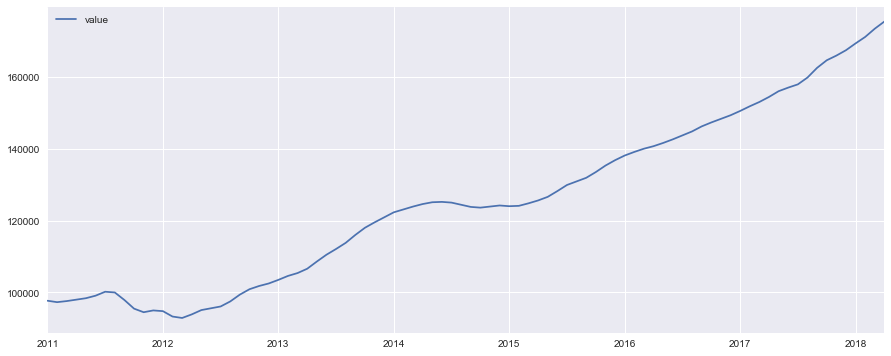

In [320]:
Idaho_25_short_dict['83651'].plot()

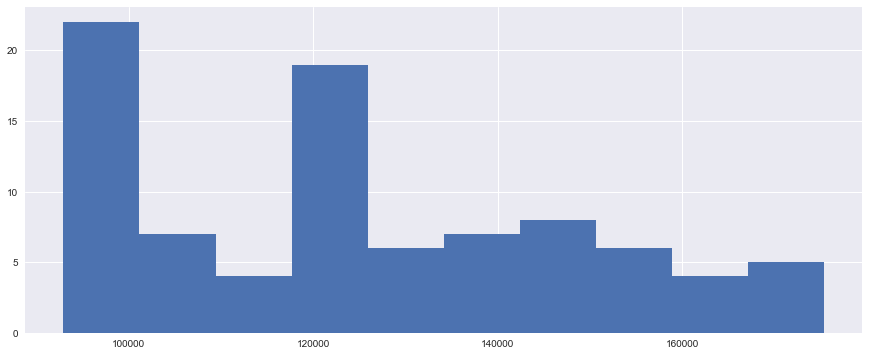

In [322]:
Idaho_25_short_dict['83651']['value'].hist()

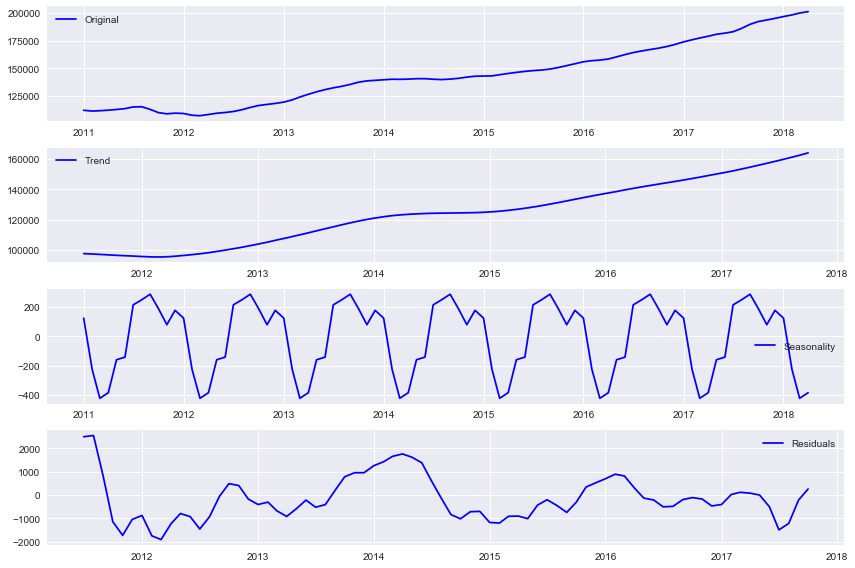

In [323]:
# Taking the decomposition of the zip code
decomposition = seasonal_decompose(Idaho_25_short_dict['83651'])

# Gathering and plotting the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(Idaho_25_short_dict['83687'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.tight_layout()

Looks like there is still seasonality for this zipcode. Lets try seeing if we can 

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1243.646, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1244.214, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1244.069, Time=0.19 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1242.486, Time=0.09 sec
 ARIMA(0,2,0)(2,0,0)[12]             : AIC=1244.224, Time=0.14 sec
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,1)[12]             : AIC=1242.392, Time=0.10 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=1244.095, Time=0.24 sec
 ARIMA(0,2,0)(1,0,2)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(1,2,0)(0,0,1)[12]             : AIC=1244.120, Time=0.05 sec
 ARIMA(1,2,1)(0,0,1)[12]             : AIC=1245.012, Time=0.20 sec
 ARIMA(0,2,0)(0,0,1)[12] intercept   : AIC=1244.115, Time=0.07 sec

Best model:  ARIMA(0,2,0)(0,0,1)[12]          
Total fit time: 1.680 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   82
Model:             SARIMAX(0, 2, 0)x(0, 0, [1], 12)   Log Likelihood                -619.196
Date:                              Fri, 16 Apr 2021   AIC                           1242.392
Time:                                      13:26:00   BIC                           1247.156
Sample:                                           0   HQIC                          1244.302
                                               - 82                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.0503      0.039      1.277      0.202      -0.027       0.128
sigma2      3.068e+05    3.6e+04      8.527      0.000    2.36e+05    3.77e+05
===================================================================================
Ljung-Box (L1) (Q):                   5.73   Jarque-Bera (JB):                 9.18
Prob(Q):                              0.02   Prob(JB):                         0.01
Heteroskedasticity (H):               0.22   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

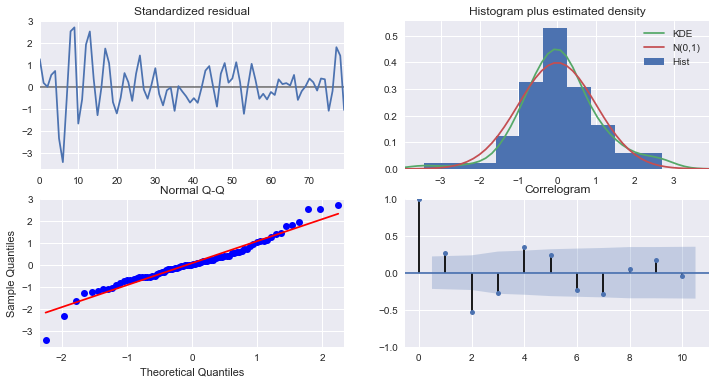

In [332]:
auto_model = pm.auto_arima(y=Idaho_25_short_dict['83651']['value'][:82], start_p=0, start_q=0, max_p=5, max_q=5,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, m=12,
                           max_order=None,trace=True)

display(auto_model.summary())
auto_model.plot_diagnostics(figsize=(12,6));

### Zipcode 83801

### Zipcode 83660

### Zipcode 83709

### Zipcode 83815

## Start looking through the top 5 zipcodes

In [ ]:
#plot the 5 zipcodes

## Stopped here and testing area

## Scratch work and blog post

In [ ]:
#58min
Idaho_25_dict.keys()

In [ ]:
BlogData = Idaho_25_dict['83703']['2011':]
BlogData.head()

In [ ]:
BlogData.head()

In [ ]:
len(BlogData)

In [ ]:
BlogData.plot()
plt.title('Zipcode 83703');
plt.xlabel('Date');
plt.ylabel('Median Housing Price');

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Taking the decomposition
decomposition = seasonal_decompose(BlogData)

# Gathering and plotting the trend, seasonality, and residuals 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12,6))
plt.subplot(4,1,1)
plt.plot(Idaho_25_dict['83703']['2011':], label='Original', color='blue')
plt.legend(loc='best')
plt.title('Seasonal Decompose')
plt.ylabel('price')
plt.subplot(4,1,2)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.ylabel('price')
plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality', color='blue')
plt.legend(loc='upper left', fontsize='x-small')
plt.ylabel('price')
plt.subplot(4,1,4)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.ylabel('price')
plt.xlabel('Date')
plt.tight_layout()

In [ ]:
ax = seasonal.plot(label='Seasonality', color='blue')

min_ = seasonal.idxmin()
max_ = seasonal.idxmax()
min_2 = seasonal[max_:].idxmin()
max_2 = seasonal[min_2:].idxmax()

ax.axvline(min_,label='min 1',c='red')
ax.axvline(min_2,label='min 2',c='red', ls=':')
ax.axvline(max_,label='max 1',c='green')
ax.axvline(max_2,label='max 2',c='green', ls=':')
plt.legend(loc='upper right', fontsize='x-small')

print(f'The time difference between the two minimums is {min_2-min_}')

In [ ]:
train, test = train_test_split(BlogData, train_size=72)

auto_model = pm.auto_arima(y=train, start_p=0, start_q=0, max_p=5, max_q=5,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, m=12,
                           max_order=None,trace=True)



In [ ]:
display(auto_model.summary())
auto_model.plot_diagnostics(figsize=(12,6));

In [ ]:
Final_model = SARIMAX(train.astype('int'),
                    order=(0,2,2),
                    seasonal_order=(1,0,0,12),
                    enforce_invertibility=False,
                    enforce_stationarity=False)
Final_output = Final_model.fit()
display(Final_output.summary());
Final_output.plot_diagnostics();

In [ ]:
forecast = Final_output.get_forecast(steps = 16)
forecast_conf = forecast.conf_int()

# Plot observed values
ax = Idaho_25_dict['83703']['2013':].plot()

# Plot forecasted values
forecast.predicted_mean.plot(ax=ax, label='dynamic', color='red', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='g', alpha=0.1)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Creating Final SARIMAX model
Final_model = SARIMAX(train.astype('int'),
                    order=auto_model.order,
                    seasonal_order=auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False)
Final_output = Final_model.fit()
display(Final_output.summary());
Final_output.plot_diagnostics();

# Getting the forecast for 16 months
forecast = Final_output.get_forecast(steps = 16)
forecast_conf = forecast.conf_int()

# Plot observed values
ax = BlogData['2013':].plot()

# Plot forecasted values
forecast.predicted_mean.plot(ax=ax, label='Forecast', color='red', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(forecast_conf.index,
                forecast_conf.iloc[:, 0],
                forecast_conf.iloc[:, 1], color='g', alpha=0.1)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()